## 1. Í≥†Í∞ù Ï†ïÎ≥¥

## 2. ÏûêÏÇ∞Íµ∞ 

In [1]:
# === Í≥µÌÜµ ÌôòÍ≤Ω/Í≤ΩÎ°ú ÏÑ§Ï†ï ===
import os, re, json, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    import cvxpy as cp
except Exception as e:
    raise ImportError("cvxpyÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. pip install cvxpy ÌõÑ Ïû¨ÏãúÎèÑ") from e

# Ïä§ÌÅ¨Î¶ΩÌä∏/ÎÖ∏Ìä∏Î∂Å Í∏∞Ï§Ä Í≤ΩÎ°ú
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

def resolve_path(filename: str) -> str:
    p = os.path.join(BASE_DIR, filename)
    if not os.path.exists(p):
        print(f"[Í≤ΩÍ≥†] ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {p}")
    return p

# Îç∞Ïù¥ÌÑ∞ ÌååÏùº ÏÉÅÏàò
BOND_XLSX   = resolve_path("ÏûêÏÇ∞Íµ∞-Íµ≠ÎÇ¥Ï±ÑÍ∂å.xlsx")
STOCK_XLSX  = resolve_path("ÏûêÏÇ∞Íµ∞-Ï£ºÏãùÏßÄÏàò.xlsx")
RETIRE_XLSX = resolve_path("ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx")

np.random.seed(42)

# %%
import os

# ÌòÑÏû¨ Ïä§ÌÅ¨Î¶ΩÌä∏/ÎÖ∏Ìä∏Î∂Å ÏúÑÏπò
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

def resolve_path(filename: str) -> str:
    '''Ï£ºÏñ¥ÏßÑ ÌååÏùºÎ™ÖÏùÑ BASE_DIR Í∏∞Ï§Ä Ï†àÎåÄÍ≤ΩÎ°úÎ°ú Î≥ÄÌôòÌïòÍ≥†, ÏóÜÏúºÎ©¥ Í≤ΩÍ≥†'''
    abs_path = os.path.join(BASE_DIR, filename)
    if not os.path.exists(abs_path):
        print(f"[Í≤ΩÍ≥†] ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {abs_path}")
        print("       Ïò¨Î∞îÎ•∏ Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌïòÍ±∞ÎÇò, Ìï¥Îãπ Ìè¥ÎçîÏóê ÌååÏùºÏùÑ Î≥µÏÇ¨ÌïòÏÑ∏Ïöî.")
    return abs_path

import os
import re
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import cvxpy as cp
from matplotlib.ticker import PercentFormatter
try:
    import seaborn as sns
except Exception:
    sns = None
    print('[Í≤ΩÍ≥†] seaborn ÎØ∏ÏÑ§Ïπò: matplotlibÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.')
from matplotlib.ticker import FuncFormatter
from datetime import datetime # ‚≠êÔ∏è datetime ÏûÑÌè¨Ìä∏ Ï∂îÍ∞Ä
import openai
import ast
import warnings
try:
    from langchain_community.document_loaders import PyMuPDFLoader, UnstructuredWordDocumentLoader
except Exception as _e:
    PyMuPDFLoader = None
    UnstructuredWordDocumentLoader = None
    print('[Í≤ΩÍ≥†] unstructured ÎØ∏ÏÑ§Ïπò: Î¨∏ÏÑú Î°úÎçî ÎπÑÌôúÏÑ±Ìôî:', _e)
from langchain.schema import Document
from langchain.embeddings import OpenAIEmbeddings
try:
    from langchain_community.vectorstores import FAISS
except Exception as _e:
    FAISS = None
    print('[Í≤ΩÍ≥†] FAISS ÎØ∏ÏÑ§Ïπò: Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥ Í∏∞Îä• ÎπÑÌôúÏÑ±Ìôî:', _e)
from langchain.text_splitter import RecursiveCharacterTextSplitter
try:
    from newspaper import Article
except Exception as _e:
    Article = None
    print('[Í≤ΩÍ≥†] newspaper ÎØ∏ÏÑ§Ïπò/Ìò∏ÌôòÏÑ± Ïù¥ÏäàÎ°ú Í∏∞ÏÇ¨ Î°úÎçî ÎπÑÌôúÏÑ±Ìôî:', _e)
try:
    from langchain_openai import OpenAIEmbeddings
except Exception as _e:
    OpenAIEmbeddings = None
    print('[Í≤ΩÍ≥†] langchain-openai ÎØ∏ÏÑ§Ïπò: ÏûÑÎ≤†Îî© Í∏∞Îä• ÎπÑÌôúÏÑ±Ìôî:', _e)
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage
try:
    from langchain_community.vectorstores import FAISS
except Exception as _e:
    FAISS = None
    print('[Í≤ΩÍ≥†] FAISS ÎØ∏ÏÑ§Ïπò: Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥ Í∏∞Îä• ÎπÑÌôúÏÑ±Ìôî:', _e)
from copy import deepcopy

In [2]:
# Ïû¨ÌòÑÏÑ±
np.random.seed(42)

# === Í≥µÌÜµ Ïú†Ìã∏ ===
def to_int(x):
    s = re.sub(r"[^\d\-.]", "", str(x))
    if s.strip() in ("", "-"):
        return 0
    try:
        return int(float(s))
    except Exception:
        return 0

def ym(s):
    if s is None:
        return None
    s = str(s).strip()
    m = re.match(r"^(\d{4})[-/.](\d{1,2})", s)
    return f"{m.group(1)}-{int(m.group(2)):02d}" if m else None


def mean_cov(returns: pd.DataFrame, method: str = "ewma", span: int = 60):
    if returns is None or returns.empty:
        raise ValueError("returns is empty")
    if method.lower() == "ewma":
        mu = returns.ewm(span=span).mean().iloc[-1]
        cov_all = returns.ewm(span=span).cov().dropna()
        last = cov_all.index.get_level_values(0).max()
        cov = cov_all.xs(last, level=0)
    else:
        mu  = returns.mean()
        cov = returns.cov()
    return mu, cov


import cvxpy as cp

def optimize_weights(returns: pd.DataFrame, target_vol: float | None = None,
                     stock_mask=None, stock_cap: float = 0.9, allow_short: bool = False,
                     cov_method: str = "ewma", cov_span: int = 60) -> pd.Series:
    mu, cov = mean_cov(returns, method=cov_method, span=cov_span)
    n = returns.shape[1]
    w = cp.Variable(n)
    constraints = [cp.sum(w) == 1]
    if not allow_short:
        constraints.append(w >= 0)
    if stock_mask is not None:
        constraints.append(cp.sum(cp.multiply(w, stock_mask)) <= float(stock_cap))
    risk = cp.quad_form(w, cov.values)
    if target_vol is None:
        obj = cp.Minimize(risk)
    else:
        obj = cp.Minimize(cp.square(cp.sqrt(risk) - float(target_vol)))
    prob = cp.Problem(obj, constraints)
    prob.solve(solver=cp.SCS, verbose=False)
    if w.value is None:
        raise RuntimeError("Optimization failed")
    return pd.Series(w.value.ravel(), index=returns.columns)


def tdf_max_stock_ratio(age: int, retire_age: int = 60, max_ratio: float = 0.9, min_ratio: float = 0.1) -> float:
    age = int(age)
    if age >= retire_age:
        return min_ratio
    if age <= 20:
        return max_ratio
    return max(min_ratio, max_ratio - (max_ratio - min_ratio) * (age - 20) / (retire_age - 20))


def calc_required_monthly(goal_amount: float, months: int, exp_portf_return: float, fee_rate: float = 0.0) -> int:
    if months <= 0:
        return int(goal_amount)
    r_annual = float(exp_portf_return) - float(fee_rate)
    r_month = r_annual / 12.0
    if abs(r_month) < 1e-9:
        pmt = goal_amount / months
    else:
        pmt = goal_amount * r_month / ((1 + r_month)**months - 1)
    return int(round(pmt))


def create_final_summary(summary_data_list, client_profile_data, analysis_step="1Ï∞®"):
    import pandas as _pd
    savings_capacity = client_profile_data.get('financial_profile', {}).get('cash_flow', {}).get('monthly_avg_net_income', 0)
    if not summary_data_list:
        return None, 0, savings_capacity, 0
    summary_df = _pd.DataFrame(summary_data_list)
    if 'goal_list' in client_profile_data and isinstance(client_profile_data['goal_list'], list):
        goals = _pd.DataFrame(client_profile_data['goal_list'])
        need_cols = [c for c in ('Î™©ÌëúÎ™Ö','Î™©ÌëúÍ∏àÏï°','Î™©ÌëúÍ∏∞Í∞Ñ(Ïõî)') if c in goals.columns]
        if need_cols:
            summary_df = summary_df.merge(goals[need_cols], how='left', on='Î™©ÌëúÎ™Ö')
    total_required = int(summary_df['ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].sum()) if 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)' in summary_df.columns else 0
    gap = int(savings_capacity - total_required)
    return summary_df, total_required, int(savings_capacity), gap


# %%
def calc_required_monthly(goal_amount: float, months: int, exp_portf_return: float, fee_rate: float = 0.0) -> int:
    """Equal monthly savings needed to reach a goal with monthly compounding.
    exp_portf_return: expected annual return in decimal (e.g., 0.06)
    fee_rate: annual fee in decimal deducted from return.
    """
    if months <= 0:
        return int(goal_amount)
    r_annual = float(exp_portf_return) - float(fee_rate)
    r_month = r_annual / 12.0
    # Future value of annuity formula: PMT = FV * r / ((1+r)^n - 1)
    if abs(r_month) < 1e-9:
        pmt = goal_amount / months
    else:
        pmt = goal_amount * r_month / ((1 + r_month)**months - 1)
    return int(round(pmt))

# %%
import cvxpy as cp

def optimize_weights(returns: pd.DataFrame, target_vol: float | None = None,
                     stock_mask=None, stock_cap: float = 0.9, allow_short: bool = False,
                     cov_method: str = "ewma", cov_span: int = 60) -> pd.Series:
    """Single-entry optimizer.
    - target_vol=None => minimum-variance
    - stock_mask: array-like of 0/1 for stock identification
    """
    mu, cov = mean_cov(returns, method=cov_method, span=cov_span)
    n = returns.shape[1]
    w = cp.Variable(n)
    constraints = [cp.sum(w) == 1]
    if not allow_short:
        constraints.append(w >= 0)
    if stock_mask is not None:
        constraints.append(cp.sum(cp.multiply(w, stock_mask)) <= float(stock_cap))
    risk = cp.quad_form(w, cov.values)
    if target_vol is None:
        obj = cp.Minimize(risk)
    else:
        obj = cp.Minimize(cp.square(cp.sqrt(risk) - float(target_vol)))
    prob = cp.Problem(obj, constraints)
    prob.solve(solver=cp.SCS, verbose=False)
    if w.value is None:
        raise RuntimeError("Optimization failed")
    return pd.Series(w.value.ravel(), index=returns.columns)

# %%
def mean_cov(returns: pd.DataFrame, method: str = "ewma", span: int = 60):
    """Return expected returns (mu) and covariance matrix (cov) from returns DataFrame.
    method: "ewma" or "sample"
    span: EWMA span (if ewma)
    """
    if returns is None or returns.empty:
        raise ValueError("returns is empty")
    if method.lower() == "ewma":
        mu = returns.ewm(span=span).mean().iloc[-1]
        cov_all = returns.ewm(span=span).cov().dropna()
        last = cov_all.index.get_level_values(0).max()
        cov = cov_all.xs(last, level=0)
    else:
        mu  = returns.mean()
        cov = returns.cov()
    return mu, cov

### ÏùÄÌá¥ÏÑ§Í≥Ñ

In [3]:

import pandas as pd
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import re
import matplotlib.pyplot as plt
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÎòêÎäî 'AppleGothic' for Mac, 'NanumGothic' if ÏÑ§ÏπòÎê®
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# Í∏∞Ï§Ä ÏãúÏûëÏùº
start_date = pd.to_datetime("2003-03-31")

# ÏõêÎ≥∏ ÏóëÏÖÄ Î∂àÎü¨Ïò§Í∏∞
df_bond = pd.read_excel(BOND_XLSX, sheet_name="Sheet1")
df_stock = pd.read_excel(STOCK_XLSX, sheet_name="Sheet1")

# === Ï±ÑÍ∂å Îç∞Ïù¥ÌÑ∞ ÌÅ¥Î†åÏßï Ìï®Ïàò === 
def clean_bond_data(df):
    df_cleaned = pd.DataFrame()
    date_row_idx = df.index[df.iloc[:, 0] == 'ÏùºÏûê'][0] + 1

    for col in range(1, df.shape[1], 2):
        name = df.iloc[0, col - 1]
        if pd.isna(name) or name == "KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 10Y~":  # NaN Ïó¥ Î∞è Ï†úÏô∏ ÎåÄÏÉÅ ÌïÑÌÑ∞ÎßÅ
            continue
        temp = df.iloc[date_row_idx:, [col - 1, col]]
        temp.columns = ['ÏùºÏûê', name]
        temp = temp.dropna()
        temp['ÏùºÏûê'] = pd.to_datetime(temp['ÏùºÏûê'], errors='coerce')
        temp['ÏùºÏûê'] = temp['ÏùºÏûê'].dt.to_period("M").dt.to_timestamp("M")
        temp = temp[temp['ÏùºÏûê'] >= start_date]
        temp.set_index('ÏùºÏûê', inplace=True)
        df_cleaned = pd.concat([df_cleaned, temp], axis=1)

    return df_cleaned

# === Ï£ºÏãù Îç∞Ïù¥ÌÑ∞ ÌÅ¥Î†åÏßï Ìï®Ïàò === 
def clean_stock_data(df):
    df_cleaned = pd.DataFrame()
    date_row_idx = df.index[df.iloc[:, 0] == 'ÏùºÏûê'][0] + 1

    for col in range(1, df.shape[1], 2):
        name = df.iloc[0, col - 1]
        if pd.isna(name) or name in ["ÏΩîÏä§Îã•150", "KRX Í∏àÌòÑÎ¨ºÏßÄÏàò"]:
            continue
        temp = df.iloc[date_row_idx:, [col - 1, col]]
        temp.columns = ['ÏùºÏûê', name]
        temp = temp.dropna()
        temp['ÏùºÏûê'] = pd.to_datetime(temp['ÏùºÏûê'], errors='coerce')
        temp['ÏùºÏûê'] = temp['ÏùºÏûê'].dt.to_period("M").dt.to_timestamp("M")
        temp = temp[temp['ÏùºÏûê'] >= start_date]
        temp.set_index('ÏùºÏûê', inplace=True)
        df_cleaned = pd.concat([df_cleaned, temp], axis=1)

    return df_cleaned

# ÌÅ¥Î†åÏßïÎêú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
df_bond_cleaned = clean_bond_data(df_bond)
df_stock_cleaned = clean_stock_data(df_stock)

# === GLD Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Î∞è Î≥ëÌï© === 
gold_df = yf.download("GLD", start="2003-03-31", interval="1mo")

if "Close" in gold_df.columns:
    gold = gold_df["Close"].copy()
    gold.name = "Gold ETF (GLD)"
    gold.index = gold.index.to_period("M").to_timestamp("M")
    gold = gold[~gold.index.duplicated(keep="last")]
    df_stock_cleaned = pd.concat([df_stock_cleaned, gold], axis=1)

# === Î≥ëÌï© (Í≥µÌÜµ ÏùºÏûê Í∏∞Ï§Ä) === #
common_index = df_stock_cleaned.index.intersection(df_bond_cleaned.index)
df_merged = df_stock_cleaned.loc[common_index].join(df_bond_cleaned.loc[common_index])

# Í≤∞Í≥º ÌôïÏù∏
df_merged.head()

C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\2231774613.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp['ÏùºÏûê'] = pd.to_datetime(temp['ÏùºÏûê'], errors='coerce')
C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\2231774613.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp['ÏùºÏûê'] = pd.to_datetime(temp['ÏùºÏûê'], errors='coerce')
C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\2231774613.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp['ÏùºÏûê'] = pd.to_datetime(temp['ÏùºÏûê'], errors='coerce')
C:\Users\tjw71\AppData\Local\Temp\ipykernel

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


KOSPI KOSPI200  KOSDAQ  S&P 500  ÎÇòÏä§Îã• 100  CSI 300   ÎãàÏºÄÏù¥ 225  \
2006-04-30  1419.73    184.1  685.44  1310.61  1700.71  1172.35  16906.23   
2006-05-31   1317.7   171.01   630.5  1270.09  1579.58  1365.45  15467.33   
2006-06-30  1295.15   167.45  590.68   1270.2  1575.23  1393.96  15505.18   
2006-07-31  1297.82   168.51  557.66  1276.66  1509.43  1294.33  15456.81   
2006-08-31  1352.74   175.44  572.83  1303.82  1579.73  1338.46  16140.76   

            Ïú†Î°úÏä§ÌÜ°Ïä§50        GLD KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3M~1Y KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 2Y~3Y  \
2006-04-30   3839.9  65.089996        100.630751        100.975868   
2006-05-31  3637.17  64.230003        101.048529        101.582403   
2006-06-30  3648.92  61.230000        101.260219        101.557437   
2006-07-31  3691.87  63.160000        101.487199        102.160262   
2006-08-31   3808.7  62.290001        101.930072        102.710402   

           KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3Y~5Y KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 5Y~10Y KRX Ï±ÑÍ∂åÏßÄÏàò ÌöåÏÇ¨Ï±Ñ Ï¢ÖÌï©  
2006-04-30        101.123958         101.077159      101.144828  
2006-05-31        101.909835         102.073692      101.748919  
2006-06-30        101.750776         102.128971      101.817169  
2006-07-31        102.543039         103.662726      102.455204  
2006-08-31        103.293889         104.680725      103.058649

In [4]:
import pandas as pd

# ÏµúÍ∑º 10ÎÖÑ Í∏∞Ï§ÄÏùº Í≥ÑÏÇ∞
end_date = df_merged.index.max()
start_date_10yr = end_date - pd.DateOffset(years=10)

# ÏµúÍ∑º 10ÎÖÑÏπò ÌïÑÌÑ∞ÎßÅ
df_recent_10yr = df_merged[df_merged.index >= start_date_10yr].copy()

# ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (ÏõîÎ≥Ñ Í∏∞Ï§Ä)
df_returns = df_recent_10yr.pct_change().dropna()

# Í≤∞Í≥º ÌôïÏù∏
df_returns.tail()


C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\1238498582.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_returns = df_recent_10yr.pct_change().dropna()


KOSPI  KOSPI200    KOSDAQ   S&P 500   ÎÇòÏä§Îã• 100   CSI 300  \
2025-03-31 -0.020397 -0.005594 -0.095583 -0.057545 -0.076898 -0.000704   
2025-04-30  0.030426  0.019073  0.065973 -0.007625  0.015176 -0.030031   
2025-05-31  0.055175  0.061640  0.023855  0.061524  0.090438  0.018475   
2025-06-30  0.138649  0.152884  0.064206  0.049607  0.062697  0.024959   
2025-07-31  0.040482  0.039026  0.032566  0.029604  0.026158  0.048546   

             ÎãàÏºÄÏù¥ 225   Ïú†Î°úÏä§ÌÜ°Ïä§50       GLD  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3M~1Y  \
2025-03-31 -0.041392 -0.039379  0.094466           0.002315   
2025-04-30  0.012011 -0.016799  0.054244           0.003333   
2025-05-31  0.053258  0.039992 -0.000560           0.002643   
2025-06-30  0.066437 -0.011805  0.004051           0.001537   
2025-07-31  0.023929  0.009225 -0.006135           0.001347   

            KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 2Y~3Y  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3Y~5Y  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 5Y~10Y  \
2025-03-31           0.002291           0.002220           -0.000488   
2025-04-30           0.009310           0.012996            0.017598   
2025-05-31           0.000839          -0.001326           -0.008993   
2025-06-30          -0.000570          -0.000589           -0.000160   
2025-07-31           0.002121           0.001838            0.000728   

            KRX Ï±ÑÍ∂åÏßÄÏàò ÌöåÏÇ¨Ï±Ñ Ï¢ÖÌï©  
2025-03-31         0.002335  
2025-04-30         0.008288  
2025-05-31         0.001080  
2025-06-30         0.001196  
2025-07-31         0.002237

In [5]:
# %%
import pandas as pd

# Í∏∞Ï§ÄÏùº Í≥ÑÏÇ∞
end_date = df_merged.index.max()
start_date_10yr = end_date - pd.DateOffset(years=10)

# ÏµúÍ∑º 10ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_recent_10yr = df_merged[df_merged.index >= start_date_10yr].copy()

# =======================================
# ‚ë† ÏõîÎ≥Ñ ÏàòÏùµÎ•†
# =======================================
df_monthly_return = df_recent_10yr.pct_change().dropna()

# =======================================
# ‚ë° Ïó∞Í∞Ñ ÏàòÏùµÎ•†
# =======================================
# Ïó∞Îßê Í∏∞Ï§ÄÏúºÎ°ú Î¶¨ÏÉòÌîåÎßÅÌïòÏó¨ Ïó∞Í∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞: (Ïó∞Îßê / Ï†ÑÏó∞Îßê) - 1
df_annual_price = df_recent_10yr.resample('Y').last()
df_annual_return = df_annual_price.pct_change().dropna()

# Ïó∞ÎèÑ Ïù∏Îç±Ïä§ Ìè¨Îß∑ Ï†ïÎ¶¨
df_annual_return.index = df_annual_return.index.year

# =======================================
# ‚ë¢ ÎàÑÏ†Å ÏàòÏùµÎ•†
# =======================================
df_cum_return = (1 + df_monthly_return).cumprod() - 1  # ÎàÑÏ†Å ÏàòÏùµÎ•†

# =======================================
# Í≤∞Í≥º ÌôïÏù∏
# =======================================

print("\n‚úÖ ÎàÑÏ†Å ÏàòÏùµÎ•†")
df_cum_return


C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\915582993.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_monthly_return = df_recent_10yr.pct_change().dropna()
C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\915582993.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual_price = df_recent_10yr.resample('Y').last()
C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\915582993.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_annual_return = df_annual_price.pct_change().dropna(


‚úÖ ÎàÑÏ†Å ÏàòÏùµÎ•†


KOSPI  KOSPI200    KOSDAQ   S&P 500   ÎÇòÏä§Îã• 100   CSI 300  \
2015-08-31 -0.043676 -0.047073 -0.052340 -0.062581 -0.068496 -0.117946   
2015-09-30 -0.033175 -0.031068 -0.064243 -0.087369 -0.088877 -0.160807   
2015-10-31 -0.000340  0.020917 -0.057140 -0.011636  0.013058 -0.074048   
2015-11-30 -0.018811 -0.000246 -0.050589 -0.011137  0.016475 -0.065577   
2015-12-31 -0.033914 -0.016046 -0.058905 -0.028472  0.000951 -0.022454   
...              ...       ...       ...       ...       ...       ...   
2025-03-31  0.222130  0.360622 -0.072008  1.667432  3.201098  0.018501   
2025-04-30  0.259315  0.386574 -0.010785  1.647093  3.264854 -0.012086   
2025-05-31  0.328797  0.472043  0.012813  1.809952  3.650561  0.006165   
2025-06-30  0.513033  0.697094  0.077842  1.949345  3.942138  0.031279   
2025-07-31  0.574285  0.763324  0.112942  2.036657  4.071415  0.081343   

             ÎãàÏºÄÏù¥ 225   Ïú†Î°úÏä§ÌÜ°Ïä§50       GLD  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3M~1Y  \
2015-08-31 -0.082329 -0.091943  0.037072           0.001216   
2015-09-30 -0.155310 -0.138868  0.018393           0.002886   
2015-10-31 -0.072972 -0.050674  0.041647           0.003936   
2015-11-30 -0.040698 -0.026173 -0.028686           0.004411   
2015-12-31 -0.075371 -0.092529 -0.033070           0.006412   
...              ...       ...       ...                ...   
2025-03-31  0.730247  0.457607  1.746021           0.199540   
2025-04-30  0.751030  0.433120  1.894977           0.203539   
2025-05-31  0.844287  0.490434  1.893358           0.206720   
2025-06-30  0.966817  0.472840  1.905079           0.208575   
2025-07-31  1.013881  0.486426  1.887258           0.210204   

            KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 2Y~3Y  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3Y~5Y  KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 5Y~10Y  \
2015-08-31           0.002139           0.004572            0.010491   
2015-09-30           0.007650           0.014802            0.028725   
2015-10-31           0.006764           0.013322            0.026691   
2015-11-30           0.004824           0.008448            0.018418   
2015-12-31           0.009579           0.015716            0.030306   
...                       ...                ...                 ...   
2025-03-31           0.217747           0.234581            0.228298   
2025-04-30           0.229084           0.250625            0.249913   
2025-05-31           0.230116           0.248967            0.238673   
2025-06-30           0.229415           0.248232            0.238474   
2025-07-31           0.232023           0.250526            0.239376   

            KRX Ï±ÑÍ∂åÏßÄÏàò ÌöåÏÇ¨Ï±Ñ Ï¢ÖÌï©  
2015-08-31         0.003634  
2015-09-30         0.008459  
2015-10-31         0.008314  
2015-11-30         0.004717  
2015-12-31         0.010382  
...                     ...  
2025-03-31         0.277128  
2025-04-30         0.287714  
2025-05-31         0.289104  
2025-06-30         0.290646  
2025-07-31         0.293533  

[120 rows x 14 columns]

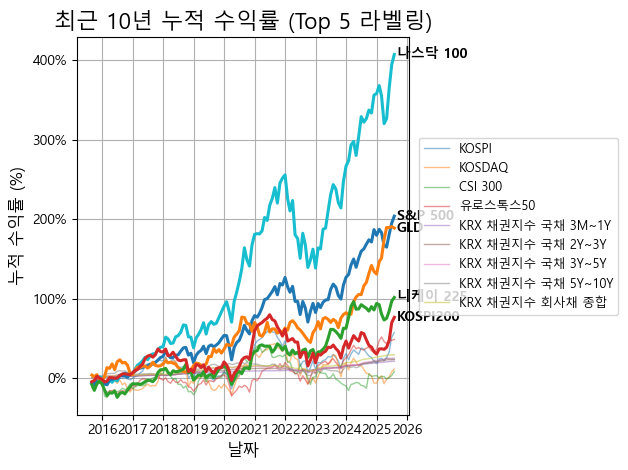

In [6]:
# ÎßàÏßÄÎßâ ÏãúÏ†ê Í∏∞Ï§Ä ÎàÑÏ†Å ÏàòÏùµÎ•† ÏÉÅÏúÑ 5Í∞ú ÏûêÏÇ∞
last_returns = df_cum_return.iloc[-1]
top_assets = last_returns.sort_values(ascending=False).head(5).index
other_assets = [col for col in df_cum_return.columns if col not in top_assets]

# ÎÇòÎ®∏ÏßÄ ÏûêÏÇ∞Îì§ (Î≤îÎ°Ä ÏÇ¨Ïö©)
for column in other_assets:
    plt.plot(df_cum_return.index, df_cum_return[column], label=column, linewidth=1, alpha=0.5)

# ÏÉÅÏúÑ 5Í∞ú ÏûêÏÇ∞ (ÏßÅÏ†ë ÎùºÎ≤®ÎßÅ)
for column in top_assets:
    plt.plot(df_cum_return.index, df_cum_return[column], linewidth=2.2)
    last_date = df_cum_return.index[-1]
    last_value = df_cum_return[column].iloc[-1]
    plt.text(last_date + pd.DateOffset(months=1),
             last_value,
             column,
             fontsize=10,
             va='center',
             fontweight='bold')

# yÏ∂ï ÌçºÏÑºÌä∏ ÌòïÏãù
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("ÏµúÍ∑º 10ÎÖÑ ÎàÑÏ†Å ÏàòÏùµÎ•† (Top 5 ÎùºÎ≤®ÎßÅ)", fontsize=16)
plt.xlabel("ÎÇ†Ïßú", fontsize=12)
plt.ylabel("ÎàÑÏ†Å ÏàòÏùµÎ•† (%)", fontsize=12)
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1.01, 0.5), fontsize=9)  # Î≤îÎ°ÄÎäî ÎÇòÎ®∏ÏßÄÏö©
plt.tight_layout()
plt.show()

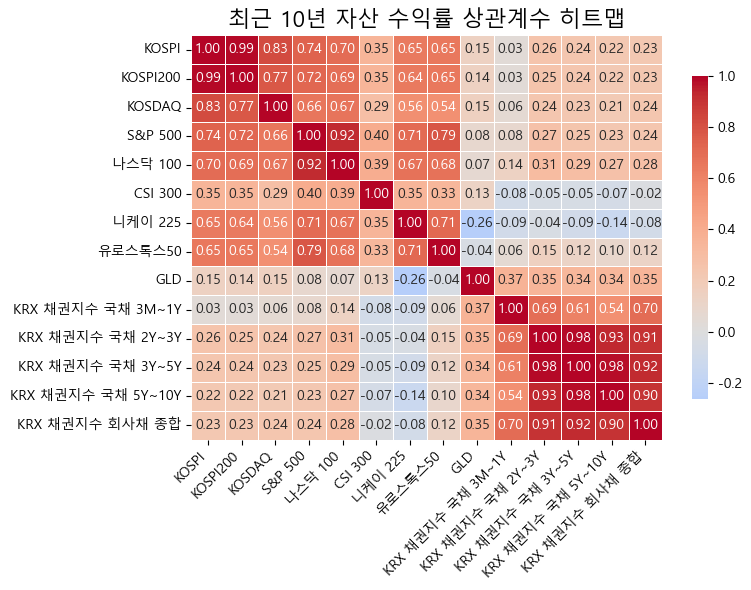

In [7]:
# %%
# ‚ë† Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨
cov_matrix = df_monthly_return.cov()

# ‚ë° ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
corr_matrix = df_monthly_return.corr()


# %%
try:
    import seaborn as sns
except Exception:
    sns = None
    print('[Í≤ΩÍ≥†] seaborn ÎØ∏ÏÑ§Ïπò: matplotlibÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.')
import matplotlib.pyplot as plt

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_monthly_return.corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("ÏµúÍ∑º 10ÎÖÑ ÏûêÏÇ∞ ÏàòÏùµÎ•† ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 2. ÏùÄÌá¥ÏÑ§Í≥Ñ

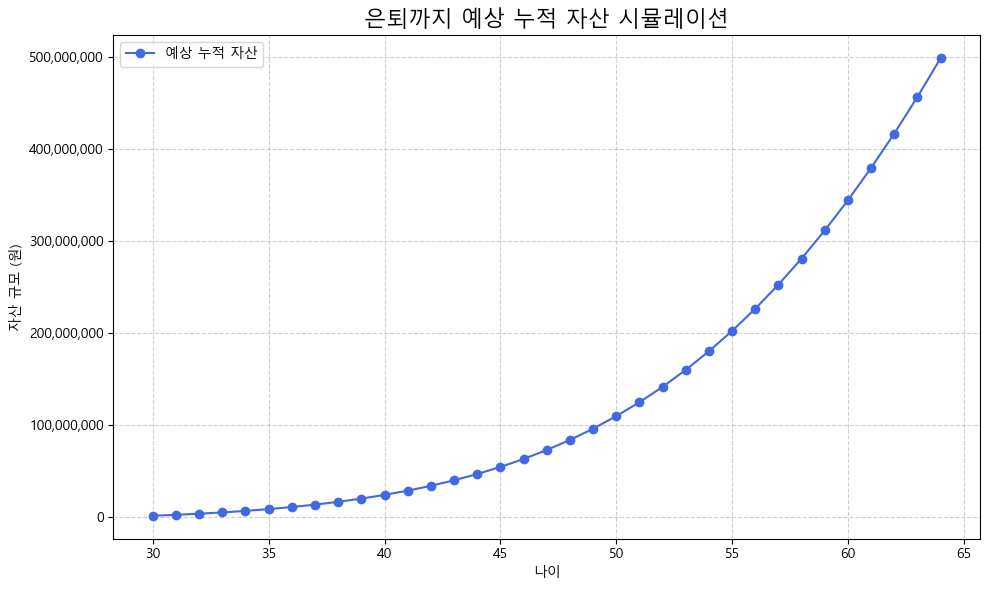


--- üìù Ï≤´ Ìï¥ Í∏∞Ï§Ä, ÏûêÏÇ∞Î≥Ñ Ïõî Ìà¨ÏûêÍ∏à Î∞∞Î∂Ñ ---


In [8]:
import pandas as pd
import numpy as np
import cvxpy as cp
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùºÌïú Î∂ÄÎ∂Ñ (ÏÑ§Ï†ï Î∞è Î≥ÄÏàò Ï∂îÏ∂ú) ---

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. ÌååÏùº Í≤ΩÎ°ú (ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ï ÌïÑÏöî)
# Ïù¥ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê 'df_monthly_return' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÎØ∏Î¶¨ Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
retirement_file = "ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx"

# 2. Î≥ÄÏàò Ï∂îÏ∂ú
core_df = pd.read_excel(retirement_file, sheet_name='ÌïµÏã¨ Ï†ïÎ≥¥(Í∞ÄÏ†ï,Î≥ÄÏàò)', header=None)
core_df.columns = ['A', 'Ìï≠Î™©', 'Í∞í', 'ÎπÑÍ≥†', 'E']
core_df = core_df[['Ìï≠Î™©', 'Í∞í']].dropna()
core_df['Í∞í'] = pd.to_numeric(core_df['Í∞í'], errors='coerce')
variables = dict(core_df.set_index('Ìï≠Î™©')['Í∞í'])

current_age = int(variables['ÌòÑÏû¨ ÎÇòÏù¥'])
retire_age = int(variables['ÏùÄÌá¥ ÎÇòÏù¥'])
retire_years = int(variables['ÏùÄÌá¥Í∏∞Í∞Ñ'])
inflation = float(variables['Î¨ºÍ∞ÄÏÉÅÏäπÎ•†(%)'])
gov_pension_monthly = float(variables['Í≥µÎ¨¥ÏõêÏó∞Í∏à(Ïõî) (ÌòÑÏû¨ÏãúÏ†ê)'])
target_monthly_spending = float(variables['ÏµúÏ¢Ö Ï°∞Ï†ï Î™©Ìëú ÏõîÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'])
years_until_retirement = retire_age - current_age

# 3. Ìà¨Ïûê ÏÑ±Ìñ•
survey_df = pd.read_excel(retirement_file, sheet_name='rÏÑ§Î¨∏ÏßÄ ÏùëÎãµ', header=None)
text_cells = survey_df.astype(str).values.flatten().tolist()
risk_types = ['ÏïàÏ†ïÌòï', 'ÏïàÏ†ïÏ∂îÍµ¨Ìòï', 'ÏúÑÌóòÏ§ëÎ¶ΩÌòï', 'Ï†ÅÍ∑πÌà¨ÏûêÌòï', 'Í≥µÍ≤©Ìà¨ÏûêÌòï']
profile = next((r for cell in text_cells for r in risk_types if r in cell), 'ÏúÑÌóòÏ§ëÎ¶ΩÌòï')
vol_limit_map = {'ÏïàÏ†ïÌòï': 0.05, 'ÏïàÏ†ïÏ∂îÍµ¨Ìòï': 0.07, 'ÏúÑÌóòÏ§ëÎ¶ΩÌòï': 0.10, 'Ï†ÅÍ∑πÌà¨ÏûêÌòï': 0.13, 'Í≥µÍ≤©Ìà¨ÏûêÌòï': 0.16}
target_vol = vol_limit_map[profile]

# 4. ÏûêÏÇ∞ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (df_monthly_returnÏù¥ Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
returns = df_monthly_return.dropna()
asset_names = returns.columns
n_assets = len(asset_names)
is_stock = np.array([0 if 'Ï±ÑÍ∂å' in name or 'ÌòÑÍ∏à' in name else 1 for name in asset_names])

# --- ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠: TDF Î°úÏßÅ ÏàòÏ†ï ‚òÖ‚òÖ‚òÖ ---
def tdf_max_stock_ratio(current_year_index, total_years, max_ratio=0.9, min_ratio=0.3):
    """
    Ïò¨Î∞îÎ•¥Í≤å ÏàòÏ†ïÎêú TDF Í∏ÄÎùºÏù¥ÎìúÌå®Ïä§ Ìï®Ïàò.
    'ÎÇ®ÏùÄ Í∏∞Í∞Ñ'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï£ºÏãù ÎπÑÏ§ëÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    # Í∏∞Í∞Ñ Í≤ΩÍ≥ºÏóê Îî∞Îùº Ï£ºÏãù ÎπÑÏ§ëÏù¥ ÏÑ†ÌòïÏúºÎ°ú Í∞êÏÜå
    glide_ratio = ((total_years-1) - current_year_index) / total_years if total_years > 0 else 0
    stock_ratio = min_ratio + (max_ratio - min_ratio) * glide_ratio
    return max(min_ratio, min(max_ratio, stock_ratio))

# 6. Í∏∞ÎåÄÏàòÏùµÎ•† Î∞è Í≥µÎ∂ÑÏÇ∞ Í≥ÑÏÇ∞ (EWMA Î∞©Ïãù Ï†ÅÏö©)
span = 60
mu = returns.ewm(span=span).mean().iloc[-1].values * 12
cov = returns.ewm(span=span).cov().iloc[-n_assets:].values * 12

# 7. Ïó∞Î†πÎ≥Ñ Í∏∞ÎåÄÏàòÏùµÎ•† Í≥ÑÏÇ∞
yearly_expected_return = []
yearly_opt_weights = []

# 'i'Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ìà¨Ïûê ÏßÑÌñâ Ïó∞Ï∞®Î•º Î™ÖÌôïÌûà Ìï®
for i in range(years_until_retirement):
    # ÏàòÏ†ïÎêú Ìï®Ïàò Ìò∏Ï∂ú
    stock_limit = tdf_max_stock_ratio(i, years_until_retirement)
    w = cp.Variable(n_assets)
    constraints = [cp.sum(w) == 1, w >= 0, cp.quad_form(w, cov) <= target_vol**2, is_stock @ w <= stock_limit]
    prob = cp.Problem(cp.Maximize(mu @ w), constraints)
    prob.solve()
    
    if w.value is not None:
        yearly_expected_return.append(mu @ w.value)
        yearly_opt_weights.append(w.value)
    else:
        # ÏµúÏ†ÅÌôî Ïã§Ìå® Ïãú ÏïàÏ†ÑÏûêÏÇ∞ 100%Î°ú ÏÑ§Ï†ï
        safe_asset_idx = [idx for idx, label in enumerate(classify(name) for name in asset_names) if label == 'ÏïàÏ†ÑÏûêÏÇ∞'][0]
        w_safe = np.zeros(n_assets)
        w_safe[safe_asset_idx] = 1.0
        yearly_expected_return.append(mu @ w_safe)
        yearly_opt_weights.append(w_safe)

# 8. ÌïÑÏöî ÏùÄÌá¥ÏûêÍ∏à Í≥ÑÏÇ∞
fv_spending = target_monthly_spending * (1 + inflation) ** years_until_retirement
fv_gov_pension = gov_pension_monthly * (1 + inflation) ** years_until_retirement
monthly_gap = max(fv_spending - fv_gov_pension, 0)
total_required = monthly_gap * 12 * retire_years

# 9. Ïù¥ÏßÑ ÌÉêÏÉâÏúºÎ°ú Ïõî Ìà¨ÏûêÍ∏à Í≥ÑÏÇ∞
def simulate_retirement_fund(monthly_invest, rate_list):
    fund = 0
    for r in rate_list:
        for _ in range(12):
            fund = fund * (1 + r / 12) + monthly_invest
    return fund

low, high = 1, 10_000_000
while high - low > 1000:
    mid = (low + high) // 2
    if simulate_retirement_fund(mid, yearly_expected_return) > total_required:
        high = mid
    else:
        low = mid
monthly_invest_final = high

# 10. ÏûêÏÇ∞ ÎàÑÏ†Å ÏãúÎÆ¨Î†àÏù¥ÏÖò Î∞è ÏãúÍ∞ÅÌôî
def simulate_asset_path(monthly_invest, rate_list):
    fund = 0
    path = []
    for r in rate_list:
        for _ in range(12):
            fund = fund * (1 + r / 12) + monthly_invest
        path.append(fund)
    return path

asset_path = simulate_asset_path(monthly_invest_final, yearly_expected_return)
ages = list(range(current_age, retire_age))

plt.figure(figsize=(10, 6))
plt.plot(ages, asset_path, label="ÏòàÏÉÅ ÎàÑÏ†Å ÏûêÏÇ∞", marker='o', color='royalblue')
plt.xlabel("ÎÇòÏù¥")
plt.ylabel("ÏûêÏÇ∞ Í∑úÎ™® (Ïõê)")
plt.title("ÏùÄÌá¥ÍπåÏßÄ ÏòàÏÉÅ ÎàÑÏ†Å ÏûêÏÇ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

# 11. ÏµúÏ¢Ö ÏûêÏÇ∞ Î∞∞Î∂Ñ Î∞è Ïõî Ìà¨ÏûêÍ∏à ÏöîÏïΩ
final_weights = yearly_opt_weights[0]
amounts_by_asset = final_weights * monthly_invest_final
asset_result = pd.DataFrame({
    'ÏûêÏÇ∞Î™Ö': asset_names,
    'ÎπÑÏ§ë(%)': final_weights * 100,
    'Ïõî Ìà¨ÏûêÍ∏à(Ïõê)': amounts_by_asset
})
asset_result = asset_result[asset_result['ÎπÑÏ§ë(%)'] > 0.1].round(2)

total_row = pd.DataFrame({
    'ÏûêÏÇ∞Î™Ö': ['Ï¢ÖÌï©'],
    'ÎπÑÏ§ë(%)': [asset_result['ÎπÑÏ§ë(%)'].sum()],
    'Ïõî Ìà¨ÏûêÍ∏à(Ïõê)': [asset_result['Ïõî Ìà¨ÏûêÍ∏à(Ïõê)'].sum()]
})
asset_result = pd.concat([asset_result, total_row], ignore_index=True)

print("\n--- üìù Ï≤´ Ìï¥ Í∏∞Ï§Ä, ÏûêÏÇ∞Î≥Ñ Ïõî Ìà¨ÏûêÍ∏à Î∞∞Î∂Ñ ---")
display(asset_result.style.format({'ÎπÑÏ§ë(%)': '{:,.2f}%', 'Ïõî Ìà¨ÏûêÍ∏à(Ïõê)': '{:,.0f}Ïõê'}).hide(axis="index"))



In [9]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# --- 1. Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú Í≥ÑÏÇ∞Îêú Î≥ÄÏàòÎì§Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§ ---
# Ïù¥ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê mu, cov, target_vol, years_until_retirement, 
# ages, asset_names, tdf_max_stock_ratio Ìï®Ïàò Îì±Ïù¥ Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.

# --- 2. Ïó∞Î†πÎ≥Ñ Í∏∞ÎåÄÏàòÏùµÎ•† + Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∏∞Î°ùÏö© ÌÖåÏù¥Î∏î ÏÉùÏÑ± (ÏàòÏ†ïÎêú Î°úÏßÅ) ---
yearly_stock_limit = []
yearly_target_vol = []
yearly_portfolio_vol = []
yearly_expected_return = []
yearly_opt_weights = []

# 'i'Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ìà¨Ïûê ÏßÑÌñâ Ïó∞Ï∞®Î•º Î™ÖÌôïÌûà Ìï®
for i in range(years_until_retirement):
    # ‚òÖ‚òÖ‚òÖ Ïò¨Î∞îÎ•∏ Ìï®Ïàò Ìò∏Ï∂ú Î∞©ÏãùÏúºÎ°ú ÏàòÏ†ï ‚òÖ‚òÖ‚òÖ
    stock_limit = tdf_max_stock_ratio(i, years_until_retirement)
    
    w = cp.Variable(n_assets)
    constraints = [
        cp.sum(w) == 1,
        w >= 0,
        cp.quad_form(w, cov) <= target_vol**2,
        is_stock @ w <= stock_limit
    ]
    prob = cp.Problem(cp.Maximize(mu @ w), constraints)
    prob.solve()

    if w.value is not None:
        w_opt = w.value
        r = mu @ w_opt
        vol = np.sqrt(w_opt @ cov @ w_opt)
    else:
        # ÏµúÏ†ÅÌôî Ïã§Ìå® Ïãú ÏïàÏ†ÑÏûêÏÇ∞ 100%Î°ú ÏÑ§Ï†ï
        safe_asset_idx = [idx for idx, label in enumerate(classify(name) for name in asset_names) if label == 'ÏïàÏ†ÑÏûêÏÇ∞'][0]
        w_opt = np.zeros(n_assets)
        w_opt[safe_asset_idx] = 1.0
        r = mu @ w_opt
        vol = np.sqrt(w_opt @ cov @ w_opt)

    yearly_stock_limit.append(stock_limit)
    yearly_target_vol.append(target_vol)
    yearly_expected_return.append(r)
    yearly_portfolio_vol.append(vol)
    yearly_opt_weights.append(w_opt)

# --- 3. Í∏∞ÎåÄÏàòÏùµÎ•† ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞ ---
table_df = pd.DataFrame({
    'ÎÇòÏù¥': ages,
    'Ï£ºÏãù ÏÉÅÌïú(%)': np.round(np.array(yearly_stock_limit) * 100, 1),
    'Î≥ÄÎèôÏÑ± Ï†úÌïú(%)': np.round(np.array(yearly_target_vol) * 100, 1),
    'Í∏∞ÎåÄÏàòÏùµÎ•†(%)': np.round(np.array(yearly_expected_return) * 100, 2),
    'Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Î≥ÄÎèôÏÑ±(%)': np.round(np.array(yearly_portfolio_vol) * 100, 2)
})

print("\n--- üìã Ïó∞Î†πÎ≥Ñ Ìà¨Ïûê Ï†ÑÎûµ ÏöîÏïΩ ÌÖåÏù¥Î∏î ---")
# display Ìï®ÏàòÎäî Jupyter Notebook ÌôòÍ≤ΩÏóêÏÑú ÌëúÎ•º ÏòàÏÅòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.
display(table_df.style.format("{:,.2f}"))




--- üìã Ïó∞Î†πÎ≥Ñ Ìà¨Ïûê Ï†ÑÎûµ ÏöîÏïΩ ÌÖåÏù¥Î∏î ---


C:\Users\tjw71\AppData\Local\Temp\ipykernel_31900\2458912336.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.tight_layout()
c:\Users\tjw71\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


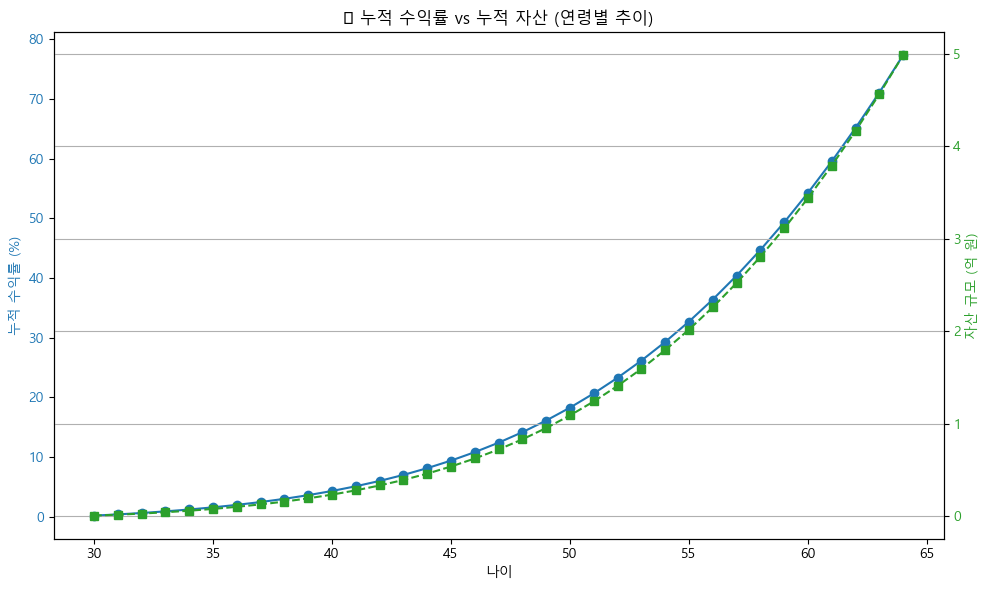

In [10]:
import matplotlib.pyplot as plt

# ÎàÑÏ†Å ÏàòÏùµÎ•† Í≥ÑÏÇ∞
cumulative_returns = []
cumulative = 1.0
for r in yearly_expected_return[:len(asset_path)]:  # Í∏∏Ïù¥ ÎßûÏ∂§
    cumulative *= (1 + r)
    cumulative_returns.append(cumulative - 1)

# ÎÇòÏù¥ Î¶¨Ïä§Ìä∏ (ÏûêÏÇ∞ Í≤ΩÎ°úÏôÄ ÎèôÏùºÌïú Í∏∏Ïù¥Î°ú ÏÑ§Ï†ï)
ages = list(range(current_age, current_age + len(asset_path)))

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ï¢åÏ∏° yÏ∂ï: ÎàÑÏ†Å ÏàòÏùµÎ•† (%)
color1 = 'tab:blue'
ax1.set_xlabel("ÎÇòÏù¥")
ax1.set_ylabel("ÎàÑÏ†Å ÏàòÏùµÎ•† (%)", color=color1)
ax1.plot(ages, [r for r in cumulative_returns], marker='o', color=color1, label="ÎàÑÏ†Å ÏàòÏùµÎ•†")
ax1.tick_params(axis='y', labelcolor=color1)

# Ïö∞Ï∏° yÏ∂ï: ÏûêÏÇ∞ Í∑úÎ™® (Ïñµ Ïõê Îã®ÏúÑ)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel("ÏûêÏÇ∞ Í∑úÎ™® (Ïñµ Ïõê)", color=color2)
ax2.plot(ages, [a / 100_000_000 for a in asset_path], marker='s', linestyle='--', color=color2, label="ÎàÑÏ†Å ÏûêÏÇ∞")
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title("üìà ÎàÑÏ†Å ÏàòÏùµÎ•† vs ÎàÑÏ†Å ÏûêÏÇ∞ (Ïó∞Î†πÎ≥Ñ Ï∂îÏù¥)")
fig.tight_layout()
plt.grid(True)
plt.show()


--- üìã Ïó∞Î†πÎ≥Ñ ÏÉÅÏÑ∏ ÏûêÏÇ∞ Î∞∞Î∂Ñ Í≥ÑÌöçÌëú (%) ---


c:\Users\tjw71\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


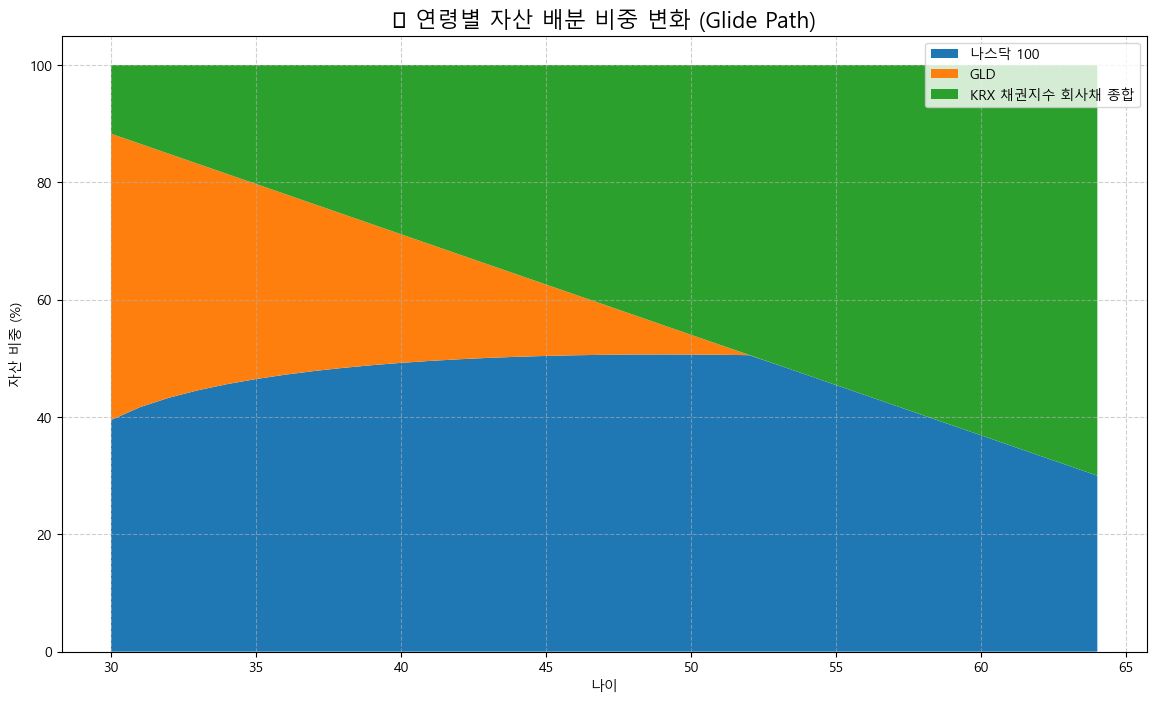

In [11]:
# --- 2. Ïó∞ÎèÑÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÉÅÏÑ∏ Í≥ÑÌöçÌëú ÏÉùÏÑ± ---

# Ïó∞Î†πÎ≥Ñ ÏµúÏ†Å ÎπÑÏ§ëÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôò
weights_df = pd.DataFrame(yearly_opt_weights, index=ages, columns=asset_names)

# ÎπÑÏ§ëÏù¥ 0.1% Ïù¥ÏÉÅÏù¥ÏóàÎçò ÏûêÏÇ∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Î≥¥Í∏∞ ÏâΩÍ≤å ÎßåÎì≠ÎãàÎã§.
weights_df = weights_df.loc[:, (weights_df > 0.001).any(axis=0)]
weights_df *= 100 # Î∞±Î∂ÑÏú®Î°ú Î≥ÄÌôò

print("\n--- üìã Ïó∞Î†πÎ≥Ñ ÏÉÅÏÑ∏ ÏûêÏÇ∞ Î∞∞Î∂Ñ Í≥ÑÌöçÌëú (%) ---")
display(weights_df.style.format("{:,.1f}%"))


# --- 3. Ïä§ÌÉùÌòï ÏòÅÏó≠ Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî ---

plt.figure(figsize=(14, 8))
plt.stackplot(weights_df.index, weights_df.T, labels=weights_df.columns)
plt.legend(loc='upper right')
plt.title('üìà Ïó∞Î†πÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ ÎπÑÏ§ë Î≥ÄÌôî (Glide Path)', fontsize=16)
plt.xlabel('ÎÇòÏù¥')
plt.ylabel('ÏûêÏÇ∞ ÎπÑÏ§ë (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 3. Ï¢ÖÌï© ÏÑ§Í≥Ñ

### 3-1. Ïû¨Î¨¥Î™©Ìëú ÎèÑÏ∂ú

In [ ]:
# --- ÌååÏùº Í≤ΩÎ°ú Ï†ïÏùò ---
# Í∞Å ÏóëÏÖÄ ÌååÏùºÏùò Ïã§Ï†ú ÏúÑÏπòÏóê ÎßûÍ≤å Í≤ΩÎ°úÎ•º ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
household_file_path = 'ÏÜêPB_ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§_Í∞ÄÍ≥ÑÎ∂Ä_2507022_v1.3_ÌÉÅÏßÄÏõê.xlsm'
# 'rÏÑ§Î¨∏ÏßÄ ÏùëÎãµ' ÏãúÌä∏Í∞Ä Ìè¨Ìï®Îêú ÏõêÎ≥∏ ÏóëÏÖÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# (ÏóÖÎ°úÎìúÎêú ÌååÏùº Î™©Î°ùÏóêÏÑúÎäî Ïù¥ ÌååÏùºÏùò ÏõêÎ≥∏ .xlsxÍ∞Ä ÏïÑÎãå CSVÎßå ÌôïÏù∏ÎêòÎØÄÎ°ú,
# Ïã§Ï†ú Ïã§Ìñâ ÌôòÍ≤ΩÏóê ÏõêÎ≥∏ ÌååÏùºÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Í≤ΩÎ°úÎ•º ÏûëÏÑ±ÌñàÏäµÎãàÎã§.)
retirement_model_file_path = 'ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx'

try:
    # --- Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú ---

    # 1. Í∞ÄÍ≥ÑÎ∂Ä ÏóëÏÖÄ ÌååÏùºÏóêÏÑú Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    # ÌååÏùº: ÏÜêPB_ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§_Í∞ÄÍ≥ÑÎ∂Ä_2507022_v1.3_ÌÉÅÏßÄÏõê.xlsm
    # ÏãúÌä∏: Î±ÖÏÉêÌòÑÌô©
    df_household = pd.read_excel(household_file_path, sheet_name='Î±ÖÏÉêÌòÑÌô©', header=None, engine='openpyxl')
    
    # iloc[row, column]Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌäπÏ†ï ÏÖÄ Í∞í Ï∂îÏ∂ú (0Î∂ÄÌÑ∞ ÏãúÏûë)
    age = df_household.iloc[5, 3]      # D6 ÏÖÄ
    gender = df_household.iloc[5, 2]   # C6 ÏÖÄ
    credit_score = df_household.iloc[5, 4] # E6 ÏÖÄ


    # 2. ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏ ÏóëÏÖÄ ÌååÏùºÏóêÏÑú ÏßÅÏóÖ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    # ÌååÏùº: ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx
    # ÏãúÌä∏: rÏÑ§Î¨∏ÏßÄ ÏùëÎãµ
    # ÏóëÏÖÄÏùò ÌäπÏ†ï ÏãúÌä∏Î•º ÏßÅÏ†ë ÏùΩÎèÑÎ°ù ÏàòÏ†ïÌñàÏäµÎãàÎã§.
    df_retirement_survey = pd.read_excel(retirement_model_file_path, sheet_name='rÏÑ§Î¨∏ÏßÄ ÏùëÎãµ', header=None)

    # C12 ÏÖÄÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    job = df_retirement_survey.iloc[11, 3] # CÏó¥(2), 12Î≤àÏß∏ Ìñâ(11)


    # --- client_profile ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± ---
    
    client_profile = {
        "Í≥†Í∞ùÏ†ïÎ≥¥": {
            "Í≥†Í∞ùÎ™Ö": "ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§",
            "ÎÇòÏù¥": age,
            "ÏßÅÏóÖ": job,
            "ÏÑ±Î≥Ñ": gender,
            "Ïã†Ïö©Ï†êÏàò": credit_score
        }
    }

    # --- Í≤∞Í≥º ÌôïÏù∏ ---
    print("‚úÖ 'Í≥†Í∞ùÏ†ïÎ≥¥' ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. (ÏàòÏ†ï ÏôÑÎ£å)")
    
    import json
    print(json.dumps(client_profile, ensure_ascii=False, indent=4))

except FileNotFoundError as e:
    # ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÎ≥∏ .xlsx ÌååÏùºÏùÑ ÏóÖÎ°úÎìúÌïòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïú ÏïàÎÇ¥
    print(f"Ïò§Î•ò: ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    print(f"ÏßÄÏ†ïÌïú Í≤ΩÎ°úÏóê '{e.filename}' ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    print("ÌäπÌûà 'ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx' ÌååÏùºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
    
except ValueError as e:
    # ÏóëÏÖÄÏóê Ìï¥Îãπ ÏãúÌä∏Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ Î∞úÏÉùÌïòÎäî Ïò§Î•ò Ï≤òÎ¶¨
    if "Worksheet" in str(e) and "not found" in str(e):
        print(f"Ïò§Î•ò: ÏóëÏÖÄ ÌååÏùº ÏïàÏóê '{retirement_model_file_path}' ÏãúÌä∏Í∞Ä ÏóÜÏäµÎãàÎã§. ÏãúÌä∏ Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    else:
        print(f"Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÎäî Ï§ë Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

# %%
import pandas as pd

# --- Ïù¥Ï†Ñ Îã®Í≥Ñ ÏΩîÎìú Ïã§ÌñâÏúºÎ°ú client_profileÏù¥ ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§. ---
# ÎßåÏïΩ Ïù¥ Ïä§ÌÅ¨Î¶ΩÌä∏Î•º Îã®ÎèÖÏúºÎ°ú Ïã§ÌñâÌïúÎã§Î©¥, ÏïÑÎûò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÏó¨ client_profileÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
# client_profile = {"Í≥†Í∞ùÏ†ïÎ≥¥": {}}


# --- ÌååÏùº Í≤ΩÎ°ú Ï†ïÏùò ---
household_file_path = 'ÏÜêPB_ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§_Í∞ÄÍ≥ÑÎ∂Ä_2507022_v1.3_ÌÉÅÏßÄÏõê.xlsm'

try:
    # --- Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ ---
    df = pd.read_excel(household_file_path, sheet_name='Í∞ÄÍ≥ÑÎ∂Ä ÎÇ¥Ïó≠', engine='openpyxl')
    
    # 'Í±∞ÎûòÏùº' Ïª¨ÎüºÏùÑ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò (Ïò§Î•ò Î∞úÏÉù Ïãú Î¨¥Ïãú)
    df['Í±∞ÎûòÏùº'] = pd.to_datetime(df['Í±∞ÎûòÏùº'], errors='coerce')
    # ÎÇ†Ïßú ÌòïÏãùÏù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    df.dropna(subset=['Í±∞ÎûòÏùº'], inplace=True)

    # --- Î∂ÑÏÑù Í∏∞Ï§ÄÏõî('Ïù¥Î≤à Îã¨') Í≤∞Ï†ï ---
    latest_date = df['Í±∞ÎûòÏùº'].max()
    # is_month_endÎäî Ìï¥Îãπ ÏõîÏùò ÎßàÏßÄÎßâ ÎÇ†Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî pandas Í∏∞Îä•ÏûÖÎãàÎã§.
    if latest_date.is_month_end:
        analysis_month_period = pd.Period(latest_date, freq='M')
    else:
        # ÏõîÎßêÏù¥ ÏïÑÎãàÎ©¥, Ìïú Îã¨ÏùÑ Î∫ÄÎã§.
        analysis_month_period = pd.Period(latest_date, freq='M') - 1
    
    print(f"ÏïåÎ¶º: Îç∞Ïù¥ÌÑ∞Ïùò ÏµúÍ∑º ÎÇ†ÏßúÎäî {latest_date.strftime('%Y-%m-%d')} ÏûÖÎãàÎã§.")
    print(f"ÏïåÎ¶º: Î∂ÑÏÑù Í∏∞Ï§ÄÏõî('Ïù¥Î≤à Îã¨')ÏùÄ '{analysis_month_period.strftime('%YÎÖÑ %mÏõî')}' ÏûÖÎãàÎã§.")

    # --- ÏµúÍ∑º 3Í∞úÏõîÍ∞Ñ ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í≥ÑÏÇ∞ ---
    monthly_summary = []
    for i in range(3):
        target_month = analysis_month_period - i
        
        # Ìï¥Îãπ ÏõîÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
        df_month = df[df['Í±∞ÎûòÏùº'].dt.to_period('M') == target_month]

        # 1. ÏàòÏûÖ Í≥ÑÏÇ∞
        income = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'ÏàòÏûÖ']['pv_ÏßÄÏ∂úÏï°'].sum()
        
        # 2. ÏßÄÏ∂ú Í≥ÑÏÇ∞ (ÏßÄÏ∂ú - Ïù¥Ï≤¥)
        spend_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'ÏßÄÏ∂ú']['pv_ÏßÄÏ∂úÏï°'].sum()
        transfer_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ïù¥Ï≤¥']['pv_ÏßÄÏ∂úÏï°'].sum()
        expenditure = spend_total + transfer_total
        
        # 3. Ï†ÄÏ∂ï/Ìà¨Ïûê Í≥ÑÏÇ∞
        investment = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ï†ÄÏ∂ï/Ìà¨Ïûê']['pv_ÏßÄÏ∂úÏï°'].sum()

        # 4. ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)
        cash_surpuls = income - (expenditure + investment)

        monthly_summary.append({
            "month": target_month,
            "income": income,
            "expenditure": expenditure,
            "investment": investment,
            "cash_surpuls" : cash_surpuls
        })

    # --- ÏµúÏ¢Ö ÏßÄÌëú Í≥ÑÏÇ∞ ---
    # 1) ~ 4) 'Ïù¥Î≤à Îã¨' ÌòÑÌô©
    this_month_data = monthly_summary[0]
    this_month_income = this_month_data['income']
    this_month_expenditure = this_month_data['expenditure']
    this_month_investment = this_month_data['investment']


    # ÌòÑÍ∏à(Ïó¨Ïú≥Îèà) = ÏàòÏûÖ - (ÏßÄÏ∂ú + Ï†ÄÏ∂ï/Ìà¨Ïûê)
    this_month_cash_surplus = this_month_income - (this_month_expenditure + this_month_investment)

    # 5) ~ 8) 3Í∞úÏõî ÌèâÍ∑† ÌòÑÌô©
    avg_income = sum(item['income'] for item in monthly_summary) / 3
    avg_expenditure = sum(item['expenditure'] for item in monthly_summary) / 3
    avg_investment = sum(item['investment'] for item in monthly_summary) / 3
    avg_cash_surpuls = sum(item['cash_surpuls'] for item in monthly_summary) / 3

    # ÌèâÍ∑† ÏàúÏàòÏûÖ = ÌèâÍ∑† ÏàòÏûÖ - ÌèâÍ∑† ÏßÄÏ∂ú
    avg_net_income = avg_income - avg_expenditure

    # --- client_profile ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞Ä ---
    client_profile['ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©'] = {
        "Î∂ÑÏÑù Í∏∞Ï§ÄÏõî": analysis_month_period.strftime('%Y-%m'),
        "Ïù¥Î≤à Îã¨ ÏàòÏûÖ": f"{this_month_income:,.0f}Ïõê",
        "Ïù¥Î≤à Îã¨ ÏßÄÏ∂ú": f"{this_month_expenditure:,.0f}Ïõê",
        "Ïù¥Î≤à Îã¨ Ï†ÄÏ∂ï/Ìà¨Ïûê": f"{this_month_investment:,.0f}Ïõê",
        "Ïù¥Î≤à Îã¨ ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)": f"{this_month_cash_surplus:,.0f}Ïõê",
        "ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàòÏûÖ": f"{avg_income:,.0f}Ïõê",
        "ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏßÄÏ∂ú": f"{avg_expenditure:,.0f}Ïõê",
        "ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàúÏàòÏûÖ": f"{avg_net_income:,.0f}Ïõê",
        "ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ï†ÄÏ∂ï/Ìà¨Ïûê": f"{avg_investment:,.0f}Ïõê",
        "ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)" : f"{avg_cash_surpuls:,.0f}Ïõê"
    }

    # --- Í≤∞Í≥º ÌôïÏù∏ ---
    print("\n‚úÖ 'ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©' ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
    import json
    print(json.dumps(client_profile, ensure_ascii=False, indent=4))

except FileNotFoundError:
    print(f"Ïò§Î•ò: '{household_file_path}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except KeyError as e:
    print(f"Ïò§Î•ò: ÏóëÏÖÄ ÏãúÌä∏ÏóêÏÑú ÌïÑÏöîÌïú Ïª¨Îüº({e})ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïª¨ÎüºÎ™ÖÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

# %%
import pandas as pd

# --- Ïù¥Ï†Ñ Îã®Í≥Ñ ÏΩîÎìú Ïã§ÌñâÏúºÎ°ú client_profile, df, analysis_month_period Î≥ÄÏàòÍ∞Ä ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§. ---

try:
    # --- ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ ÎîïÏÖîÎÑàÎ¶¨ Ï¥àÍ∏∞Ìôî ---
    monthly_cash_flow_final = {}

    # --- ÏµúÍ∑º 6Í∞úÏõîÍ∞Ñ ÏõîÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ---
    for i in range(6):
        # Ïó≠ÏàúÏúºÎ°ú 6Í∞úÏõîÍ∞ÑÏùò ÏõîÏùÑ ÌïòÎÇòÏî© Í∞ÄÏ†∏Ïò¥ (Ïòà: 5Ïõî -> 4Ïõî -> 3Ïõî...)
        target_month_period = analysis_month_period - i
        month_str = target_month_period.strftime('%Y-%m')
        
        # Ìï¥Îãπ ÏõîÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
        df_month = df[df['Í±∞ÎûòÏùº'].dt.to_period('M') == target_month_period]

        # --- 1. ÎåÄÎ∂ÑÎ•òÎ≥Ñ Ï¥ùÌï© Í≥ÑÏÇ∞ ---
        income_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'ÏàòÏûÖ']['pv_ÏßÄÏ∂úÏï°'].sum()
        spend_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'ÏßÄÏ∂ú']['pv_ÏßÄÏ∂úÏï°'].sum()
        transfer_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ïù¥Ï≤¥']['pv_ÏßÄÏ∂úÏï°'].sum()
        investment_total = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ï†ÄÏ∂ï/Ìà¨Ïûê']['pv_ÏßÄÏ∂úÏï°'].sum()

        # --- 2. Ï§ëÎ∂ÑÎ•ò ÏÉÅÏÑ∏ ÎÇ¥Ïó≠ Í≥ÑÏÇ∞ ---
        income_details = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'ÏàòÏûÖ'].groupby('pv_Ï§ëÎ∂ÑÎ•ò')['pv_ÏßÄÏ∂úÏï°'].sum().to_dict()
        spend_details = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'].isin(['ÏßÄÏ∂ú', 'Ïù¥Ï≤¥'])].groupby('pv_Ï§ëÎ∂ÑÎ•ò')['pv_ÏßÄÏ∂úÏï°'].sum().to_dict()
        investment_details = df_month[df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ï†ÄÏ∂ï/Ìà¨Ïûê'].groupby('pv_Ï§ëÎ∂ÑÎ•ò')['pv_ÏßÄÏ∂úÏï°'].sum().to_dict()

        # --- 3. Ìï¥Îãπ ÏõîÏùò ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ï°∞Î¶Ω ---
        month_data = {
            "ÏàòÏûÖ": {
                "Ï¥ùÌï©": income_total,
                "ÏÉÅÏÑ∏ÎÇ¥Ïó≠": {k: v for k, v in sorted(income_details.items(), key=lambda item: item[1], reverse=True) if v > 0}
            },
            "Ï¥ùÏßÄÏ∂ú(Ïù¥Ï≤¥Ìè¨Ìï®)": {
                "Ï¥ùÌï©": spend_total + transfer_total,
                "ÏÉÅÏÑ∏ÎÇ¥Ïó≠": {k: v for k, v in sorted(spend_details.items(), key=lambda item: item[1], reverse=True) if v > 0}
            },
            "Ï†ÄÏ∂ï/Ìà¨Ïûê": {
                "Ï¥ùÌï©": investment_total,
                "ÏÉÅÏÑ∏ÎÇ¥Ïó≠": {k: v for k, v in sorted(investment_details.items(), key=lambda item: item[1], reverse=True) if v > 0}
            },
            "ÏàúÌòÑÍ∏àÌùêÎ¶Ñ(Ïó¨Ïú≥Îèà)": income_total - (spend_total + transfer_total + investment_total)
        }
        
        # --- 4. [ÌäπÎ≥Ñ Ï≤òÎ¶¨] 'Ïù¥Î≤à Îã¨'ÏóêÎßå 'ÏÜåÎ∂ÑÎ•ò' Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä ---
        if target_month_period == analysis_month_period:
            # 'Ï¥ùÏßÄÏ∂ú(Ïù¥Ï≤¥Ìè¨Ìï®)'Ïùò Ï§ëÎ∂ÑÎ•ò Ìï≠Î™©Îì§Ïóê ÎåÄÌï¥ ÏÜåÎ∂ÑÎ•ò ÎÇ¥Ïó≠ Ï∂îÍ∞Ä
            spend_details_with_small = {}
            for mid_category, mid_total in month_data["Ï¥ùÏßÄÏ∂ú(Ïù¥Ï≤¥Ìè¨Ìï®)"]["ÏÉÅÏÑ∏ÎÇ¥Ïó≠"].items():
                small_category_details = df_month[df_month['pv_Ï§ëÎ∂ÑÎ•ò'] == mid_category] \
                                         .groupby('pv_ÏÜåÎ∂ÑÎ•ò')['pv_ÏßÄÏ∂úÏï°'].sum().to_dict()
                
                spend_details_with_small[mid_category] = {
                    "Ï¥ùÌï©": mid_total,
                    "ÏÜåÎ∂ÑÎ•ò ÏÉÅÏÑ∏": {k: v for k, v in sorted(small_category_details.items(), key=lambda item: item[1], reverse=True) if v > 0}
                }
            # Í∏∞Ï°¥ ÏÉÅÏÑ∏ÎÇ¥Ïó≠ÏùÑ ÏÜåÎ∂ÑÎ•òÍ∞Ä Ìè¨Ìï®Îêú ÏÉÅÏÑ∏ÎÇ¥Ïó≠ÏúºÎ°ú ÍµêÏ≤¥
            month_data["Ï¥ùÏßÄÏ∂ú(Ïù¥Ï≤¥Ìè¨Ìï®)"]["ÏÉÅÏÑ∏ÎÇ¥Ïó≠"] = spend_details_with_small
        
            # [ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ] 'Ï†ÄÏ∂ï/Ìà¨Ïûê'Ïùò Ï§ëÎ∂ÑÎ•ò Ìï≠Î™©Îì§Ïóê ÎåÄÌï¥ ÏÜåÎ∂ÑÎ•ò ÎÇ¥Ïó≠ Ï∂îÍ∞Ä
            investment_details_with_small = {}
            if month_data["Ï†ÄÏ∂ï/Ìà¨Ïûê"]["ÏÉÅÏÑ∏ÎÇ¥Ïó≠"]:
                for mid_category, mid_total in month_data["Ï†ÄÏ∂ï/Ìà¨Ïûê"]["ÏÉÅÏÑ∏ÎÇ¥Ïó≠"].items():
                    small_category_details = df_month[
                        (df_month['pv_ÎåÄÎ∂ÑÎ•ò'] == 'Ï†ÄÏ∂ï/Ìà¨Ïûê') &
                        (df_month['pv_Ï§ëÎ∂ÑÎ•ò'] == mid_category)
                    ].groupby('pv_ÏÜåÎ∂ÑÎ•ò')['pv_ÏßÄÏ∂úÏï°'].sum().to_dict()

                    investment_details_with_small[mid_category] = {
                        "Ï¥ùÌï©": mid_total,
                        "ÏÜåÎ∂ÑÎ•ò ÏÉÅÏÑ∏": {k: v for k, v in sorted(small_category_details.items(), key=lambda item: item[1], reverse=True) if v > 0}
                    }
                # Í∏∞Ï°¥ ÏÉÅÏÑ∏ÎÇ¥Ïó≠ÏùÑ ÏÜåÎ∂ÑÎ•òÍ∞Ä Ìè¨Ìï®Îêú ÏÉÅÏÑ∏ÎÇ¥Ïó≠ÏúºÎ°ú ÍµêÏ≤¥
                month_data["Ï†ÄÏ∂ï/Ìà¨Ïûê"]["ÏÉÅÏÑ∏ÎÇ¥Ïó≠"] = investment_details_with_small
        
        # ÏµúÏ¢Ö ÎîïÏÖîÎÑàÎ¶¨Ïóê Ìï¥Îãπ ÏõîÏùò Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞Ä
        monthly_cash_flow_final[month_str] = month_data


    # --- client_profile ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞Ä ---
    # ÏõîÎ≥ÑÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÏµúÏ¢Ö Ï†ÄÏû•
    client_profile['ÏõîÎ≥Ñ ÌòÑÍ∏àÌùêÎ¶Ñ ÏöîÏïΩ'] = dict(sorted(monthly_cash_flow_final.items()))

    # --- Í≤∞Í≥º ÌôïÏù∏ ---
    print("\n‚úÖ 'ÏõîÎ≥Ñ ÌòÑÍ∏àÌùêÎ¶Ñ ÏöîÏïΩ (ÏµúÏ¢Ö ÏàòÏ†ï Î≤ÑÏ†Ñ)' ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
    
    import json
    # Ï†ÑÏ≤¥ 6Í∞úÏõî Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îëê Ìè¨Ìï®Îêú Í≤ÉÏùÑ ÌôïÏù∏
    print(json.dumps(client_profile['ÏõîÎ≥Ñ ÌòÑÍ∏àÌùêÎ¶Ñ ÏöîÏïΩ'], ensure_ascii=False, indent=4, default=str))

except NameError as e:
    print(f"Ïò§Î•ò: Ïù¥Ï†Ñ Îã®Í≥ÑÏùò Î≥ÄÏàò({e})Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥Ï†Ñ ÏΩîÎìúÎì§ÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
except KeyError as e:
    print(f"Ïò§Î•ò: ÏóëÏÖÄ ÏãúÌä∏ÏóêÏÑú ÌïÑÏöîÌïú Ïª¨Îüº({e})ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïª¨ÎüºÎ™ÖÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

# %%
import pandas as pd
import numpy as np

# --- Ïù¥Ï†Ñ Îã®Í≥Ñ ÏΩîÎìú Ïã§ÌñâÏúºÎ°ú client_profileÏù¥ ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§. ---

try:
    # --- 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÎèôÏ†Å Î≤îÏúÑ ÌÉêÏÉâ ---
    household_file_path = 'ÏÜêPB_ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§_Í∞ÄÍ≥ÑÎ∂Ä_2507022_v1.3_ÌÉÅÏßÄÏõê.xlsm'
    df = pd.read_excel(household_file_path, sheet_name='Î±ÖÏÉêÌòÑÌô©', header=None, engine='openpyxl')
    
    col_b = df.iloc[:, 1].astype(str)
    start_row_series = col_b[col_b.str.contains("ÏûêÏú†ÏûÖÏ∂úÍ∏à ÏûêÏÇ∞", na=False)]
    end_row_series = col_b[col_b.str.contains("Ïó∞Í∏à ÏûêÏÇ∞", na=False)]

    if start_row_series.empty or end_row_series.empty:
        raise ValueError("ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌÖåÏù¥Î∏îÏùò ÏãúÏûë('ÏûêÏú†ÏûÖÏ∂úÍ∏à ÏûêÏÇ∞') ÎòêÎäî ÎÅù('Ïó∞Í∏à ÏûêÏÇ∞') ÏúÑÏπòÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ Ï§ëÎã®Ìï©ÎãàÎã§.")
    
    start_row = start_row_series.index[0]
    end_row = end_row_series.index[0]

    # --- 2. Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏î Ïä¨ÎùºÏù¥Ïã± Î∞è Ï†ÑÏ≤òÎ¶¨ ---
    df_table = df.iloc[start_row:end_row + 1].copy()
    df_table.iloc[:, 1] = df_table.iloc[:, 1].ffill() # ÏûêÏÇ∞ Ï§ëÎ∂ÑÎ•ò Î≥ëÌï© Ï≤òÎ¶¨
    df_table.iloc[:, 5] = df_table.iloc[:, 5].ffill() # Î∂ÄÏ±Ñ Ï§ëÎ∂ÑÎ•ò Î≥ëÌï© Ï≤òÎ¶¨

    # --- 3. ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÏÉÅÏÑ∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî ---
    assets_dict = {}
    liability_dict = {}

    # ÏûêÏÇ∞ Ï≤òÎ¶¨ (B, C, E Ïó¥)
    asset_data = df_table[[1, 2, 4]].dropna(subset=[2])
    for index, row in asset_data.iterrows():
        mid_category, product_name, amount_raw = row[1], row[2], row[4]
        amount = pd.to_numeric(amount_raw, errors='coerce')
        if pd.notna(amount) and amount > 0:
            assets_dict.setdefault(mid_category, {})[product_name] = amount

    # Î∂ÄÏ±Ñ Ï≤òÎ¶¨ (F, G, I Ïó¥)
    liability_data = df_table[[5, 6, 8]].dropna(subset=[6])
    for index, row in liability_data.iterrows():
        mid_category, product_name, amount_raw = row[5], row[6], row[8]
        amount = pd.to_numeric(amount_raw, errors='coerce')
        if pd.notna(amount) and amount > 0:
            liability_dict.setdefault(mid_category, {})[product_name] = amount

    # --- 4. [ÌïµÏã¨ ÏàòÏ†ï] ÏÉÅÏÑ∏ ÎÇ¥Ïó≠ÏùÑ Ìï©ÏÇ∞ÌïòÏó¨ Ï¥ùÍ≥Ñ Í≥ÑÏÇ∞ ---
    # Í∞Å Ï§ëÎ∂ÑÎ•ò ÎîïÏÖîÎÑàÎ¶¨Ïùò Î™®Îì† Í∏àÏï°(value)Îì§ÏùÑ Ìï©ÏÇ∞
    total_assets_val = sum(sum(v.values()) for v in assets_dict.values())
    total_liability_val = sum(sum(v.values()) for v in liability_dict.values())
    net_assets_val = total_assets_val - total_liability_val

    # --- 5. client_profileÏóê ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä ---
    client_profile['ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©'] = {
        "Ï¥ùÏûêÏÇ∞": total_assets_val,
        "Ï¥ùÎ∂ÄÏ±Ñ": total_liability_val,
        "ÏàúÏûêÏÇ∞": net_assets_val,
        "ÏûêÏÇ∞ ÏÉÅÏÑ∏": assets_dict,
        "Î∂ÄÏ±Ñ ÏÉÅÏÑ∏": liability_dict
    }
    
    # --- Í≤∞Í≥º ÌôïÏù∏ ---
    print("\n‚úÖ 'ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©' ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. (Ï¥ùÍ≥Ñ Í≥ÑÏÇ∞ Î°úÏßÅ ÏàòÏ†ï)")
    
    import json
    print(json.dumps(client_profile['ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©'], ensure_ascii=False, indent=4, default=str))

except ValueError as e:
    print(f"Ïò§Î•ò: {e}")
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§. ÏóëÏÖÄ ÌååÏùºÏùò Íµ¨Ï°∞ÎÇò ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    print(f"Ïò§Î•ò ÏÉÅÏÑ∏: {e}")


def extract_survey_answers(df):
    answers = {}
    for _, row in df.iterrows():
        question = str(row[2]).strip()
        response = str(row[3]).strip()
        if question and response and response.lower() != "nan":
            answers[question] = response
    return answers

# --- Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò ---
def generate_client_inputs(retirement_path, budget_path):
    df_core = pd.read_excel(retirement_path, sheet_name="ÌïµÏã¨ Ï†ïÎ≥¥(Í∞ÄÏ†ï,Î≥ÄÏàò)", header=None)
    age = int(df_core.iloc[4, 2])
    retire_age = int(df_core.iloc[5, 2])
    years_to_retire = retire_age - age
    
    df_banksalad_status = pd.read_excel(budget_path, sheet_name="Î±ÖÏÉêÌòÑÌô©", header=None)
    df_banksalad_status = df_banksalad_status.dropna(how='all', axis=0).dropna(how='all', axis=1)
    df_banksalad_status = df_banksalad_status.fillna('')

    df_survey_raw = pd.read_excel(retirement_path, sheet_name="rÏÑ§Î¨∏ÏßÄ ÏùëÎãµ", header=None)
    survey = extract_survey_answers(df_survey_raw)

    profile = {
        "age": age,
        "retirement_age_target": retire_age,
        "years_to_retire": years_to_retire,
        
    }

    return profile, survey

# --- Ïã§Ìñâ ---
retirement_file = "ÏÜêPB_ÏùÄÌá¥ÏÑ§Í≥Ñ Î™®Îç∏_250510_v1.1_ÌÉÅÏßÄÏõê.xlsx"
budget_file = "ÏÜêPB_ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§_Í∞ÄÍ≥ÑÎ∂Ä_2507022_v1.3_ÌÉÅÏßÄÏõê.xlsm"
survey_answers = generate_client_inputs(retirement_file, budget_file)

# --- Í≤∞Í≥º ÌôïÏù∏ ---
print("‚úÖ ÏµúÏ¢Ö Í≥†Í∞ù ÌîÑÎ°úÌïÑ (Íµ¨Ï°∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞):")
client_profile

print("\n\n‚úÖ ÏÑ§Î¨∏Ï°∞ÏÇ¨ ÏùëÎãµ:")
print(json.dumps(survey_answers, indent=2, ensure_ascii=False))

Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: name 'pd' is not defined
ÏïåÎ¶º: Îç∞Ïù¥ÌÑ∞Ïùò ÏµúÍ∑º ÎÇ†ÏßúÎäî 2025-06-07 ÏûÖÎãàÎã§.
ÏïåÎ¶º: Î∂ÑÏÑù Í∏∞Ï§ÄÏõî('Ïù¥Î≤à Îã¨')ÏùÄ '2025ÎÖÑ 05Ïõî' ÏûÖÎãàÎã§.
Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: name 'client_profile' is not defined
Ïò§Î•ò: Ïù¥Ï†Ñ Îã®Í≥ÑÏùò Î≥ÄÏàò(name 'client_profile' is not defined)Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥Ï†Ñ ÏΩîÎìúÎì§ÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.
Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Ï§ë ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§. ÏóëÏÖÄ ÌååÏùºÏùò Íµ¨Ï°∞ÎÇò ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.
Ïò§Î•ò ÏÉÅÏÑ∏: name 'client_profile' is not defined
‚úÖ ÏµúÏ¢Ö Í≥†Í∞ù ÌîÑÎ°úÌïÑ (Íµ¨Ï°∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞):


NameError: name 'client_profile' is not defined

In [13]:
# %%
# ÏùÄÌá¥ Î™©Ìëú Ï†ïÎ≥¥ Íµ¨ÏÑ± (GPTÏö©)
retirement_goal_description = f"""
- ÏùÄÌá¥ Î™©Ìëú ÏãúÏ†ê: Îßå {retire_age}ÏÑ∏
- ÏùÄÌá¥ Í∏∞Í∞Ñ: {retire_years}ÎÖÑ
- Î™©Ìëú ÏÉùÌôúÎπÑ: Ïõî {int(target_monthly_spending):,}Ïõê
- ÏòàÏÉÅ Ï¥ù ÌïÑÏöî ÏùÄÌá¥ÏûêÍ∏à: ÏïΩ {int(total_required):,}Ïõê
- ÏòàÏÉÅ Ïó∞Í∏à ÏàòÎ†π: Ïõî {int(gov_pension_monthly):,}Ïõê
- ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò Ìà¨Ïûê Í≥ÑÌöç: Ïõî {int(monthly_invest_final):,}ÏõêÏî© Ìà¨Ïûê ÌïÑÏöî
"""
print(retirement_goal_description)



- ÏùÄÌá¥ Î™©Ìëú ÏãúÏ†ê: Îßå 65ÏÑ∏
- ÏùÄÌá¥ Í∏∞Í∞Ñ: 35ÎÖÑ
- Î™©Ìëú ÏÉùÌôúÎπÑ: Ïõî 2,500,000Ïõê
- ÏòàÏÉÅ Ï¥ù ÌïÑÏöî ÏùÄÌá¥ÏûêÍ∏à: ÏïΩ 496,529,103Ïõê
- ÏòàÏÉÅ Ïó∞Í∏à ÏàòÎ†π: Ïõî 2,000,000Ïõê
- ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò Ìà¨Ïûê Í≥ÑÌöç: Ïõî 65,917ÏõêÏî© Ìà¨Ïûê ÌïÑÏöî



In [14]:
import openai
import ast
import re
import json
import os

# ==============================================================================
# ‚≠êÔ∏è 1. AI ÏùëÎãµ Í≤ÄÏ¶ù Î∞è Ï†ïÍ∑úÌôî Ìï®Ïàò (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
# ==============================================================================
def validate_and_normalize_goals(parsed_list, source_ai_version="1Ï∞®"):
    """
    AIÍ∞Ä ÏÉùÏÑ±Ìïú Î™©Ìëú Î¶¨Ïä§Ìä∏Î•º Í≤ÄÏ¶ùÌïòÍ≥†, Î∞±ÌÖåÏä§ÌåÖÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî
    ÌëúÏ§Ä ÌòïÏãù({'name', 'years', 'target', 'priority', 'necessity'})ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    """
    cleaned_goal_list = []
    
    def extract_years(time_frame_value):
        if isinstance(time_frame_value, (int, float)): return int(time_frame_value)
        if isinstance(time_frame_value, str):
            numbers = re.findall(r'\d+', time_frame_value)
            return int(numbers[0]) if numbers else None
        return None

    for item in parsed_list:
        name = item.get('name') or item.get('Î™©ÌëúÎ™Ö')
        target = item.get('target') or item.get('goal_amount')
        time_value = item.get('time_frame') or item.get('years')
        years = extract_years(time_value)
        
        # ‚≠êÔ∏è Ï§ëÏöî: Ïö∞ÏÑ†ÏàúÏúÑÏôÄ ÌïÑÏàòÏÑ± Ï†ïÎ≥¥Î•º Î∞òÎìúÏãú Í∞ÄÏ†∏Ïò§ÎèÑÎ°ù ÏàòÏ†ï
        priority = item.get('priority')
        necessity = item.get('necessity')

        # 1Ï∞® AI ÏùëÎãµÏóêÏÑúÎäî Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌïÑÏàòÏûÖÎãàÎã§.
        if not all([name, target, years, priority, necessity]):
            print(f"‚ö†Ô∏è Í≤ΩÍ≥† ({source_ai_version} AI): '{name or 'Ïù¥Î¶Ñ ÏóÜÎäî'}' Î™©ÌëúÏóêÏÑú ÌïÑÏàò Ï†ïÎ≥¥(Ïù¥Î¶Ñ, Í∏àÏï°, Í∏∞Í∞Ñ, Ïö∞ÏÑ†ÏàúÏúÑ, ÌïÑÏàòÏÑ±)Í∞Ä ÎàÑÎùΩ/Ïú†Ìö®ÌïòÏßÄ ÏïäÏïÑ Ï†úÏô∏Ìï©ÎãàÎã§.")
            continue
            
        cleaned_goal_list.append({
            'name': name, 
            'years': int(years), 
            'target': int(target), 
            'is_short_term': int(years) <= 1,
            'priority': priority, 
            'necessity': necessity
        })
    return cleaned_goal_list

In [15]:
GOAL_LIST_SCHEMA = {
    "name": "goal_list_v1",
    "schema": {
        "type": "object",
        "additionalProperties": False,
        "properties": {
            "goals": {
                "type": "array",
                "items": {
                    "type": "object",
                    "additionalProperties": False,
                    "properties": {
                        "name":       {"type": "string", "description": "Î™©Ìëú Ïù¥Î¶Ñ"},
                        "years":      {"type": "integer", "minimum": 1, "maximum": 50, "description": "Îã¨ÏÑ±ÍπåÏßÄ ÎÇ®ÏùÄ Ïó∞Ïàò"},
                        "target":     {"type": "integer", "minimum": 0, "description": "Î™©Ìëú Í∏àÏï°(Ïõê)"},
                        "priority":   {"type": "integer", "minimum": 1, "maximum": 5, "description": "Ïö∞ÏÑ†ÏàúÏúÑ(1=ÏµúÏÉÅ)"},
                        "necessity":  {"type": "string", "enum": ["ÌïÑÏàò","ÏÑ†ÌÉù"], "description": "ÌïÑÏàò Ïó¨Î∂Ä"}
                    },
                    "required": ["name","years","target","priority","necessity"]
                }
            }
        },
        "required": ["goals"]
    },
    "strict": True
}

# ==============================================================================
# 2. Î©îÏù∏ Ïã§Ìñâ Î°úÏßÅ (Í∏∞Ï°¥Í≥º ÎèôÏùºÌïòÎêò, LLM Ìò∏Ï∂ú/ÌååÏã±Îßå ÍµêÏ≤¥)
# ==============================================================================
cache_file_path = "financial_goals_cache.json"
goal_list = []

if os.path.exists(cache_file_path):
    print(f"‚úÖ Ï∫êÏãú ÌååÏùº({cache_file_path})ÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§. API Ìò∏Ï∂ú ÏóÜÏù¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.")
    with open(cache_file_path, 'r', encoding='utf-8') as f:
        goal_list = json.load(f)
else:
    print(f"‚ÑπÔ∏è Ï∫êÏãú ÌååÏùºÏù¥ ÏóÜÏäµÎãàÎã§. OpenAI APIÎ•º Ìò∏Ï∂úÌïòÏó¨ Ïû¨Î¨¥ Î™©ÌëúÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.")
    
    savings_capacity = avg_cash_surpuls  # Í∏∞Ï°¥ Î≥ÄÏàò Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

    # ‚úÖ Ïä§ÌÇ§Îßà ÌïÑÎìúÎ™ÖÏóê ÎßûÏ∂ò ÏßÄÏãú (Ï§ëÍ¥ÑÌò∏ Ïù¥Ïä§ÏºÄÏù¥ÌîÑ Ï£ºÏùò!)
    system_prompt = f"""
    ÎãπÏã†ÏùÄ FPSB Í≥µÏù∏ CFP ÏûêÍ≤©ÏùÑ Î≥¥Ïú†Ìïú Ïû¨Î¨¥ÏÑ§Í≥Ñ Ï†ÑÎ¨∏Í∞ÄÏù¥Î©∞, Í≥†Í∞ù Ïû¨Î¨¥Î™©Ìëú ÏÑ§Í≥Ñ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏúÑÌïú Ï†ÑÎ¨∏Í∞Ä ÏûêÎ¨∏ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

    **[ÏµúÏÉÅÏúÑ Ï†úÏïΩ]**
    - Î™®Îì† Ïû¨Î¨¥ Î™©ÌëúÎ•º Îã¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Ïõî ÌïÑÏöî Ï†ÄÏ∂ïÏï°Ïùò Ï¥ùÌï©ÏùÄ Í≥†Í∞ùÏùò Ïõî Ï†ÄÏ∂ï/Ìà¨Ïûê Í∞ÄÎä• Í∏àÏï°Ïù∏ {savings_capacity:,.0f}ÏõêÏùÑ Ï†àÎåÄ Ï¥àÍ≥ºÌïòÏßÄ ÏïäÏïÑÏïº Ìï©ÎãàÎã§.

    **[Ï∂úÎ†• ÌòïÏãù(Ï§ëÏöî)]**
    - ÏïÑÎûò Ïä§ÌÇ§ÎßàÏóê 'Ï†ïÌôïÌûà' ÎßûÏ∂∞ **Í∞ùÏ≤¥**Î•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî. Ï∂îÍ∞Ä ÌÇ§ Í∏àÏßÄ.
    - ÏµúÏÉÅÏúÑÎäî {{\"goals\": [...]}} ÌòïÌÉúÏù¥Î©∞, goalsÎäî Îã§Ïùå Ìï≠Î™©Îì§Ïùò Î∞∞Ïó¥ÏûÖÎãàÎã§:
    {{name:str, years:int, target:int, priority:int(1~5), necessity:\"ÌïÑÏàò\"|\"ÏÑ†ÌÉù\"}}

    **[ÏÑ∏Î∂Ä ÏàòÌñâ ÏßÄÏπ®]**
    1. Í≥†Í∞ùÏùò Ïû¨Î¨¥ÏÉÅÌÉú, ÏÉùÏï†Ï£ºÍ∏∞, ÏÜåÎìùÏàòÏ§Ä, ÏÜåÎπÑ/Î∂ÄÏ±Ñ Íµ¨Ï°∞, Ìà¨ÏûêÏÑ±Ìñ• Î∞è Ïû¨Î¨¥ÏßÄÏãù ÏàòÏ§ÄÏùÑ Ï¢ÖÌï© Î∂ÑÏÑù.
    2. CFP Íµ≠Ï†ú Í∏∞Ï§Ä Î∞è ÌïúÍµ≠Ìòï Ïã§Î¨¥ ÏõêÏπôÏóê Îî∞Îùº ÌïÑÏöîÌïú Ïû¨Î¨¥Î™©ÌëúÎì§ÏùÑ ÎèÑÏ∂ú.
    3. Í∞Å Î™©ÌëúÎäî Îã§Ïùå ÌïÑÎìúÎ•º ÏÇ¨Ïö©:
    - name: Î™©Ìëú Ïù¥Î¶Ñ
    - years: Î™©Ìëú Îã¨ÏÑ±ÍπåÏßÄ ÎÇ®ÏùÄ Ïó∞Ïàò(Ï†ïÏàò, ÎÖÑ Îã®ÏúÑ)
    - target: Î™©Ìëú Í∏àÏï°(Ïõê, Ï†ïÏàò)
    - priority: 1~5 (1Ïù¥ ÏµúÏÉÅ)
    - necessity: "ÌïÑÏàò" ÎòêÎäî "Í∂åÏû•"
    4. Í≥†Í∞ùÏù¥ ÏßÅÏ†ë Ï†úÏãúÌïú Î™©ÌëúÍ∞Ä ÏûàÏñ¥ÎèÑ, **Ïõî {savings_capacity:,.0f}Ïõê** ÌïúÎèÑ ÎÇ¥ Îã¨ÏÑ±Ïù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù Í∏àÏï°/Í∏∞Í∞ÑÏùÑ Ï°∞Ï†ï(Í∑ºÍ±∞Îäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Í≥†Î†§ÌïòÎêò Ï∂úÎ†•ÏóêÎäî Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùå).
    5. 1/3/5/10ÎÖÑ Îì± ÏùºÎ∞ò Ï†ÄÏ∂ï Î™©ÌëúÎäî Í≥†Í∞ùÏùò ÏÜåÎìù/ÏßÄÏ∂ú Íµ¨Ï°∞Î•º Î∞òÏòÅÌïú ÌòÑÏã§Ï†Å Í∂åÍ≥† ÏàòÏ§ÄÏúºÎ°ú ÏÑ§Ï†ï.
    6. Ïû¨Î¨¥Í±¥Ï†ÑÏÑ±/Ïú†ÎèôÏÑ±/ÏÉùÏï†Ï£ºÍ∏∞Î•º Î∞òÏòÅÌï¥ Ìï©Î¶¨Ï†Å Ïö∞ÏÑ†ÏàúÏúÑ Î∂ÄÏó¨.
    7. ÏïÑÎûò 'ÏùÄÌá¥ Í¥ÄÎ†® Î™©Ìëú Ï†ïÎ≥¥'Îäî ÎÇ¥Ïö© ÏàòÏ†ï ÏóÜÏù¥ **Ï§ëÏöîÎèÑ ÌåêÎã®Îßå Î∞òÏòÅ**.

    **[ÏùëÎãµ Í∑úÏπô]**
    - ÏÑ§Î™Ö Î¨∏Ïû•, ÎßàÌÅ¨Îã§Ïö¥, ÏΩîÎìúÎ∏îÎ°ù, Ï£ºÏÑù ÏóÜÏù¥ **JSON Í∞ùÏ≤¥Îßå** Ï∂úÎ†•.
    - ÏµúÏÉÅÏúÑÏóê "goals" Î∞∞Ïó¥ÏùÑ Ìè¨Ìï®Ìï† Í≤É.
    - Ïä§ÌÇ§ÎßàÏóê Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ ÌÇ§Îäî Ï†àÎåÄ Ìè¨Ìï®ÌïòÏßÄ Îßê Í≤É.
    """


    user_prompt = f"""
    [Í≥†Í∞ù ÌîÑÎ°úÌïÑ Ï†ïÎ≥¥]\n{client_profile}\n
    [ÏÑ§Î¨∏ ÏùëÎãµ Ï†ïÎ≥¥]\n{survey_answers}\n
    [ÏùÄÌá¥ Í¥ÄÎ†® Î™©Ìëú Ï†ïÎ≥¥]\n{retirement_goal_description}
    """

    try:
        # ‚úÖ ÌÇ§ ÌïòÎìúÏΩîÎî© Í∏àÏßÄ: ÌôòÍ≤ΩÎ≥ÄÏàò ÏÇ¨Ïö© Í∂åÏû• (Ïòà: OPENAI_API_KEY)
        client = openai.OpenAI()  

        # ‚úÖ Íµ¨Ï°∞Ìôî Ï∂úÎ†•: Ïä§ÌÇ§Îßà Í∞ïÏ†ú
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            temperature=0.5,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            response_format={"type": "json_schema", "json_schema": GOAL_LIST_SCHEMA}
        )

        raw_json = response.choices[0].message.content
        parsed = json.loads(raw_json)
        goal_list = parsed["goals"]  # ‚Üê ÎûòÌçºÏóêÏÑú goalsÎßå Í∫ºÎÉÑ


        # (ÏÑ†ÌÉù) ÌõÑÏÜç Í≤ÄÏ¶ù/Î≥¥Ï†ï ÌõÖ: Í∏∞Ï°¥ Ìï®ÏàòÎ•º Ïä¨Î¶ºÌôîÌï¥ÏÑú Ïú†ÏßÄÌïòÍ≥† Ïã∂Îã§Î©¥ ÏïÑÎûò ÎùºÏù∏ Ï£ºÏÑù Ìï¥Ï†ú
        # goal_list = validate_and_normalize_goals(goal_list, source_ai_version="Íµ¨Ï°∞Ìôî")

        # Ï∫êÏãú Ï†ÄÏû•
        if goal_list:
            with open(cache_file_path, 'w', encoding='utf-8') as f:
                json.dump(goal_list, f, ensure_ascii=False, indent=4)
            print(f"\n‚úÖ Íµ¨Ï°∞Ìôî ÏùëÎãµÏùÑ '{cache_file_path}' ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")
        else:
            print("\n‚ö†Ô∏è Ïú†Ìö®Ìïú Ïû¨Î¨¥ Î™©ÌëúÍ∞Ä ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§.")

    except Exception as e:
        print(f"\n‚ö†Ô∏è API Ìò∏Ï∂ú ÎòêÎäî ÌååÏã± Ï§ë Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

if goal_list:
    print("\n‚úÖ ÏµúÏ¢Ö ÏÉùÏÑ±Îêú Ïû¨Î¨¥ Î™©Ìëú 'goal_list':")
    print(goal_list)
else:
    print("\n‚ö†Ô∏è 'goal_list'Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. API ÏùëÎãµ ÎòêÎäî Ï∫êÏãú ÌååÏùºÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")


‚úÖ Ï∫êÏãú ÌååÏùº(financial_goals_cache.json)ÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§. API Ìò∏Ï∂ú ÏóÜÏù¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.

‚úÖ ÏµúÏ¢Ö ÏÉùÏÑ±Îêú Ïû¨Î¨¥ Î™©Ìëú 'goal_list':
[{'name': 'Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú', 'years': 5, 'target': 59622052, 'priority': 2, 'necessity': 'ÌïÑÏàò'}, {'name': 'ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†®', 'years': 35, 'target': 496529103, 'priority': 1, 'necessity': 'ÌïÑÏàò'}]


In [16]:
import pandas as pd
import numpy as np
import cvxpy as cp
from copy import deepcopy

# --- 1. ÏÑ§Ï†ï Î∞è Ìó¨Ìçº Ìï®Ïàò Ï†ïÏùò ---

def get_unified_stock_limit(total_years, current_year_index):
    """Î™®Îì† Î™©ÌëúÏóê ÎèôÏùºÌïú TDF Í∏ÄÎùºÏù¥ÎìúÌå®Ïä§ Î°úÏßÅÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§."""
    max_ratio, min_ratio = 0.9, 0.3
    glide_ratio = ((total_years-1) - current_year_index) / total_years if total_years > 0 else 0
    stock_ratio = min_ratio + (max_ratio - min_ratio) * glide_ratio
    return max(min_ratio, min(max_ratio, stock_ratio))

def get_expected_return_path(goal):
    """ÏßÄÏ†ïÎêú Î™©ÌëúÏóê ÎåÄÌïú Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† Í≤ΩÎ°úÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    yearly_expected_return = []
    for i in range(goal['years']):
        stock_limit = get_unified_stock_limit(goal['years'], i)
        w = cp.Variable(n_assets)
        constraints = [cp.sum(w) == 1, w >= 0, cp.quad_form(w, cov) <= target_vol**2, is_stock @ w <= stock_limit]
        prob = cp.Problem(cp.Maximize(mu @ w), constraints)
        prob.solve()
        yearly_expected_return.append(mu @ w.value if w.value is not None else 0.04)
    return yearly_expected_return

def calculate_monthly_investment(target_amount, yearly_return_rates, initial_fund=0):
    if target_amount <= 0:
        return 0
        
    def simulate_fund(monthly_invest, rate_list, start_fund):
        fund = start_fund
        for r in rate_list:
            for _ in range(12):
                fund = fund * (1 + r / 12) + monthly_invest
        return fund
    low, high = 0, 10_000_000
    while high - low > 1000:
        mid = (low + high) // 2
        if simulate_fund(mid, yearly_return_rates, initial_fund) > target_amount:
            high = mid
        else:
            low = mid
    return high

def simulate_final_asset(monthly_investment, yearly_return_rates, initial_fund=0):
    fund = initial_fund
    for r in yearly_return_rates:
        for _ in range(12):
            fund = fund * (1 + r / 12) + monthly_investment
    return fund

# --- 2. Î©îÏù∏ Ïã§Ìñâ Î°úÏßÅ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ) ---

# 2-1. 1Ï∞® Î∂ÑÏÑù: Í∞Å Î™©ÌëúÎ≥Ñ ÌïÑÏöî Ïõî Ìà¨ÏûêÍ∏à Í≥ÑÏÇ∞
print("--- üí° 1Ï∞® Î∂ÑÏÑù: Ïû¨Î¨¥ Î™©ÌëúÎ≥Ñ Ïõî ÌïÑÏöî Ìà¨ÏûêÍ∏à ---")
goal_summary_list = []
if 'goal_list' in locals() and goal_list:
    for goal in goal_list:
        yearly_return_rates = get_expected_return_path(goal)
        monthly_investment = calculate_monthly_investment(goal['target'], yearly_return_rates)
        goal_summary_list.append({
            "Î™©ÌëúÎ™Ö": goal['name'],
            "Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)": goal['years'],
            "ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)": monthly_investment,
            "ÌïÑÏàòÏÑ±": goal.get('necessity', 'ÏÑ†ÌÉù')
        })
    
    summary_df_1st = pd.DataFrame(goal_summary_list)
    summary_df_1st = pd.merge(summary_df_1st, pd.DataFrame(goal_list)[['name', 'priority']], left_on='Î™©ÌëúÎ™Ö', right_on='name', how='left').sort_values('priority').drop(columns=['name', 'priority'])

    total_required_1st = summary_df_1st['ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].sum()
    summary_df_1st_display = pd.concat([
        summary_df_1st,
        pd.DataFrame([{'Î™©ÌëúÎ™Ö': 'Ï¢ÖÌï©', 'Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)': '', 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)': total_required_1st, 'ÌïÑÏàòÏÑ±': ''}])
    ]).fillna('')
    summary_df_1st_display['Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)'] = pd.to_numeric(summary_df_1st_display['Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)'], errors='coerce').astype('Int64').astype(str).replace('<NA>', '')

    display(summary_df_1st_display.style.format({'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)': '{:,.0f}Ïõê'}).hide(axis="index"))

    # 2-2. Î∂ÄÏ°±Î∂Ñ Í≥ÑÏÇ∞ Î∞è ÏµúÏ¢Ö Í≥ÑÌöç ÏûêÎèô Ï°∞Ï†ï
    savings_capacity = avg_cash_surpuls
    shortfall = total_required_1st - savings_capacity
    
    print(f"\nÏõî Ï†ÄÏ∂ï Í∞ÄÎä• Í∏àÏï°: {savings_capacity:,.0f}Ïõê")
    print(f"1Ï∞® Í≥ÑÌöç ÌïÑÏöî Í∏àÏï°: {total_required_1st:,.0f}Ïõê")

    final_adjusted_goals = deepcopy(goal_list)

    if shortfall > 0:
        print(f"‚ö†Ô∏è {shortfall:,.0f}Ïõê Î∂ÄÏ°±ÌïòÏó¨ Î™©Ìëú ÏûêÎèô Ï°∞Ï†ïÏùÑ ÏãúÏûëÌï©ÎãàÎã§.\n")
        
        temp_shortfall = shortfall
        final_adjusted_goals.sort(key=lambda x: (x.get('necessity', 'ÏÑ†ÌÉù') != 'ÌïÑÏàò', x['priority']), reverse=True)
        
        for goal in final_adjusted_goals:
            if goal.get('necessity') == 'ÏÑ†ÌÉù' and temp_shortfall > 0:
                original_req = summary_df_1st.loc[summary_df_1st['Î™©ÌëúÎ™Ö'] == goal['name'], 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].iloc[0]
                reduction_amount = min(original_req, temp_shortfall)
                new_monthly_payment = original_req - reduction_amount
                return_path = get_expected_return_path(goal)
                new_target_amount = simulate_final_asset(new_monthly_payment, return_path)
                print(f"   - [1Îã®Í≥Ñ] <{goal['name']}> Î™©Ìëú Í∏àÏï° Ï°∞Ï†ï: {goal['target']:,.0f}Ïõê -> {new_target_amount:,.0f}Ïõê")
                goal['target'] = new_target_amount
                temp_shortfall -= reduction_amount

        if temp_shortfall > 0:
            print(f"   - [1Îã®Í≥Ñ Ï°∞Ï†ï ÌõÑ] Ïó¨Ï†ÑÌûà {temp_shortfall:,.0f}Ïõê Î∂ÄÏ°±. 'ÌïÑÏàò' Î™©ÌëúÎ•º Ï∂îÍ∞Ä Ï°∞Ï†ïÌï©ÎãàÎã§.")
            essential_goals_to_adjust = [g for g in final_adjusted_goals if g.get('necessity') == 'ÌïÑÏàò' and 'ÏùÄÌá¥' not in g['name']]
            if essential_goals_to_adjust:
                total_essential_req = sum(summary_df_1st.loc[summary_df_1st['Î™©ÌëúÎ™Ö'] == g['name'], 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].iloc[0] for g in essential_goals_to_adjust)
                for goal in essential_goals_to_adjust:
                    original_req = summary_df_1st.loc[summary_df_1st['Î™©ÌëúÎ™Ö'] == goal['name'], 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].iloc[0]
                    proportional_reduction = (original_req / total_essential_req) * temp_shortfall if total_essential_req > 0 else 0
                    new_monthly_payment = original_req - proportional_reduction
                    return_path = get_expected_return_path(goal)
                    new_target_amount = simulate_final_asset(new_monthly_payment, return_path)
                    print(f"   - [2Îã®Í≥Ñ] <{goal['name']}> Î™©Ìëú Í∏àÏï° Ï°∞Ï†ï: {goal['target']:,.0f}Ïõê -> {new_target_amount:,.0f}Ïõê")
                    goal['target'] = new_target_amount
            else:
                print("   - [2Îã®Í≥Ñ] Ï°∞Ï†ïÌï† Ïàò ÏûàÎäî 'ÌïÑÏàò' Î™©ÌëúÍ∞Ä ÏóÜÏäµÎãàÎã§.")

    # <<< [ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ÏãúÏûë] >>>
    print("\n--- ‚úÖ ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ïû¨Î¨¥ Î™©Ìëú ÏÉÅÏÑ∏ ÎÇ¥Ïó≠ ---")
    adjusted_goals_df = pd.DataFrame(final_adjusted_goals)
    adjusted_goals_df_display = adjusted_goals_df[['name', 'years', 'target', 'necessity']].copy()
    adjusted_goals_df_display.columns = ['Î™©ÌëúÎ™Ö', 'Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)', 'Î™©Ìëú Í∏àÏï°(Ïõê)', 'ÌïÑÏàòÏÑ±']
    
    # on='Î™©ÌëúÎ™Ö'ÏùÑ left_onÍ≥º right_onÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ ÏàòÏ†ï
    adjusted_goals_df_display = pd.merge(
        adjusted_goals_df_display, 
        pd.DataFrame(goal_list)[['name', 'priority']], 
        left_on='Î™©ÌëúÎ™Ö', 
        right_on='name', 
        how='left'
    ).sort_values('priority').drop(columns=['name', 'priority'])
    
    display(adjusted_goals_df_display.style.format({'Î™©Ìëú Í∏àÏï°(Ïõê)': '{:,.0f}Ïõê'}).hide(axis="index"))
    # <<< ÏàòÏ†ï ÎÅù >>>

    # ÏµúÏ¢Ö Ï°∞Ï†ï Í≤∞Í≥º Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†• (Ïõî ÌïÑÏöî Ï†ÄÏ∂ïÏï°)
    final_summary_list = []
    for goal in final_adjusted_goals:
        yearly_return_rates = get_expected_return_path(goal)
        monthly_investment = calculate_monthly_investment(goal['target'], yearly_return_rates)
        final_summary_list.append({"Î™©ÌëúÎ™Ö": goal['name'], "Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)": goal['years'], "ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)": monthly_investment, "ÌïÑÏàòÏÑ±": goal.get('necessity', 'ÏÑ†ÌÉù')})
        
    final_summary_df = pd.DataFrame(final_summary_list)
    final_summary_df = pd.merge(final_summary_df, pd.DataFrame(goal_list)[['name', 'priority']], left_on='Î™©ÌëúÎ™Ö', right_on='name', how='left').sort_values('priority').drop(columns=['name', 'priority'])

    total_required_final = final_summary_df['ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)'].sum()
    final_summary_display = pd.concat([
        final_summary_df,
        pd.DataFrame([{'Î™©ÌëúÎ™Ö': 'Ï¢ÖÌï©', 'Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)': '', 'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)': total_required_final, 'ÌïÑÏàòÏÑ±': ''}])
    ]).fillna('')
    final_summary_display['Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)'] = pd.to_numeric(final_summary_display['Î™©Ìëú Í∏∞Í∞Ñ(ÎÖÑ)'], errors='coerce').astype('Int64').astype(str).replace('<NA>', '')
    
    print("\n--- ‚úÖ ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ïõî ÌïÑÏöî Ï†ÄÏ∂ïÏï° Î∂ÑÏÑù ---")
    display(final_summary_display.style.format({'ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)': '{:,.0f}Ïõê'}).hide(axis="index"))

    final_surplus = savings_capacity - total_required_final
    if final_surplus < -1:
         print(f"\n‚ö†Ô∏è ÏµúÏ¢Ö Ï°∞Ï†ï ÌõÑÏóêÎèÑ Ïõî {abs(final_surplus):,.0f}ÏõêÏù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§. Î™©ÌëúÏùò Ï∂îÍ∞Ä Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
    else:
         print(f"\nüéâ ÏµúÏ¢Ö Ï°∞Ï†ï ÏôÑÎ£å! Ïõî Ï†ÄÏ∂ï Í∞ÄÎä• Í∏àÏï° ÎÇ¥ÏóêÏÑú Î™®Îì† Î™©ÌëúÎ•º Îã¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.")

else:
    print("\n‚ö†Ô∏è 'goal_list'Í∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÍ±∞ÎÇò ÎπÑÏñ¥ÏûàÏäµÎãàÎã§.")

--- üí° 1Ï∞® Î∂ÑÏÑù: Ïû¨Î¨¥ Î™©ÌëúÎ≥Ñ Ïõî ÌïÑÏöî Ìà¨ÏûêÍ∏à ---



Ïõî Ï†ÄÏ∂ï Í∞ÄÎä• Í∏àÏï°: 812,893Ïõê
1Ï∞® Í≥ÑÌöç ÌïÑÏöî Í∏àÏï°: 812,986Ïõê
‚ö†Ô∏è 93Ïõê Î∂ÄÏ°±ÌïòÏó¨ Î™©Ìëú ÏûêÎèô Ï°∞Ï†ïÏùÑ ÏãúÏûëÌï©ÎãàÎã§.

   - [1Îã®Í≥Ñ Ï°∞Ï†ï ÌõÑ] Ïó¨Ï†ÑÌûà 93Ïõê Î∂ÄÏ°±. 'ÌïÑÏàò' Î™©ÌëúÎ•º Ï∂îÍ∞Ä Ï°∞Ï†ïÌï©ÎãàÎã§.
   - [2Îã®Í≥Ñ] <Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú> Î™©Ìëú Í∏àÏï° Ï°∞Ï†ï: 59,622,052Ïõê -> 59,622,052Ïõê

--- ‚úÖ ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ïû¨Î¨¥ Î™©Ìëú ÏÉÅÏÑ∏ ÎÇ¥Ïó≠ ---



--- ‚úÖ ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ïõî ÌïÑÏöî Ï†ÄÏ∂ïÏï° Î∂ÑÏÑù ---



‚ö†Ô∏è ÏµúÏ¢Ö Ï°∞Ï†ï ÌõÑÏóêÎèÑ Ïõî 93ÏõêÏù¥ Î∂ÄÏ°±Ìï©ÎãàÎã§. Î™©ÌëúÏùò Ï∂îÍ∞Ä Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.


## 4. Î∞±ÌÖåÏä§ÌåÖ

--- <Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---
--- <ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†®> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---


### üéØ Î™©ÌëúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ###


--- üìä Î™©Ìëú: Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú ---

 [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]



 [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]



------------------------------------------------------------

--- üìä Î™©Ìëú: ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†® ---

 [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]



 [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]



------------------------------------------------------------


--- ### **ÏµúÏ¢Ö Ï†ÑÎûµ Î∞è Î≤§ÏπòÎßàÌÅ¨ ÎπÑÍµê Í∑∏ÎûòÌîÑ (ÏàòÏàòÎ£å+Ïä¨Î¶¨ÌîºÏßÄ Î∞òÏòÅ)** ---



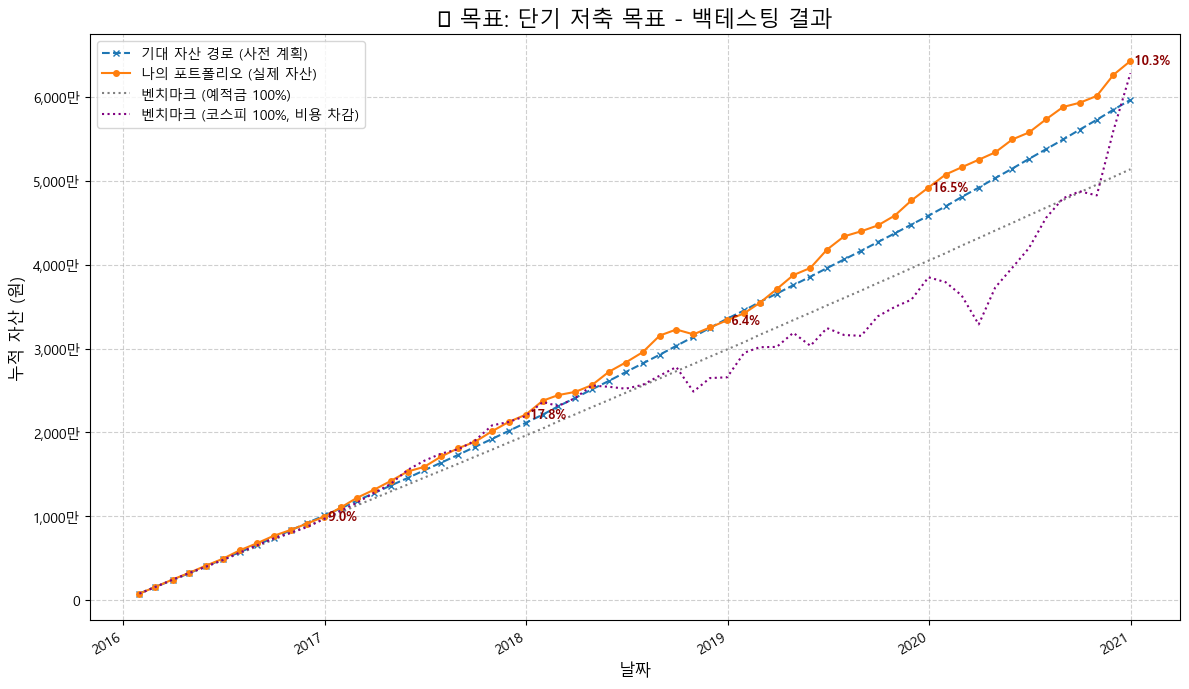

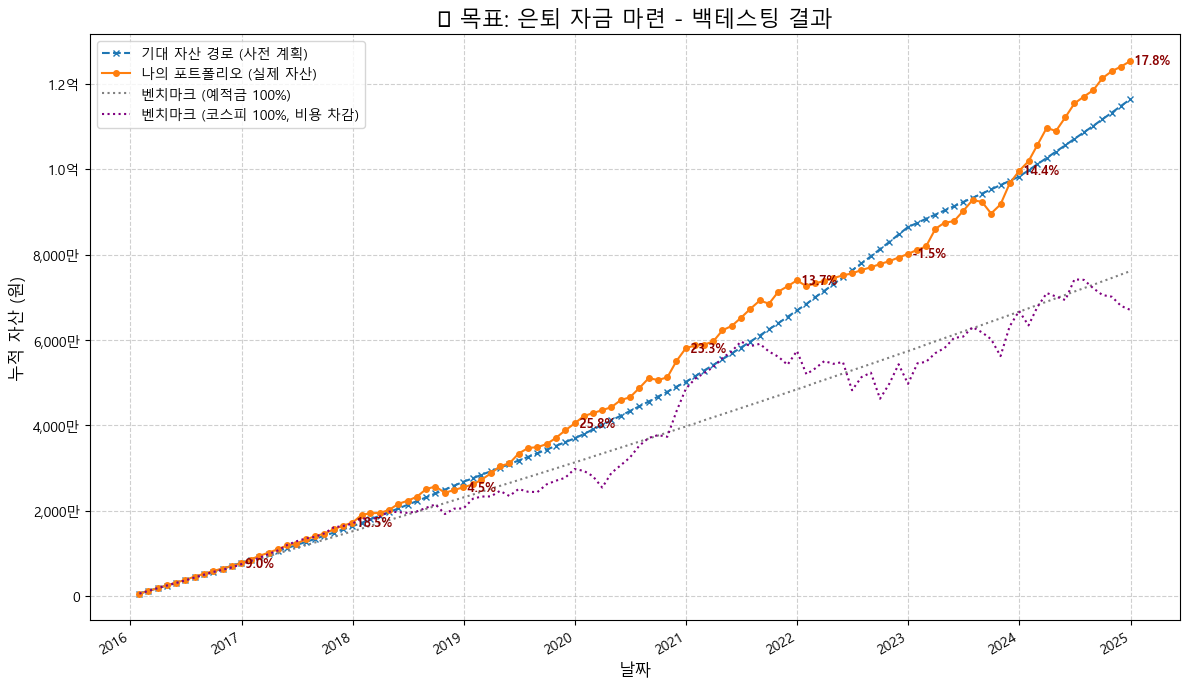

In [18]:
# ==============================================================================
# ÏÑπÏÖò 1: ÎùºÏù¥Î∏åÎü¨Î¶¨, Ìó¨Ìçº Ìï®Ïàò, ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
# ==============================================================================
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import yfinance as yf
import warnings

# ‚úÖ target=0(ÏÇ¨Ïã§ÏÉÅ ÌèêÍ∏∞Îêú) Î™©Ìëú Ï†úÍ±∞
final_adjusted_goals = [g for g in final_adjusted_goals if g.get("target", 0) > 0]

# ‚úÖ Ïù¥ÌõÑ Îã®Í≥Ñ(Î∞±ÌÖåÏä§Ìä∏/Í∑∏ÎûòÌîÑ)Í∞Ä Ïù¥ ÏµúÏ¢ÖÎ≥∏Îßå Î≥¥ÎèÑÎ°ù ÌôïÏ†ï
goal_list = [
    {
        "name": g["name"],
        "years": int(g["years"]),
        "target": int(g["target"]),
        "priority": int(g.get("priority", 99)),
        "necessity": g.get("necessity", "ÏÑ†ÌÉù"),
    }
    for g in final_adjusted_goals
]

# (ÏÑ†ÌÉù) Ï∫êÏãúÏóê ÏµúÏ¢ÖÎ≥∏ Ï†ÄÏû•Ìï¥ÏÑú Îã§Ïùå Ïã§Ìñâ ÎïåÎèÑ ÏùºÍ¥ÄÎêòÍ≤å ÏÇ¨Ïö©
with open("financial_goals_cache.json", "w", encoding="utf-8") as f:
    json.dump(goal_list, f, ensure_ascii=False, indent=4)


# --- Í∏∞Î≥∏ ÏÑ§Ï†ï ---
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

# --- ÌïÑÏàò Î≥ÄÏàò Ï†ïÏùò (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏÉùÏÑ±ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ï) ---
# df_returns_full, asset_names, df_merged, vol_limit_map, profile, goal_list Îì±Ïù¥
df_returns_full = df_merged.pct_change().dropna()

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
asset_fees = {
    'KOSPI': 0.0015, 'KOSPI200': 0.000039, 'KOSDAQ': 0.0025,
    'S&P 500': 0.00006, 'ÎÇòÏä§Îã• 100': 0.000062, 'CSI 300': 0.0049,
    'ÎãàÏºÄÏù¥ 225': 0.0006, 'Ïú†Î°úÏä§ÌÜ°Ïä§50': 0.0030, 'GLD': 0.0029,
    'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3M~1Y': 0.0015, 'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 2Y~3Y': 0.0015,
    'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3Y~5Y': 0.0015, 'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 5Y~10Y': 0.0012,
    'KRX Ï±ÑÍ∂åÏßÄÏàò ÌöåÏÇ¨Ï±Ñ Ï¢ÖÌï©': 0.0015
}
fee_rates = np.array([asset_fees.get(name, 0) for name in asset_names])
slippage_rate = 0.0005

# --- Ìó¨Ìçº Ìï®ÏàòÎì§ ---
def korean_currency_formatter(x, pos):
    if x >= 1e8: return f'{x / 1e8:,.1f}Ïñµ'
    if x >= 1e4: return f'{x / 1e4:,.0f}Îßå'
    return f'{x:,.0f}'

def get_unified_stock_limit(current_year_index, total_years):
    max_ratio, min_ratio = 0.9, 0.3
    glide_ratio = ((total_years-1) - current_year_index) / total_years if total_years > 0 else 0
    stock_ratio = min_ratio + (max_ratio - min_ratio) * glide_ratio
    return max(min_ratio, min(max_ratio, stock_ratio))

def calculate_monthly_investment(target_amount, yearly_return_rates):
    def simulate_fund(monthly_invest, rate_list):
        fund = 0
        for r in rate_list:
            for _ in range(12):
                fund = fund * (1 + r / 12) + monthly_invest
        return fund
    low, high = 0, 10_000_000
    while high - low > 1000:
        mid = (low + high) // 2
        if simulate_fund(mid, yearly_return_rates) > target_amount:
            high = mid
        else:
            low = mid
    return high

def generate_multifactor_signal(vix_data, market_df, vix_caution=23, vix_danger=30, ma_period=12):
    base_index = market_df.index
    vix_signal = pd.Series(0, index=base_index)
    if not vix_data.empty:
        vix_monthly_max = vix_data['Close'].resample('M').last().reindex(base_index, method='ffill').fillna(0)
        vix_signal[vix_monthly_max > vix_caution] = 1
        vix_signal[vix_monthly_max > vix_danger] = 2
    market_monthly_close = market_df['ÎÇòÏä§Îã• 100']
    ma_monthly = market_monthly_close.rolling(window=ma_period).mean()
    ma_signal = pd.Series(0, index=base_index)
    ma_signal[market_monthly_close < ma_monthly] = 2
    combined_signal = pd.DataFrame({'VIX': vix_signal.astype(int), 'MA': ma_signal.astype(int)}).max(axis=1)
    combined_signal.name = "RiskLevel"
    return combined_signal


# ==============================================================================
# ‚òÖ‚òÖ‚òÖ Î∞±ÌÖåÏä§ÌåÖ Ìï®Ïàò (Í∏∞ÎåÄ ÏûêÏÇ∞ Ìï≠Î™© Ï∂îÍ∞Ä) ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def run_and_analyze_backtest_with_costs(goals, returns_df, risk_signal, fees, slippage):
    all_results_df = pd.DataFrame()
    goal_summary_list = []
    all_goal_details = {}

    n_assets = len(asset_names)
    is_stock = np.array([0 if 'Ï±ÑÍ∂å' in name else 1 for name in asset_names])
    target_vol = vol_limit_map[profile]
    kospi_fee_monthly = asset_fees.get('KOSPI', 0) / 12

    try:
        safe_asset_idx = next(i for i, name in enumerate(asset_names) if 'Ï±ÑÍ∂å' in name)
    except StopIteration:
        raise ValueError("asset_names Î¶¨Ïä§Ìä∏ÏóêÏÑú 'Ï±ÑÍ∂å'ÏùÑ Ìè¨Ìï®ÌïòÎäî ÏûêÏÇ∞ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    safe_asset_weights = np.zeros(n_assets); safe_asset_weights[safe_asset_idx] = 1.0

    for goal in goals:
        goal_name, goal_years, target_amount = goal["name"], goal["years"], goal["target"]
        print(f"--- <{goal_name}> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---")

        yearly_expected_return, yearly_expected_vol, yearly_weights = [], [], []
        for year_idx in range(goal_years):
            train_end = pd.to_datetime('2015-12-31') + pd.DateOffset(years=year_idx)
            train_start = train_end - pd.DateOffset(years=10)
            train_returns = returns_df.loc[train_start:train_end]

            if train_returns.empty or len(train_returns) < 60:
                mu_train, cov_train, weights_opt = np.zeros(n_assets), np.zeros((n_assets, n_assets)), safe_asset_weights
            else:
                mu_train = train_returns.ewm(span=60).mean().iloc[-1].values * 12
                cov_train = train_returns.ewm(span=60).cov().iloc[-n_assets:].values * 12
                stock_limit = get_unified_stock_limit(year_idx, goal_years)
                w = cp.Variable(n_assets)
                constraints = [cp.sum(w) == 1, w >= 0, cp.quad_form(w, cov_train) <= target_vol**2, is_stock @ w <= stock_limit]
                prob = cp.Problem(cp.Maximize(mu_train @ w), constraints)
                prob.solve(solver=cp.SCS)
                weights_opt = w.value if (w.value is not None and prob.status == 'optimal') else safe_asset_weights

            yearly_expected_return.append(mu_train @ weights_opt)
            yearly_expected_vol.append(np.sqrt(weights_opt.T @ cov_train @ weights_opt))
            yearly_weights.append(weights_opt)

        monthly_investment = calculate_monthly_investment(target_amount, yearly_expected_return)
        goal_summary_list.append({"Î™©ÌëúÎ™Ö": goal_name, "Î™©Ìëú Í∏∞Í∞Ñ (ÎÖÑ)": goal_years, "Î™©Ìëú Í∏àÏï° (Ïõê)": target_amount, "ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)": monthly_investment, "Ïó∞ÌèâÍ∑† Í∏∞ÎåÄÏàòÏùµÎ•† (%)": np.mean(yearly_expected_return) * 100})

        backtest_start_date = pd.to_datetime('2016-01-31')
        actual_end_date = backtest_start_date + pd.DateOffset(years=goal_years) - pd.DateOffset(days=1)
        actual_returns = returns_df.loc[backtest_start_date : min(pd.to_datetime('2024-12-31'), actual_end_date)]
        
        path_data = []
        if not actual_returns.empty:
            fund_final, fund_savings, fund_kospi, fund_expected = 0, 0, 0, 0
            previous_weights = yearly_weights[0]
            for i, date in enumerate(actual_returns.index):
                year_idx = min(date.year - backtest_start_date.year, goal_years - 1)
                risk_level = risk_signal.get(date, 0)
                weights_tdf = yearly_weights[year_idx]
                
                weights_final = (weights_tdf * 0.5) + (safe_asset_weights * 0.5) if risk_level == 1 else safe_asset_weights if risk_level == 2 else weights_tdf
                
                turnover = np.sum(np.abs(weights_final - previous_weights)) / 2
                transaction_cost = (fund_final * turnover) * slippage_rate
                return_final = np.dot(actual_returns.loc[date].values, weights_final)
                fund_final = fund_final * (1 + return_final) + monthly_investment - transaction_cost
                
                expected_r, kospi_return = yearly_expected_return[year_idx], actual_returns.loc[date, 'KOSPI']
                fund_expected = fund_expected * (1 + expected_r / 12) + monthly_investment
                fund_savings = fund_savings * (1 + 0.03 / 12) + monthly_investment
                fund_kospi = fund_kospi * (1 + kospi_return) + monthly_investment - (fund_kospi * kospi_fee_monthly)

                path_data.append({'Í∏∞Í∞Ñ': date, 'Î™©Ìëú': goal_name, 'Ïõî Ìà¨ÏûêÍ∏à': monthly_investment, 'Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)': fund_final, 'Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)': fund_expected, 'Ïã§Ï†ú ÏûêÏÇ∞ (ÏòàÏ†ÅÍ∏à)': fund_savings, 'Ïã§Ï†ú ÏûêÏÇ∞ (ÏΩîÏä§Ìîº, ÎπÑÏö© Ï∞®Í∞ê)': fund_kospi, 'ÏõîÎ≥Ñ Ïã§Ï†úÏàòÏùµÎ•†': return_final})
                previous_weights = weights_final

        monthly_summary_full = pd.DataFrame(path_data)
        if monthly_summary_full.empty: continue
        all_results_df = pd.concat([all_results_df, monthly_summary_full], ignore_index=True)
        
        monthly_summary = monthly_summary_full.set_index('Í∏∞Í∞Ñ')
        annual_perf_records = []
        yearly_summary = monthly_summary.resample('A').last()
        yearly_vols = monthly_summary['ÏõîÎ≥Ñ Ïã§Ï†úÏàòÏùµÎ•†'].resample('A').std() * np.sqrt(12)

        previous_year_asset = 0
        for i, (year_end_date, row) in enumerate(yearly_summary.iterrows()):
            if i >= len(yearly_expected_return): break
            year = year_end_date.year
            current_year_months = monthly_summary.loc[str(year)].shape[0]
            cumulative_investment = monthly_investment * ((i * 12) + current_year_months)
            final_asset = row['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)']
            principal_this_year = monthly_investment * current_year_months
            investment_gain = final_asset - previous_year_asset - principal_this_year
            denominator = previous_year_asset + (principal_this_year / 2)
            actual_annual_return = investment_gain / denominator if denominator != 0 else 0
            cumulative_return = (final_asset - cumulative_investment) / cumulative_investment if cumulative_investment > 0 else 0
            
            annual_perf_records.append({"Ïó∞ÎèÑ": year, "Í∏∞ÎåÄÏàòÏùµÎ•†": yearly_expected_return[i], "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±": yearly_expected_vol[i], "Ïã§Ï†úÏàòÏùµÎ•†": actual_annual_return, "Ïã§Ï†úÎ≥ÄÎèôÏÑ±": yearly_vols.get(year_end_date, 0), "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à": cumulative_investment, "Í∏∞ÎåÄÏûêÏÇ∞": row['Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)'], "ÎàÑÏ†ÅÏûêÏÇ∞": final_asset, "ÎàÑÏ†ÅÏàòÏùµÎ•†": cumulative_return})
            previous_year_asset = final_asset

        all_goal_details[goal_name] = {"performance": pd.DataFrame(annual_perf_records), "allocation": pd.DataFrame(yearly_weights[:len(annual_perf_records)], index=[r['Ïó∞ÎèÑ'] for r in annual_perf_records], columns=asset_names)}
    return all_results_df, goal_summary_list, all_goal_details

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏÉÅÏÑ∏ Î∂ÑÏÑù Ìëú Ï∂úÎ†• Ìï®Ïàò (Í∏∞ÎåÄ ÏûêÏÇ∞ Ìï≠Î™© Ï∂îÍ∞Ä) ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def display_detailed_analysis(all_goal_details):
    print("\n\n" + "="*80)
    print("### üéØ Î™©ÌëúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ###")
    print("="*80 + "\n")

    for goal_name, details in all_goal_details.items():
        print(f"\n--- üìä Î™©Ìëú: {goal_name} ---\n")
        print(" [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]")
        perf_df = details['performance']
        if not perf_df.empty:
            # ‚úÖ Ïª¨Îüº ÏàúÏÑú Ïû¨Ï†ïÏùò Î∞è ÏÑúÏãù Ï∂îÍ∞Ä
            column_order = ["Ïó∞ÎèÑ", "Í∏∞ÎåÄÏàòÏùµÎ•†", "Ïã§Ï†úÏàòÏùµÎ•†", "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±", "Ïã§Ï†úÎ≥ÄÎèôÏÑ±", "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à", "Í∏∞ÎåÄÏûêÏÇ∞", "ÎàÑÏ†ÅÏûêÏÇ∞", "ÎàÑÏ†ÅÏàòÏùµÎ•†"]
            perf_df = perf_df[column_order]
            display(perf_df.style.format({"Ïó∞ÎèÑ": "{:d}", "Í∏∞ÎåÄÏàòÏùµÎ•†": "{:.2%}", "Ïã§Ï†úÏàòÏùµÎ•†": "{:.2%}", "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±": "{:.2%}", "Ïã§Ï†úÎ≥ÄÎèôÏÑ±": "{:.2%}", "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à": "{:,.0f}Ïõê", "Í∏∞ÎåÄÏûêÏÇ∞": "{:,.0f}Ïõê", "ÎàÑÏ†ÅÏûêÏÇ∞": "{:,.0f}Ïõê", "ÎàÑÏ†ÅÏàòÏùµÎ•†": "{:.2%}"}).hide(axis="index"))
        else: print("  - ÏÑ±Í≥º Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

        print("\n [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]")
        alloc_df = details['allocation']
        if not alloc_df.empty:
            alloc_to_display = alloc_df.loc[:, (alloc_df != 0).any(axis=0)]
            display(alloc_to_display.style.format("{:.1%}"))
        else: print("  - ÏûêÏÇ∞ Î∞∞Î∂Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        print("\n" + "-"*60)
        
# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏãúÍ∞ÅÌôî Ìï®Ïàò ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def plot_final_comparison_with_costs(df_comparison, goals):
    print("\n\n--- ### **ÏµúÏ¢Ö Ï†ÑÎûµ Î∞è Î≤§ÏπòÎßàÌÅ¨ ÎπÑÍµê Í∑∏ÎûòÌîÑ (ÏàòÏàòÎ£å+Ïä¨Î¶¨ÌîºÏßÄ Î∞òÏòÅ)** ---\n")
    for goal in goals:
        goal_name = goal['name']
        is_short_term = goal.get("is_short_term", False)
        df_goal = df_comparison[df_comparison['Î™©Ìëú'] == goal_name].copy()
        if df_goal.empty: continue
        
        df_goal['Í∏∞Í∞Ñ'] = pd.to_datetime(df_goal['Í∏∞Í∞Ñ'])
        df_goal_indexed = df_goal.set_index('Í∏∞Í∞Ñ')
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(df_goal_indexed.index, df_goal_indexed['Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)'], marker='x', linestyle='--', markersize=4, label="Í∏∞ÎåÄ ÏûêÏÇ∞ Í≤ΩÎ°ú (ÏÇ¨Ï†Ñ Í≥ÑÌöç)")
        ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)'], marker='o', markersize=4, label="ÎÇòÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ïã§Ï†ú ÏûêÏÇ∞)")
        if not is_short_term:
            ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÏòàÏ†ÅÍ∏à)'], linestyle=':', color='gray', label="Î≤§ÏπòÎßàÌÅ¨ (ÏòàÏ†ÅÍ∏à 100%)")
            ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÏΩîÏä§Ìîº, ÎπÑÏö© Ï∞®Í∞ê)'], linestyle=':', color='purple', label="Î≤§ÏπòÎßàÌÅ¨ (ÏΩîÏä§Ìîº 100%, ÎπÑÏö© Ï∞®Í∞ê)")

        yearly_assets = df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)'].resample('Y').last()
        monthly_investment_for_goal = df_goal['Ïõî Ìà¨ÏûêÍ∏à'].iloc[0]
        previous_year_asset = 0
        for date, end_of_year_asset in yearly_assets.items():
            current_year = date.year
            months_in_year = (df_goal_indexed.index.year == current_year).sum()
            principal_this_year = monthly_investment_for_goal * months_in_year
            investment_gain = end_of_year_asset - previous_year_asset - principal_this_year
            denominator = previous_year_asset + (principal_this_year / 2) if previous_year_asset > 0 else principal_this_year / 2
            annual_return = investment_gain / denominator if denominator != 0 else 0
            ax.text(date, end_of_year_asset, f' {annual_return:.1%}', ha='left', va='center', fontsize=9, color='darkred', fontweight='bold')
            previous_year_asset = end_of_year_asset

        ax.set_title(f"üìà Î™©Ìëú: {goal_name} - Î∞±ÌÖåÏä§ÌåÖ Í≤∞Í≥º", fontsize=16)
        ax.set_xlabel("ÎÇ†Ïßú", fontsize=12)
        ax.set_ylabel("ÎàÑÏ†Å ÏûêÏÇ∞ (Ïõê)", fontsize=12)
        ax.yaxis.set_major_formatter(FuncFormatter(korean_currency_formatter))
        ax.legend(fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        fig.autofmt_xdate()
        plt.tight_layout()
        plt.show()

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏµúÏ¢Ö Ïã§ÌñâÎ∂Ä ‚òÖ‚òÖ‚òÖ
# ==============================================================================
try:
    vix_data_raw = yf.download('^VIX', start='2005-01-01', end='2024-12-31', progress=False)
    vix_daily = pd.DataFrame() if vix_data_raw.empty else vix_data_raw.droplevel(1, axis=1)[['Close']].copy() if isinstance(vix_data_raw.columns, pd.MultiIndex) else vix_data_raw[['Close']].copy()
except Exception as e:
    print(f"‚ö†Ô∏è VIX ÏßÄÏàò Îã§Ïö¥Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}.")
    vix_daily = pd.DataFrame()

multifactor_signal_nasdaq = generate_multifactor_signal(vix_daily, df_merged)

if 'goal_list' in locals() and goal_list:
    final_comparison_for_plot, goal_summary_data, all_details = run_and_analyze_backtest_with_costs(goals=goal_list, returns_df=df_returns_full, risk_signal=multifactor_signal_nasdaq, fees=fee_rates, slippage=slippage_rate)
    display_detailed_analysis(all_details)
    plot_final_comparison_with_costs(final_comparison_for_plot, goal_list)
else:
    print("‚ö†Ô∏è 'goal_list'Í∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïÑ Î∞±ÌÖåÏä§ÌåÖÏùÑ Ïã§ÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")

--- <Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---
--- <ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†®> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---


### üéØ Î™©ÌëúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ###


--- üìä Î™©Ìëú: Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú ---

 [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]



 [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]



------------------------------------------------------------

--- üìä Î™©Ìëú: ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†® ---

 [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]



 [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]



------------------------------------------------------------


--- ### **ÏµúÏ¢Ö Ï†ÑÎûµ Î∞è Î≤§ÏπòÎßàÌÅ¨ ÎπÑÍµê Í∑∏ÎûòÌîÑ (ÏàòÏàòÎ£å+Ïä¨Î¶¨ÌîºÏßÄ Î∞òÏòÅ)** ---



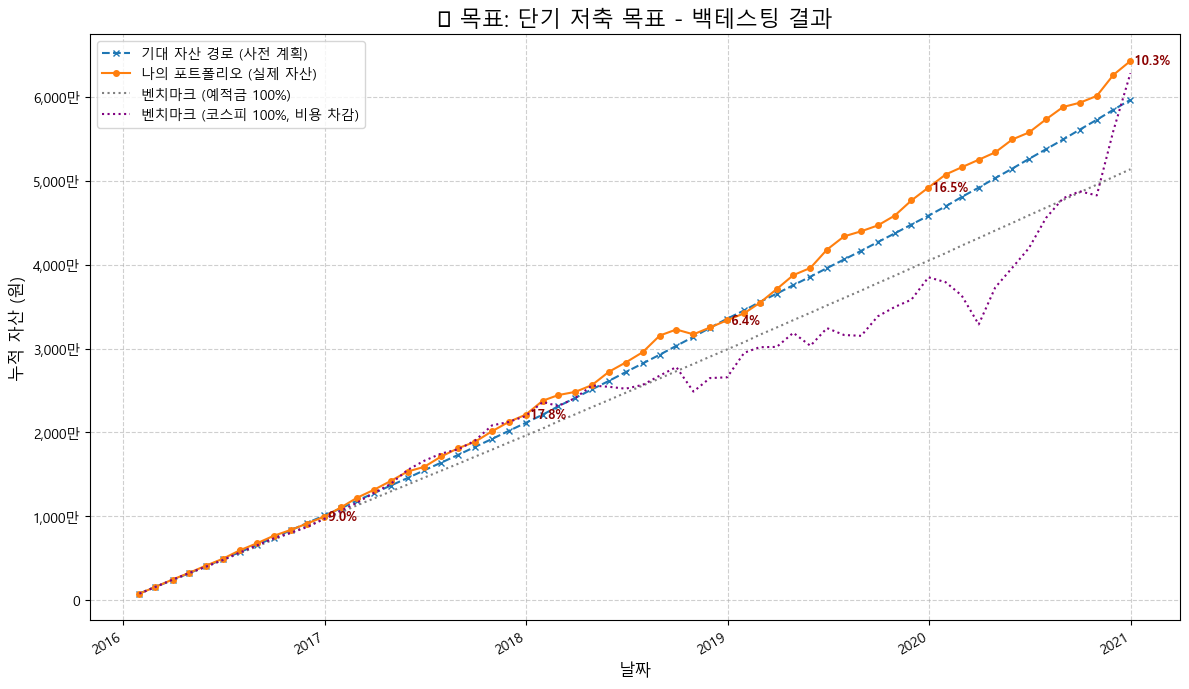

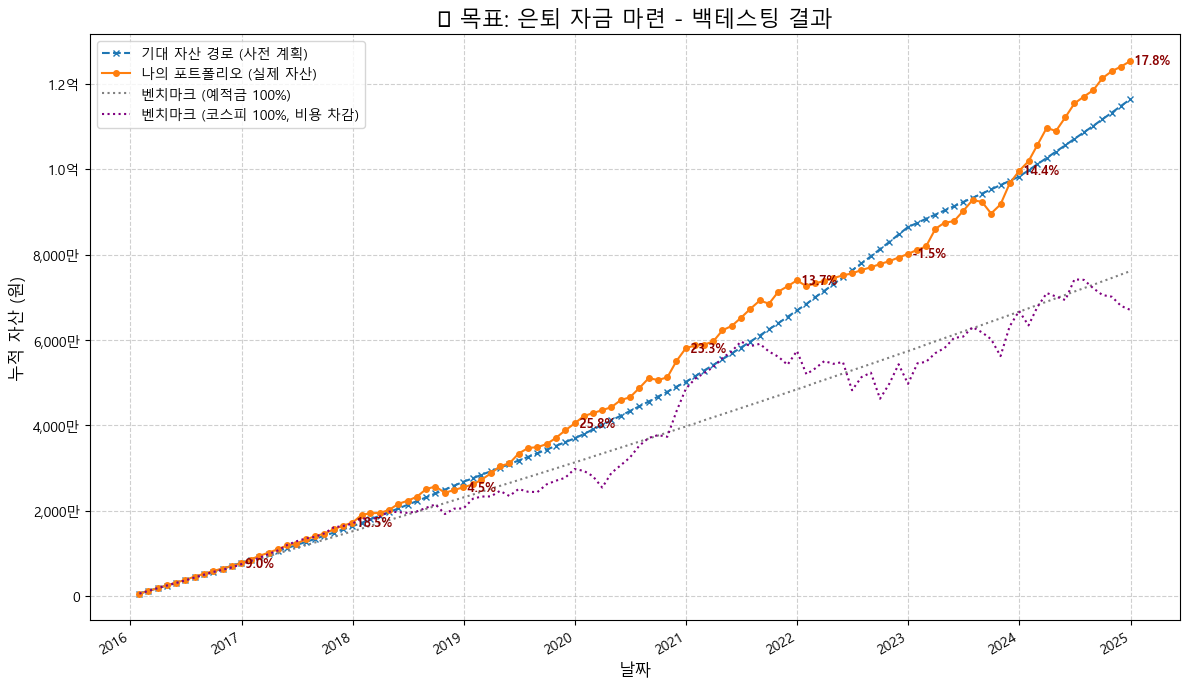


===== [Îã®Í∏∞ Ï†ÄÏ∂ï Î™©Ìëú] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ vs ÎÇòÏä§Îã•100 =====
Í∏∞Í∞Ñ: 2016-01-31 ~ 2020-12-31
- CAGR    : PF 144.37% / NDX 25.14% / Œî 119.23%
- Vol(Ïó∞) : PF 52.00%  / NDX 17.28%  / Œî 34.71%
- MDD     : PF -1.78%  / NDX -17.30%  / Œî 15.52%
- Sharpe  : PF 1.96 / NDX 1.39 / Œî 0.56
- ÏõîÍ∞Ñ Ï¥àÍ≥ºÏàòÏùµ ÏäπÎ•† : 76.27%


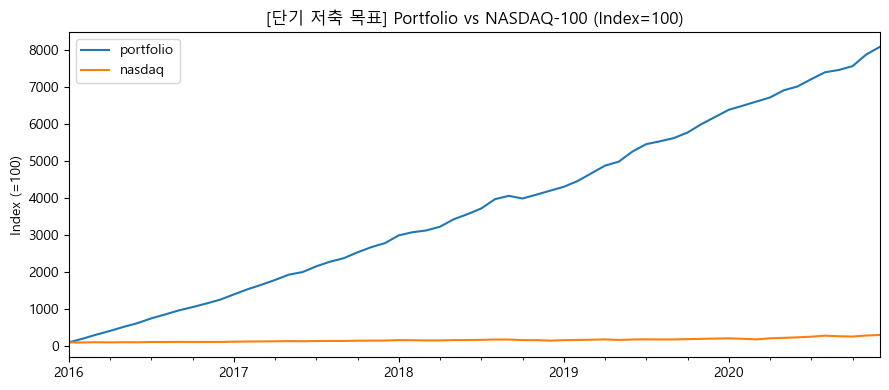


===== [ÏùÄÌá¥ ÏûêÍ∏à ÎßàÎ†®] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ vs ÎÇòÏä§Îã•100 =====
Í∏∞Í∞Ñ: 2016-01-31 ~ 2024-12-31
- CAGR    : PF 81.54% / NDX 19.54% / Œî 62.01%
- Vol(Ïó∞) : PF 40.58%  / NDX 18.61%  / Œî 21.97%
- MDD     : PF -5.69%  / NDX -32.97%  / Œî 27.28%
- Sharpe  : PF 1.64 / NDX 1.06 / Œî 0.59
- ÏõîÍ∞Ñ Ï¥àÍ≥ºÏàòÏùµ ÏäπÎ•† : 71.03%


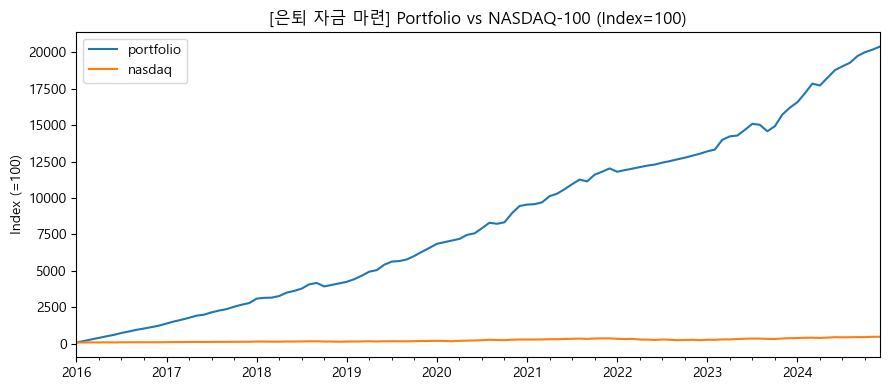

In [23]:
# ==============================================================================
# ÏÑπÏÖò 1: ÎùºÏù¥Î∏åÎü¨Î¶¨, Ìó¨Ìçº Ìï®Ïàò, ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
# ==============================================================================
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import yfinance as yf
import warnings
import json

# ‚úÖ target=0(ÏÇ¨Ïã§ÏÉÅ ÌèêÍ∏∞Îêú) Î™©Ìëú Ï†úÍ±∞
final_adjusted_goals = [g for g in final_adjusted_goals if g.get("target", 0) > 0]

# ‚úÖ Ïù¥ÌõÑ Îã®Í≥Ñ(Î∞±ÌÖåÏä§Ìä∏/Í∑∏ÎûòÌîÑ)Í∞Ä Ïù¥ ÏµúÏ¢ÖÎ≥∏Îßå Î≥¥ÎèÑÎ°ù ÌôïÏ†ï
goal_list = [
    {
        "name": g["name"],
        "years": int(g["years"]),
        "target": int(g["target"]),
        "priority": int(g.get("priority", 99)),
        "necessity": g.get("necessity", "ÏÑ†ÌÉù"),
    }
    for g in final_adjusted_goals
]

# (ÏÑ†ÌÉù) Ï∫êÏãúÏóê ÏµúÏ¢ÖÎ≥∏ Ï†ÄÏû•Ìï¥ÏÑú Îã§Ïùå Ïã§Ìñâ ÎïåÎèÑ ÏùºÍ¥ÄÎêòÍ≤å ÏÇ¨Ïö©
with open("financial_goals_cache.json", "w", encoding="utf-8") as f:
    json.dump(goal_list, f, ensure_ascii=False, indent=4)

# --- Í∏∞Î≥∏ ÏÑ§Ï†ï ---
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

# --- ÌïÑÏàò Î≥ÄÏàò Ï†ïÏùò (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏÉùÏÑ±ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ï) ---
# df_returns_full, asset_names, df_merged, vol_limit_map, profile, goal_list Îì±Ïù¥
df_returns_full = df_merged.pct_change().dropna()

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
asset_fees = {
    'KOSPI': 0.0015, 'KOSPI200': 0.000039, 'KOSDAQ': 0.0025,
    'S&P 500': 0.00006, 'ÎÇòÏä§Îã• 100': 0.000062, 'CSI 300': 0.0049,
    'ÎãàÏºÄÏù¥ 225': 0.0006, 'Ïú†Î°úÏä§ÌÜ°Ïä§50': 0.0030, 'GLD': 0.0029,
    'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3M~1Y': 0.0015, 'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 2Y~3Y': 0.0015,
    'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 3Y~5Y': 0.0015, 'KRX Ï±ÑÍ∂åÏßÄÏàò Íµ≠Ï±Ñ 5Y~10Y': 0.0012,
    'KRX Ï±ÑÍ∂åÏßÄÏàò ÌöåÏÇ¨Ï±Ñ Ï¢ÖÌï©': 0.0015
}
fee_rates = np.array([asset_fees.get(name, 0) for name in asset_names])
slippage_rate = 0.0005

# --- Ìó¨Ìçº Ìï®ÏàòÎì§ ---
def korean_currency_formatter(x, pos):
    if x >= 1e8: return f'{x / 1e8:,.1f}Ïñµ'
    if x >= 1e4: return f'{x / 1e4:,.0f}Îßå'
    return f'{x:,.0f}'

def get_unified_stock_limit(current_year_index, total_years):
    max_ratio, min_ratio = 0.9, 0.3
    glide_ratio = ((total_years-1) - current_year_index) / total_years if total_years > 0 else 0
    stock_ratio = min_ratio + (max_ratio - min_ratio) * glide_ratio
    return max(min_ratio, min(max_ratio, stock_ratio))

def calculate_monthly_investment(target_amount, yearly_return_rates):
    def simulate_fund(monthly_invest, rate_list):
        fund = 0
        for r in rate_list:
            for _ in range(12):
                fund = fund * (1 + r / 12) + monthly_invest
        return fund
    low, high = 0, 10_000_000
    while high - low > 1000:
        mid = (low + high) // 2
        if simulate_fund(mid, yearly_return_rates) > target_amount:
            high = mid
        else:
            low = mid
    return high

def generate_multifactor_signal(vix_data, market_df, vix_caution=23, vix_danger=30, ma_period=12):
    base_index = market_df.index
    vix_signal = pd.Series(0, index=base_index)
    if not vix_data.empty:
        vix_monthly_max = vix_data['Close'].resample('M').last().reindex(base_index, method='ffill').fillna(0)
        vix_signal[vix_monthly_max > vix_caution] = 1
        vix_signal[vix_monthly_max > vix_danger] = 2
    market_monthly_close = market_df['ÎÇòÏä§Îã• 100']
    ma_monthly = market_monthly_close.rolling(window=ma_period).mean()
    ma_signal = pd.Series(0, index=base_index)
    ma_signal[market_monthly_close < ma_monthly] = 2
    combined_signal = pd.DataFrame({'VIX': vix_signal.astype(int), 'MA': ma_signal.astype(int)}).max(axis=1)
    combined_signal.name = "RiskLevel"
    return combined_signal

# ======================================================================
# ‚úÖ ÎÇòÏä§Îã•(ÎÇòÏä§Îã• 100)Í≥º ÎπÑÍµê Ïú†Ìã∏ (ÎÇ¥Î∂Ä df_merged['ÎÇòÏä§Îã• 100'] ÏÇ¨Ïö©)
# ======================================================================

def fmt(x):
    return f"{x:.2f}" if pd.notna(x) else "-"
def _to_month_end(s: pd.Series) -> pd.Series:
    if not isinstance(s.index, pd.DatetimeIndex):
        s.index = pd.to_datetime(s.index)
    return s.resample('M').last()

def _norm100(s: pd.Series) -> pd.Series:
    s = s.dropna()
    return s / (s.iloc[0] if s.iloc[0] != 0 else 1) * 100.0

def _mdd(series100: pd.Series) -> float:
    roll_max = series100.cummax()
    dd = series100 / roll_max - 1.0
    return dd.min()  # ÏùåÏàòÍ∞í

def _cagr(series100: pd.Series) -> float:
    s = series100.dropna()
    if len(s) < 2: return np.nan
    years = max(len(s)-1, 1) / 12.0  # ÏõîÎßê Í∏∞Ï§Ä
    return (s.iloc[-1] / s.iloc[0]) ** (1/years) - 1

def _ann_vol(mret: pd.Series) -> float:
    return mret.std(ddof=1) * np.sqrt(12)

def _sharpe(mret: pd.Series, rf_annual: float = 0.0) -> float:
    rf_m = (1 + rf_annual) ** (1/12) - 1
    excess = mret - rf_m
    vol = excess.std(ddof=1)
    return np.nan if vol == 0 or np.isnan(vol) else (excess.mean()*np.sqrt(12))/vol

def compare_vs_nasdaq_inline(portfolio_equity: pd.Series,
                             nasdaq_price: pd.Series,
                             start: str, end: str,
                             rf_annual: float = 0.0):
    # ÏõîÎßê Ï†ïÎ†¨ & Í∏∞Í∞Ñ Ïä¨ÎùºÏù¥Ïã±
    p = _to_month_end(portfolio_equity).loc[start:end].dropna()
    n = _to_month_end(nasdaq_price).loc[start:end].dropna()

    # ÏßÄÏàò=100 Ï†ïÍ∑úÌôî
    p100 = _norm100(p).rename('portfolio')
    n100 = _norm100(n).rename('nasdaq')
    aligned = pd.concat([p100, n100], axis=1).dropna()

    mret = aligned.pct_change().dropna()
    pr, nr = mret['portfolio'], mret['nasdaq']

    report = {
        "period": f"{aligned.index.min().date()} ~ {aligned.index.max().date()}",
        "portfolio": {"CAGR": _cagr(p100), "Vol": _ann_vol(pr), "MDD": _mdd(p100), "Sharpe": _sharpe(pr, rf_annual)},
        "nasdaq":    {"CAGR": _cagr(n100), "Vol": _ann_vol(nr), "MDD": _mdd(n100), "Sharpe": _sharpe(nr, rf_annual)},
        "diff": {},
        "win_rate_over_nasdaq_m": float((pr - nr > 0).sum())/len(mret) if len(mret)>0 else np.nan
    }
    report["diff"] = {
        "CAGR": report["portfolio"]["CAGR"] - report["nasdaq"]["CAGR"],
        "Vol":  report["portfolio"]["Vol"]  - report["nasdaq"]["Vol"],
        "MDD":  report["portfolio"]["MDD"]  - report["nasdaq"]["MDD"],
        "Sharpe": (report["portfolio"]["Sharpe"] - report["nasdaq"]["Sharpe"]
                   if (pd.notna(report["portfolio"]["Sharpe"]) and pd.notna(report["nasdaq"]["Sharpe"])) else np.nan)
    }
    return report, aligned

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ Î∞±ÌÖåÏä§ÌåÖ Ìï®Ïàò (Í∏∞ÎåÄ ÏûêÏÇ∞ Ìï≠Î™© Ï∂îÍ∞Ä) ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def run_and_analyze_backtest_with_costs(goals, returns_df, risk_signal, fees, slippage):
    all_results_df = pd.DataFrame()
    goal_summary_list = []
    all_goal_details = {}

    n_assets = len(asset_names)
    is_stock = np.array([0 if 'Ï±ÑÍ∂å' in name else 1 for name in asset_names])
    target_vol = vol_limit_map[profile]
    kospi_fee_monthly = asset_fees.get('KOSPI', 0) / 12

    try:
        safe_asset_idx = next(i for i, name in enumerate(asset_names) if 'Ï±ÑÍ∂å' in name)
    except StopIteration:
        raise ValueError("asset_names Î¶¨Ïä§Ìä∏ÏóêÏÑú 'Ï±ÑÍ∂å'ÏùÑ Ìè¨Ìï®ÌïòÎäî ÏûêÏÇ∞ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    safe_asset_weights = np.zeros(n_assets); safe_asset_weights[safe_asset_idx] = 1.0

    for goal in goals:
        goal_name, goal_years, target_amount = goal["name"], goal["years"], goal["target"]
        print(f"--- <{goal_name}> Î™©Ìëú Í≥ÑÏÇ∞ Î∞è Î∞±ÌÖåÏä§ÌåÖ ÏßÑÌñâ Ï§ë ---")

        yearly_expected_return, yearly_expected_vol, yearly_weights = [], [], []
        for year_idx in range(goal_years):
            train_end = pd.to_datetime('2015-12-31') + pd.DateOffset(years=year_idx)
            train_start = train_end - pd.DateOffset(years=10)
            train_returns = returns_df.loc[train_start:train_end]

            if train_returns.empty or len(train_returns) < 60:
                mu_train, cov_train, weights_opt = np.zeros(n_assets), np.zeros((n_assets, n_assets)), safe_asset_weights
            else:
                mu_train = train_returns.ewm(span=60).mean().iloc[-1].values * 12
                cov_train = train_returns.ewm(span=60).cov().iloc[-n_assets:].values * 12
                stock_limit = get_unified_stock_limit(year_idx, goal_years)
                w = cp.Variable(n_assets)
                constraints = [cp.sum(w) == 1, w >= 0, cp.quad_form(w, cov_train) <= target_vol**2, is_stock @ w <= stock_limit]
                prob = cp.Problem(cp.Maximize(mu_train @ w), constraints)
                prob.solve(solver=cp.SCS)
                weights_opt = w.value if (w.value is not None and prob.status == 'optimal') else safe_asset_weights

            yearly_expected_return.append(mu_train @ weights_opt)
            yearly_expected_vol.append(np.sqrt(weights_opt.T @ cov_train @ weights_opt))
            yearly_weights.append(weights_opt)

        monthly_investment = calculate_monthly_investment(target_amount, yearly_expected_return)
        goal_summary_list.append({
            "Î™©ÌëúÎ™Ö": goal_name, "Î™©Ìëú Í∏∞Í∞Ñ (ÎÖÑ)": goal_years, "Î™©Ìëú Í∏àÏï° (Ïõê)": target_amount,
            "ÌïÑÏöî Ïõî Ï†ÄÏ∂ïÏï° (Ïõê)": monthly_investment, "Ïó∞ÌèâÍ∑† Í∏∞ÎåÄÏàòÏùµÎ•† (%)": np.mean(yearly_expected_return) * 100
        })

        backtest_start_date = pd.to_datetime('2016-01-31')
        actual_end_date = backtest_start_date + pd.DateOffset(years=goal_years) - pd.DateOffset(days=1)
        actual_returns = returns_df.loc[backtest_start_date : min(pd.to_datetime('2024-12-31'), actual_end_date)]
        
        path_data = []
        if not actual_returns.empty:
            fund_final, fund_savings, fund_kospi, fund_expected = 0, 0, 0, 0
            previous_weights = yearly_weights[0]
            for i, date in enumerate(actual_returns.index):
                year_idx = min(date.year - backtest_start_date.year, goal_years - 1)
                risk_level = risk_signal.get(date, 0)
                weights_tdf = yearly_weights[year_idx]
                
                weights_final = (weights_tdf * 0.5) + (safe_asset_weights * 0.5) if risk_level == 1 else safe_asset_weights if risk_level == 2 else weights_tdf
                
                turnover = np.sum(np.abs(weights_final - previous_weights)) / 2
                transaction_cost = (fund_final * turnover) * slippage_rate
                return_final = np.dot(actual_returns.loc[date].values, weights_final)
                fund_final = fund_final * (1 + return_final) + monthly_investment - transaction_cost
                
                expected_r, kospi_return = yearly_expected_return[year_idx], actual_returns.loc[date, 'KOSPI']
                fund_expected = fund_expected * (1 + expected_r / 12) + monthly_investment
                fund_savings = fund_savings * (1 + 0.03 / 12) + monthly_investment
                fund_kospi = fund_kospi * (1 + kospi_return) + monthly_investment - (fund_kospi * kospi_fee_monthly)

                path_data.append({
                    'Í∏∞Í∞Ñ': date, 'Î™©Ìëú': goal_name, 'Ïõî Ìà¨ÏûêÍ∏à': monthly_investment,
                    'Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)': fund_final,
                    'Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)': fund_expected,
                    'Ïã§Ï†ú ÏûêÏÇ∞ (ÏòàÏ†ÅÍ∏à)': fund_savings,
                    'Ïã§Ï†ú ÏûêÏÇ∞ (ÏΩîÏä§Ìîº, ÎπÑÏö© Ï∞®Í∞ê)': fund_kospi,
                    'ÏõîÎ≥Ñ Ïã§Ï†úÏàòÏùµÎ•†': return_final
                })
                previous_weights = weights_final

        monthly_summary_full = pd.DataFrame(path_data)
        if monthly_summary_full.empty: continue
        all_results_df = pd.concat([all_results_df, monthly_summary_full], ignore_index=True)
        
        monthly_summary = monthly_summary_full.set_index('Í∏∞Í∞Ñ')
        annual_perf_records = []
        yearly_summary = monthly_summary.resample('A').last()
        yearly_vols = monthly_summary['ÏõîÎ≥Ñ Ïã§Ï†úÏàòÏùµÎ•†'].resample('A').std() * np.sqrt(12)

        previous_year_asset = 0
        for i, (year_end_date, row) in enumerate(yearly_summary.iterrows()):
            if i >= len(yearly_expected_return): break
            year = year_end_date.year
            current_year_months = monthly_summary.loc[str(year)].shape[0]
            cumulative_investment = monthly_investment * ((i * 12) + current_year_months)
            final_asset = row['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)']
            principal_this_year = monthly_investment * current_year_months
            investment_gain = final_asset - previous_year_asset - principal_this_year
            denominator = previous_year_asset + (principal_this_year / 2)
            actual_annual_return = investment_gain / denominator if denominator != 0 else 0
            cumulative_return = (final_asset - cumulative_investment) / cumulative_investment if cumulative_investment > 0 else 0
            
            annual_perf_records.append({
                "Ïó∞ÎèÑ": year, "Í∏∞ÎåÄÏàòÏùµÎ•†": yearly_expected_return[i], "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±": yearly_expected_vol[i],
                "Ïã§Ï†úÏàòÏùµÎ•†": actual_annual_return, "Ïã§Ï†úÎ≥ÄÎèôÏÑ±": yearly_vols.get(year_end_date, 0),
                "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à": cumulative_investment, "Í∏∞ÎåÄÏûêÏÇ∞": row['Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)'],
                "ÎàÑÏ†ÅÏûêÏÇ∞": final_asset, "ÎàÑÏ†ÅÏàòÏùµÎ•†": cumulative_return
            })
            previous_year_asset = final_asset

        all_goal_details[goal_name] = {
            "performance": pd.DataFrame(annual_perf_records),
            "allocation": pd.DataFrame(yearly_weights[:len(annual_perf_records)],
                                       index=[r['Ïó∞ÎèÑ'] for r in annual_perf_records],
                                       columns=asset_names)
        }
    return all_results_df, goal_summary_list, all_goal_details

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏÉÅÏÑ∏ Î∂ÑÏÑù Ìëú Ï∂úÎ†• Ìï®Ïàò (Í∏∞ÎåÄ ÏûêÏÇ∞ Ìï≠Î™© Ï∂îÍ∞Ä) ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def display_detailed_analysis(all_goal_details):
    print("\n\n" + "="*80)
    print("### üéØ Î™©ÌëúÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ###")
    print("="*80 + "\n")

    for goal_name, details in all_goal_details.items():
        print(f"\n--- üìä Î™©Ìëú: {goal_name} ---\n")
        print(" [ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥º ÏßÄÌëú ]")
        perf_df = details['performance']
        if not perf_df.empty:
            # ‚úÖ Ïª¨Îüº ÏàúÏÑú Ïû¨Ï†ïÏùò Î∞è ÏÑúÏãù Ï∂îÍ∞Ä
            column_order = ["Ïó∞ÎèÑ", "Í∏∞ÎåÄÏàòÏùµÎ•†", "Ïã§Ï†úÏàòÏùµÎ•†", "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±", "Ïã§Ï†úÎ≥ÄÎèôÏÑ±",
                            "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à", "Í∏∞ÎåÄÏûêÏÇ∞", "ÎàÑÏ†ÅÏûêÏÇ∞", "ÎàÑÏ†ÅÏàòÏùµÎ•†"]
            perf_df = perf_df[column_order]
            display(perf_df.style.format({
                "Ïó∞ÎèÑ": "{:d}", "Í∏∞ÎåÄÏàòÏùµÎ•†": "{:.2%}", "Ïã§Ï†úÏàòÏùµÎ•†": "{:.2%}",
                "Í∏∞ÎåÄÎ≥ÄÎèôÏÑ±": "{:.2%}", "Ïã§Ï†úÎ≥ÄÎèôÏÑ±": "{:.2%}",
                "ÎàÑÏ†ÅÌà¨ÏûêÍ∏à": "{:,.0f}Ïõê", "Í∏∞ÎåÄÏûêÏÇ∞": "{:,.0f}Ïõê",
                "ÎàÑÏ†ÅÏûêÏÇ∞": "{:,.0f}Ïõê", "ÎàÑÏ†ÅÏàòÏùµÎ•†": "{:.2%}"
            }).hide(axis="index"))
        else:
            print("  - ÏÑ±Í≥º Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

        print("\n [ Ïó∞ÎèÑÎ≥Ñ ÏûêÏÇ∞ Î∞∞Î∂Ñ (TDF Ï†ÑÎûµ) ]")
        alloc_df = details['allocation']
        if not alloc_df.empty:
            alloc_to_display = alloc_df.loc[:, (alloc_df != 0).any(axis=0)]
            display(alloc_to_display.style.format("{:.1%}"))
        else:
            print("  - ÏûêÏÇ∞ Î∞∞Î∂Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        print("\n" + "-"*60)

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏãúÍ∞ÅÌôî Ìï®Ïàò ‚òÖ‚òÖ‚òÖ
# ==============================================================================
def plot_final_comparison_with_costs(df_comparison, goals):
    print("\n\n--- ### **ÏµúÏ¢Ö Ï†ÑÎûµ Î∞è Î≤§ÏπòÎßàÌÅ¨ ÎπÑÍµê Í∑∏ÎûòÌîÑ (ÏàòÏàòÎ£å+Ïä¨Î¶¨ÌîºÏßÄ Î∞òÏòÅ)** ---\n")
    for goal in goals:
        goal_name = goal['name']
        is_short_term = goal.get("is_short_term", False)
        df_goal = df_comparison[df_comparison['Î™©Ìëú'] == goal_name].copy()
        if df_goal.empty: continue
        
        df_goal['Í∏∞Í∞Ñ'] = pd.to_datetime(df_goal['Í∏∞Í∞Ñ'])
        df_goal_indexed = df_goal.set_index('Í∏∞Í∞Ñ')
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(df_goal_indexed.index, df_goal_indexed['Í∏∞ÎåÄ ÏûêÏÇ∞ (Ïõê)'], marker='x',
                linestyle='--', markersize=4, label="Í∏∞ÎåÄ ÏûêÏÇ∞ Í≤ΩÎ°ú (ÏÇ¨Ï†Ñ Í≥ÑÌöç)")
        ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)'], marker='o',
                markersize=4, label="ÎÇòÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ (Ïã§Ï†ú ÏûêÏÇ∞)")
        if not is_short_term:
            ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÏòàÏ†ÅÍ∏à)'],
                    linestyle=':', color='gray', label="Î≤§ÏπòÎßàÌÅ¨ (ÏòàÏ†ÅÍ∏à 100%)")
            ax.plot(df_goal_indexed.index, df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÏΩîÏä§Ìîº, ÎπÑÏö© Ï∞®Í∞ê)'],
                    linestyle=':', color='purple', label="Î≤§ÏπòÎßàÌÅ¨ (ÏΩîÏä§Ìîº 100%, ÎπÑÏö© Ï∞®Í∞ê)")

        yearly_assets = df_goal_indexed['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)'].resample('Y').last()
        monthly_investment_for_goal = df_goal['Ïõî Ìà¨ÏûêÍ∏à'].iloc[0]
        previous_year_asset = 0
        for date, end_of_year_asset in yearly_assets.items():
            current_year = date.year
            months_in_year = (df_goal_indexed.index.year == current_year).sum()
            principal_this_year = monthly_investment_for_goal * months_in_year
            investment_gain = end_of_year_asset - previous_year_asset - principal_this_year
            denominator = previous_year_asset + (principal_this_year / 2) if previous_year_asset > 0 else principal_this_year / 2
            annual_return = investment_gain / denominator if denominator != 0 else 0
            ax.text(date, end_of_year_asset, f' {annual_return:.1%}', ha='left', va='center', fontsize=9, color='darkred', fontweight='bold')
            previous_year_asset = end_of_year_asset

        ax.set_title(f"üìà Î™©Ìëú: {goal_name} - Î∞±ÌÖåÏä§ÌåÖ Í≤∞Í≥º", fontsize=16)
        ax.set_xlabel("ÎÇ†Ïßú", fontsize=12)
        ax.set_ylabel("ÎàÑÏ†Å ÏûêÏÇ∞ (Ïõê)", fontsize=12)
        ax.yaxis.set_major_formatter(FuncFormatter(korean_currency_formatter))
        ax.legend(fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        fig.autofmt_xdate()
        plt.tight_layout()
        plt.show()

# ==============================================================================
# ‚òÖ‚òÖ‚òÖ ÏµúÏ¢Ö Ïã§ÌñâÎ∂Ä ‚òÖ‚òÖ‚òÖ
# ==============================================================================
try:
    vix_data_raw = yf.download('^VIX', start='2005-01-01', end='2024-12-31', progress=False)
    vix_daily = pd.DataFrame() if vix_data_raw.empty else (
        vix_data_raw.droplevel(1, axis=1)[['Close']].copy()
        if isinstance(vix_data_raw.columns, pd.MultiIndex) else vix_data_raw[['Close']].copy()
    )
except Exception as e:
    print(f"‚ö†Ô∏è VIX ÏßÄÏàò Îã§Ïö¥Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}.")
    vix_daily = pd.DataFrame()

    


multifactor_signal_nasdaq = generate_multifactor_signal(vix_daily, df_merged)

if 'goal_list' in locals() and goal_list:
    # 1) Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ Î∞è Í∏∞Ï°¥ Î¶¨Ìè¨Ìä∏/Í∑∏ÎûòÌîÑ
    final_comparison_for_plot, goal_summary_data, all_details = run_and_analyze_backtest_with_costs(
        goals=goal_list, returns_df=df_returns_full, risk_signal=multifactor_signal_nasdaq,
        fees=fee_rates, slippage=slippage_rate
    )
    display_detailed_analysis(all_details)
    plot_final_comparison_with_costs(final_comparison_for_plot, goal_list)

    # 2) ‚úÖ ÎÇòÏä§Îã•(ÎÇòÏä§Îã• 100)Í≥º Î™©ÌëúÎ≥Ñ Ï†ïÎüâ ÎπÑÍµê(ÎèôÏùº Í∏∞Í∞Ñ/ÏõîÎßê/Index=100) + Í∑∏ÎûòÌîÑ
    assert 'ÎÇòÏä§Îã• 100' in df_merged.columns, "'ÎÇòÏä§Îã• 100' Ïª¨ÎüºÏù¥ df_mergedÏóê ÌïÑÏöîÌï©ÎãàÎã§."
    nasdaq_px = df_merged['ÎÇòÏä§Îã• 100'].copy()

    all_reports = []
    for g in goal_list:
        goal_name = g['name']
        df_goal = final_comparison_for_plot[final_comparison_for_plot['Î™©Ìëú'] == goal_name].copy()
        if df_goal.empty:
            print(f"[Í±¥ÎÑàÎúÄ] Î™©Ìëú '{goal_name}' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
            continue

        s_port = df_goal.set_index('Í∏∞Í∞Ñ')['Ïã§Ï†ú ÏûêÏÇ∞ (ÎπÑÏö© Ï∞®Í∞ê)'].sort_index()
        s_port.index = pd.to_datetime(s_port.index)

        start = s_port.index.min().strftime("%Y-%m-%d")
        end   = s_port.index.max().strftime("%Y-%m-%d")

        rep, aligned100 = compare_vs_nasdaq_inline(
            portfolio_equity=s_port,
            nasdaq_price=nasdaq_px,
            start=start, end=end,
            rf_annual=0.0
        )

        # ÏΩòÏÜî ÏöîÏïΩ
        def pct(x): return "-" if pd.isna(x) else f"{x*100:.2f}%"
        print(f"\n===== [{goal_name}] Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ vs ÎÇòÏä§Îã•100 =====")
        print(f"Í∏∞Í∞Ñ: {rep['period']}")
        print(f"- CAGR    : PF {pct(rep['portfolio']['CAGR'])} / NDX {pct(rep['nasdaq']['CAGR'])} / Œî {pct(rep['diff']['CAGR'])}")
        print(f"- Vol(Ïó∞) : PF {pct(rep['portfolio']['Vol'])}  / NDX {pct(rep['nasdaq']['Vol'])}  / Œî {pct(rep['diff']['Vol'])}")
        print(f"- MDD     : PF {pct(rep['portfolio']['MDD'])}  / NDX {pct(rep['nasdaq']['MDD'])}  / Œî {pct(rep['diff']['MDD'])}")
        sh_pf = rep['portfolio']['Sharpe']; sh_ndx = rep['nasdaq']['Sharpe']; sh_d = rep['diff']['Sharpe']


        print(f"- Sharpe  : PF {fmt(sh_pf)} / NDX {fmt(sh_ndx)} / Œî {fmt(sh_d)}")

        print(f"- ÏõîÍ∞Ñ Ï¥àÍ≥ºÏàòÏùµ ÏäπÎ•† : {pct(rep['win_rate_over_nasdaq_m'])}")

        # ÏßÄÏàò=100 Í∑∏ÎûòÌîÑ
        ax = aligned100.plot(figsize=(9,4), title=f"[{goal_name}] Portfolio vs NASDAQ-100 (Index=100)")
        ax.set_ylabel("Index (=100)")
        plt.tight_layout(); plt.show()

        # ÏöîÏïΩ ÌÖåÏù¥Î∏î Ìñâ
        all_reports.append({
            "Î™©Ìëú": goal_name, "Í∏∞Í∞Ñ": rep["period"],
            "PF_CAGR": rep["portfolio"]["CAGR"], "NDX_CAGR": rep["nasdaq"]["CAGR"], "ŒîCAGR": rep["diff"]["CAGR"],
            "PF_Vol":  rep["portfolio"]["Vol"],  "NDX_Vol":  rep["nasdaq"]["Vol"],  "ŒîVol":  rep["diff"]["Vol"],
            "PF_MDD":  rep["portfolio"]["MDD"],  "NDX_MDD":  rep["nasdaq"]["MDD"],  "ŒîMDD":  rep["diff"]["MDD"],
            "PF_Sharpe": rep["portfolio"]["Sharpe"], "NDX_Sharpe": rep["nasdaq"]["Sharpe"], "ŒîSharpe": rep["diff"]["Sharpe"],
            "ÏõîÍ∞Ñ_Ï¥àÍ≥ºÏàòÏùµ_ÏäπÎ•†": rep["win_rate_over_nasdaq_m"],
        })

    # ÌëúÎ°ú Î≥¥Í∏∞(ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Ïù¥ÏÅòÍ≤å) + (ÏÑ†ÌÉù) Ï†ÄÏû•
    if all_reports:
        df_ndx_report = pd.DataFrame(all_reports)
        display(df_ndx_report.style.format({
            "PF_CAGR":"{:.2%}","NDX_CAGR":"{:.2%}","ŒîCAGR":"{:.2%}",
            "PF_Vol":"{:.2%}","NDX_Vol":"{:.2%}","ŒîVol":"{:.2%}",
            "PF_MDD":"{:.2%}","NDX_MDD":"{:.2%}","ŒîMDD":"{:.2%}",
            "PF_Sharpe":"{:.2f}","NDX_Sharpe":"{:.2f}","ŒîSharpe":"{:.2f}",
            "ÏõîÍ∞Ñ_Ï¥àÍ≥ºÏàòÏùµ_ÏäπÎ•†":"{:.2%}",
        }))
        # df_ndx_report.to_csv("portfolio_vs_nasdaq_summary.csv", index=False, encoding="utf-8-sig")

else:
    print("‚ö†Ô∏è 'goal_list'Í∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïÑ Î∞±ÌÖåÏä§ÌåÖÏùÑ Ïã§ÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")


## 5. Í∞ÄÍ≥ÑÎ∂Ä Î∂ÑÏÑù Î∞è ÌèâÍ∞Ä AI Î™®Îç∏

In [ ]:
# -*- coding: utf-8 -*-
"""
Financial Report Prompt Runner (fixed)
- Reads `client_profile` (global or client_profile.json)
- Builds analysis prompt identical to the assistant's earlier format
- Calls OpenAI Chat Completions (optional)
"""

import os
import json
import re
from datetime import datetime

# -----------------------------
# Utilities
# -----------------------------

# NumPy/Pandas Í∞ùÏ≤¥Î•º ÌååÏù¥Ïç¨ ÎÇ¥Ïû•ÌòïÏúºÎ°ú Î≥ÄÌôò
def _to_builtin(obj):
    try:
        import numpy as np
    except Exception:
        class _DummyNP: pass
        np = _DummyNP()
        np.integer = ()
        np.floating = ()
        np.ndarray = ()
    try:
        import pandas as pd
    except Exception:
        pd = None

    # ÏõêÏãúÌòï
    if obj is None or isinstance(obj, (str, int, float, bool)):
        return obj

    # NumPy Ïä§ÏπºÎùº
    if hasattr(np, 'integer') and isinstance(obj, np.integer):
        return int(obj)
    if hasattr(np, 'floating') and isinstance(obj, np.floating):
        return float(obj)

    # Pandas Timestamp/NaT
    if pd is not None:
        if isinstance(obj, getattr(pd, 'Timestamp', ())):
            return obj.isoformat()
        if obj is getattr(pd, 'NaT', None):
            return None

    # datetime
    from datetime import datetime, date
    if isinstance(obj, (datetime, date)):
        return obj.isoformat()

    # dict
    if isinstance(obj, dict):
        return {str(_to_builtin(k)): _to_builtin(v) for k, v in obj.items()}

    # list/tuple/set
    if isinstance(obj, (list, tuple, set)):
        return [_to_builtin(v) for v in obj]

    # NumPy Î∞∞Ïó¥
    if hasattr(np, 'ndarray') and isinstance(obj, np.ndarray):
        return [_to_builtin(v) for v in obj.tolist()]

    # Í∑∏ Ïô∏: Î¨∏ÏûêÏó¥Î°ú
    return str(obj)


def _to_int_safe(x):
    """Í∏àÏï° Î¨∏ÏûêÏó¥/Ï†ïÏàò/Ïã§Ïàò -> Ï†ïÏàò. None/ÎπàÎ¨∏ÏûêÏó¥ÏùÄ 0."""
    if x is None:
        return 0
    if isinstance(x, (int, float)):
        return int(x)
    s = str(x)
    s = re.sub(r"[^\d\-.]", "", s)  # Ïà´Ïûê/ÎßàÏù¥ÎÑàÏä§/ÏÜåÏàòÏ†ê Ïô∏ Ï†úÍ±∞
    if s.strip() == "" or s == "-":
        return 0
    try:
        return int(float(s))
    except (ValueError, TypeError):
        return 0

def analyze_income_vs_expense_enhanced_fixed(client_profile):
    """ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàòÏûÖ/ÏßÄÏ∂ú/Ï†ÄÏ∂ï/Ïó¨Ïú≥Îèà ÏöîÏïΩ"""
    summary = client_profile.get('ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©', {})
    avg_income = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàòÏûÖ', 0))
    avg_expense = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏßÄÏ∂ú', 0))
    avg_investment = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ï†ÄÏ∂ï/Ìà¨Ïûê', 0))
    avg_cash_surplus = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)', 0))
    total_savings = avg_cash_surplus + avg_investment
    savings_rate = (total_savings / avg_income) * 100 if avg_income > 0 else 0
    return {
        "ÌèâÍ∑† Ïõî ÏàòÏûÖ": avg_income,
        "ÌèâÍ∑† Ïõî ÏßÄÏ∂ú": avg_expense,
        "ÌèâÍ∑† Ïõî Ï†ÄÏ∂ï/Ìà¨Ïûê": avg_investment,
        "ÌèâÍ∑† Ïõî ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)": avg_cash_surplus,
        "Ï¥ù Ï†ÄÏ∂ïÏï° (Ï†ÄÏ∂ï/Ìà¨Ïûê + Ïó¨Ïú≥Îèà)": total_savings,
        "ÌèâÍ∑† Ï†ÄÏ∂ïÎ•†(%)": savings_rate
    }

def _sum_liquid_assets(client_profile):
    """Ïú†ÎèôÏÑ± ÏûêÏÇ∞(ÏûêÏú†ÏûÖÏ∂úÍ∏à Í≥ÑÏ†ï Îì±) Ìï©ÏÇ∞"""
    assets_block = client_profile.get('ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©', {})
    if not assets_block:
        assets_block = {"ÏûêÏÇ∞ ÏÉÅÏÑ∏": client_profile.get('ÏûêÏÇ∞ ÏÉÅÏÑ∏', {})}
    detail = assets_block.get('ÏûêÏÇ∞ ÏÉÅÏÑ∏', {})
    dd = detail.get('ÏûêÏú†ÏûÖÏ∂úÍ∏à ÏûêÏÇ∞', {})
    return sum(_to_int_safe(v) for v in dd.values())

def _get_baseline_numbers(client_profile):
    """Î≥¥Í≥†ÏÑú Î®∏Î¶¨ÎßêÏö© ÌïµÏã¨ ÏàòÏπò"""
    info = client_profile.get('Í≥†Í∞ùÏ†ïÎ≥¥', {})
    age = info.get('ÎÇòÏù¥', None)
    job = info.get('ÏßÅÏóÖ', '')
    credit = info.get('Ïã†Ïö©Ï†êÏàò', None)

    assets_block = client_profile.get('ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©', {})
    total_assets = assets_block.get('Ï¥ùÏûêÏÇ∞')
    total_debts = assets_block.get('Ï¥ùÎ∂ÄÏ±Ñ')
    net_assets = assets_block.get('ÏàúÏûêÏÇ∞')

    summary = client_profile.get('ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©', {})
    avg_income = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàòÏûÖ', 0))
    avg_expense = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏßÄÏ∂ú', 0))
    avg_invest = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ï†ÄÏ∂ï/Ìà¨Ïûê', 0))
    avg_surplus = _to_int_safe(summary.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)', 0))

    return {
        "age": age, "job": job, "credit": credit,
        "total_assets": total_assets, "total_debts": total_debts, "net_assets": net_assets,
        "avg_income": avg_income, "avg_expense": avg_expense, "avg_invest": avg_invest, "avg_surplus": avg_surplus
    }

def _format_won(x):
    try:
        return f"{int(x):,}Ïõê"
    except Exception:
        return str(x)

def build_financial_report_prompt(client_profile: dict) -> str:
    """Î≥¥Í≥†ÏÑú ÌîÑÎ°¨ÌîÑÌä∏ ÏûêÎèô ÏÉùÏÑ±"""
    Í∏∞Ï§ÄÏõî = client_profile.get('ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©', {}).get('Î∂ÑÏÑù Í∏∞Ï§ÄÏõî', 'YYYY-MM')
    Îç∞Ïù¥ÌÑ∞ÏµúÍ∑ºÏùº = client_profile.get('Îç∞Ïù¥ÌÑ∞ ÏµúÍ∑º ÎÇ†Ïßú', client_profile.get('ÏïåÎ¶º: Îç∞Ïù¥ÌÑ∞Ïùò ÏµúÍ∑º ÎÇ†Ïßú', ''))

    head = _get_baseline_numbers(client_profile)
    liq = _sum_liquid_assets(client_profile)

    summary_calc = analyze_income_vs_expense_enhanced_fixed(client_profile)
    emergency_months = (liq / summary_calc["ÌèâÍ∑† Ïõî ÏßÄÏ∂ú"]) if summary_calc["ÌèâÍ∑† Ïõî ÏßÄÏ∂ú"] > 0 else 0.0

    header_human_context = f"""
Í≥†Í∞ù Í∞úÏöî(ÏöîÏïΩ):
- ÎÇòÏù¥/ÏßÅÏóÖ: {head['age']}ÏÑ∏, {head['job']}
- Ïã†Ïö©Ï†êÏàò: {head['credit']}
- Ï¥ùÏûêÏÇ∞: {_format_won(head['total_assets'])}
- Ï¥ùÎ∂ÄÏ±Ñ: {_format_won(head['total_debts'])}
- ÏàúÏûêÏÇ∞: {_format_won(head['net_assets'])}
- ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏàòÏûÖ: {_format_won(head['avg_income'])}
- ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÏßÄÏ∂ú: {_format_won(head['avg_expense'])}
- ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ï†ÄÏ∂ï/Ìà¨Ïûê: {_format_won(head['avg_invest'])}
- ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ïó¨Ïú≥Îèà: {_format_won(head['avg_surplus'])}
- Ï∂îÏ†ï ÎπÑÏÉÅÏûêÍ∏à(Ïú†ÎèôÏÑ± ÏûêÏÇ∞): {_format_won(liq)} ‚âà ÏõîÏßÄÏ∂ú {emergency_months:.1f}Í∞úÏõîÏπò
- Î∂ÑÏÑù Í∏∞Ï§ÄÏõî: {Í∏∞Ï§ÄÏõî} / Îç∞Ïù¥ÌÑ∞ ÏµúÍ∑ºÏùº: {Îç∞Ïù¥ÌÑ∞ÏµúÍ∑ºÏùº}
""".strip()

    instruction = f"""
ÎãπÏã†ÏùÄ ÌïúÍµ≠Ïùò Ïû¨Î¨¥ÏÑ§Í≥Ñ Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§.
Îã§Ïùå Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌÜµÍ≥ÑÏ≤≠ KOSIS Í∞ÄÍ≥ÑÍ∏àÏúµÎ≥µÏßÄÏ°∞ÏÇ¨, ÌïúÍµ≠FPÌòëÌöå Ïû¨Î¨¥Í±¥Ï†ÑÏÑ± ÏßÄÌëú,
Í∞ÄÍ≥Ñ ÏòàÏÇ∞ Ìô©Í∏àÎπÑÏú®(50/30/20 ÎòêÎäî 45/35/20)ÏùÑ ÌôúÏö©ÌïòÏó¨ Í≥†Í∞ùÏùò Ïû¨Î¨¥ÏÉÅÌÉúÎ•º Ï¢ÖÌï© Î∂ÑÏÑù¬∑ÌèâÍ∞ÄÌïòÎäî Î≥¥Í≥†ÏÑúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

[Î∂ÑÏÑù ÌîÑÎ°úÏÑ∏Ïä§]
1) Í≥†Í∞ù Í∏∞Î≥∏ Ï†ïÎ≥¥ ÏöîÏïΩ
   - ÎÇòÏù¥, ÏßÅÏóÖ, ÏÑ±Î≥Ñ, Ïã†Ïö©Ï†êÏàò, Ï¥ùÏûêÏÇ∞, Ï¥ùÎ∂ÄÏ±Ñ, ÏàúÏûêÏÇ∞, ÏûêÏÇ∞ Íµ¨ÏÑ±ÎπÑ(ÌòÑÍ∏àÏÑ±/Ï†ÄÏ∂ïÏÑ±/Ìà¨ÏûêÏÑ±)
2) Ïó∞Î†πÎåÄ ÌèâÍ∑† ÎåÄÎπÑ ÌèâÍ∞Ä(ÌÜµÍ≥ÑÏ≤≠ 2023, 30ÎåÄ ÌèâÍ∑†Ïπò ÌôúÏö©)
   - Ï¥ùÏûêÏÇ∞/Î∂ÄÏ±Ñ/ÏàúÏûêÏÇ∞/ÏõîÌèâÍ∑† ÏÜåÎìù ÎπÑÍµê Ìëú Ï†úÏãú
   - 'ÏÉÅÏúÑÍ∂å/ÌèâÍ∑†/ÌïòÏúÑÍ∂å' ÎùºÎ≤®ÎßÅ
3) ÌòÑÍ∏àÌùêÎ¶Ñ Î∂ÑÏÑù(ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑†)
   - ÏàòÏûÖ/ÏßÄÏ∂ú/Ï†ÄÏ∂ï¬∑Ìà¨Ïûê/Ïó¨Ïú≥Îèà
   - FPÌòëÌöå ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è ÌåêÏ†ï:
     ¬∑ Í∞ÄÍ≥ÑÏàòÏßÄÎπÑÏú®(ÏßÄÏ∂ú/ÏàòÏûÖ ‚â§ 80%)
     ¬∑ ÎπÑÏÉÅÏûêÍ∏àÎπÑÏú®(Ïú†ÎèôÏûêÏÇ∞/ÏõîÏßÄÏ∂ú ‚â• 3‚Äì6Í∞úÏõî)
     ¬∑ Ï¥ùÏ†ÄÏ∂ïÏÑ±Ìñ•(Ï†ÄÏ∂ïÏï°/ÏàòÏûÖ ‚â• 30%)
     ¬∑ Í∏àÏúµÏûêÏÇ∞ÎπÑÏ§ë(‚â• 40%)
     ¬∑ Ï¥ùÎ∂ÄÏ±ÑÎ∂ÄÎã¥ÎπÑÏú®(‚â§ 40%)
   - ÌåêÏ†ïÏùÄ 'Îß§Ïö∞ Ïö∞Ïàò/Ïö∞Ïàò/ÏñëÌò∏/Î≥¥ÏôÑ ÌïÑÏöî/ÎØ∏Ìù°' Ï§ë ÌïòÎÇòÎ°ú
4) ÏßÄÏ∂ú Íµ¨Ï°∞ Î∂ÑÏÑù(Í∏∞Ï§ÄÏõî)
   - Í≥†Ï†ïÎπÑ/Î≥ÄÎèôÎπÑ/Ï†ÄÏ∂ï ÎπÑÏú® ÏÇ∞Ï∂ú ‚Üí Ìô©Í∏àÎπÑÏú®(45/35/20 ÎòêÎäî 50/30/20)Í≥º ÎπÑÍµê
   - Í≥ºÎã§ ÎπÑÏ§ë Ìï≠Î™© Î∞è Í∞úÏÑ† Í∞ÄÎä•ÏÑ± ÏÑúÏà† (Í∑∏ Ïù¥Ïú†Î•º Ìï®Íªò ÏûêÏÑ∏Ìûà ÏÑ§Î™Ö)
5) Í∞úÏÑ† Î∞©Ìñ• Ï†úÏïà(Íµ¨Ï≤¥Ï†Å Ïã§Ìñâ Î∞©Ïïà) -> Ï†úÏïà Ïù¥Ïú†Î•º ÏûêÏÑ∏Ìûà ÏÑ§Î™Ö
   - Ï†ÄÏ∂ïÎ•† ÏÉÅÌñ•(Î™©Ìëú % Î∞è Í∏àÏï°), ÎπÑÏÉÅÏûêÍ∏à ÌôïÏ∂©(Î™©Ìëú Í∞úÏõîÏàòÏôÄ Í≤ΩÎ°ú),
     Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Îã§Í∞ÅÌôî(Î∞∞Îãπ/ÏÑ±Ïû•/Ï±ÑÍ∂å/Ìï¥Ïô∏ Î∂ÑÏÇ∞), Ï†àÏÑ∏Í≥ÑÏ¢å(Ïó∞Í∏àÏ†ÄÏ∂ï¬∑IRP) ÌôúÏö©,
     ÏÜåÎìù Îã§Î≥ÄÌôî ÏïÑÏù¥ÎîîÏñ¥
6) Ï¢ÖÌï© ÌèâÍ∞Ä(Ìïú Î¨∏Îã® ÏöîÏïΩ)
   - Í∞ïÏ†ê/Î¶¨Ïä§ÌÅ¨/Ïö∞ÏÑ†ÏàúÏúÑ Ï†ïÎ¶¨
   - Í≤∞Î°†Î∂ÄÎäî Ïù∏Ïö©Íµ¨ ÌòïÌÉú(> ‚Ä¶)Î°ú Ï†úÏãú

[Ï∂úÎ†• ÌòïÏãù]
- ÏÑπÏÖòÎ≥Ñ ÏÜåÏ†úÎ™© Ìè¨Ìï®
- ÌëúÏôÄ Î∂àÎ¶øÌè¨Ïù∏Ìä∏ ÌôúÏö©
- ÏàòÏπòÎäî ‚ÄòÏõê‚Äô Îã®ÏúÑÎ°ú ÌëúÍ∏∞
- Í≤∞Î°†Î∂Ä Ïù∏Ïö©Íµ¨ ÌòïÏãùÏúºÎ°ú Í∞ïÏ°∞

[Ï∞∏Í≥†: ÏÇ¨ÎûåÏù¥ ÎØ∏Î¶¨ Í≥ÑÏÇ∞Ìïú Î≥¥Ï°∞ ÏöîÏïΩ]
{header_human_context}

[Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞(JSON)]
{json.dumps(_to_builtin(client_profile), ensure_ascii=False, indent=2)}

""".strip()

    return instruction

# -----------------------------
# Runner
# -----------------------------

def load_client_profile_if_available():
    """
    1) Ï†ÑÏó≠Î≥ÄÏàò client_profile ÏÇ¨Ïö©
    2) ÏóÜÏúºÎ©¥ ./client_profile.json Î°úÎìú
    """
    try:
        if 'client_profile' in globals() and isinstance(globals()['client_profile'], dict):
            return globals()['client_profile']
    except Exception:
        pass

    try:
        for cand in ['client_profile.json', './client_profile.json']:
            if os.path.exists(cand):
                with open(cand, 'r', encoding='utf-8') as f:
                    return json.load(f)
    except Exception:
        pass

    return None

def main():
    cp = load_client_profile_if_available()
    if cp is None:
        print("[Í≤ΩÍ≥†] client_profile Î≥ÄÏàòÎ•º Ï∞æÏßÄ Î™ªÌñàÍ≥† client_profile.json ÌååÏùºÎèÑ ÏóÜÏäµÎãàÎã§.")
        print(" - Ï£ºÌîºÌÑ∞/Ïä§ÌÅ¨Î¶ΩÌä∏ÏóêÏÑú `client_profile` ÎîïÏÖîÎÑàÎ¶¨Î•º Î®ºÏ†Ä Ï†ïÏùòÌïòÍ±∞ÎÇò,")
        print(" - Í∞ôÏùÄ Ìè¥ÎçîÏóê client_profile.json ÌååÏùºÏùÑ ÎëêÍ≥† Îã§Ïãú Ïã§ÌñâÌïòÏÑ∏Ïöî.")
        return

    prompt_text = build_financial_report_prompt(cp)

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\n================= Î™®Îç∏ Î≥¥Í≥†ÏÑú ÌîÑÎ°¨ÌîÑÌä∏ (Î≥µÏÇ¨Ìï¥ÏÑú Î™®Îç∏Ïóê ÏûÖÎ†•) =================\n")
    print(prompt_text)

    # ÌååÏùº Ï†ÄÏû•
    out_path = "generated_prompt.txt"
    with open(out_path, "w", encoding="utf-8") as f:
        f.write(prompt_text)
    print(f"\n[ÏïàÎÇ¥] ÌîÑÎ°¨ÌîÑÌä∏Î•º '{out_path}'Î°ú Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

    # -------------------
    # (ÏÑ†ÌÉù) OpenAI Ìò∏Ï∂ú ÏòàÏãú
    # -------------------
    # Î≥¥ÏïàÏÉÅ, API ÌÇ§Îäî ÌôòÍ≤ΩÎ≥ÄÏàò OPENAI_API_KEY Î°ú Ï£ºÏûÖÌïòÏÑ∏Ïöî.
    # export OPENAI_API_KEY="YOUR_KEY"
    api_key = os.getenv("OPENAI_API_KEY")
    if not api_key:
        print("\n[Ï∞∏Í≥†] OPENAI_API_KEY ÌôòÍ≤ΩÎ≥ÄÏàòÍ∞Ä ÏóÜÏñ¥ API Ìò∏Ï∂úÏùÑ Í±¥ÎÑàÎúÅÎãàÎã§.")
        return

    try:
        from openai import OpenAI
        client = OpenAI(api_key=api_key)

        completion = client.chat.completions.create(
            model="gpt-4o-mini",  # ÌïÑÏöîÏãú Î™®Îç∏ Î≥ÄÍ≤Ω Í∞ÄÎä• (Ïòà: gpt-5-mini)
            messages=[{"role": "user", "content": prompt_text}]
        )
        print("\n================= Î™®Îç∏ ÏùëÎãµ =================\n")
        print(completion.choices[0].message.content)
    except Exception as e:
        print(f"\n[Ïò§Î•ò] OpenAI Ìò∏Ï∂ú Ï§ë Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
        print(" - Î™®Îç∏ Ïù¥Î¶Ñ/Î≤ÑÏ†Ñ ÎòêÎäî SDK Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
        print(" - OPENAI_API_KEYÍ∞Ä Ïú†Ìö®ÌïúÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

if __name__ == "__main__":
    main()



================= Î™®Îç∏ Î≥¥Í≥†ÏÑú ÌîÑÎ°¨ÌîÑÌä∏ (Î≥µÏÇ¨Ìï¥ÏÑú Î™®Îç∏Ïóê ÏûÖÎ†•) =================

ÎãπÏã†ÏùÄ ÌïúÍµ≠Ïùò Ïû¨Î¨¥ÏÑ§Í≥Ñ Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§.
Îã§Ïùå Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌÜµÍ≥ÑÏ≤≠ KOSIS Í∞ÄÍ≥ÑÍ∏àÏúµÎ≥µÏßÄÏ°∞ÏÇ¨, ÌïúÍµ≠FPÌòëÌöå Ïû¨Î¨¥Í±¥Ï†ÑÏÑ± ÏßÄÌëú,
Í∞ÄÍ≥Ñ ÏòàÏÇ∞ Ìô©Í∏àÎπÑÏú®(50/30/20 ÎòêÎäî 45/35/20)ÏùÑ ÌôúÏö©ÌïòÏó¨ Í≥†Í∞ùÏùò Ïû¨Î¨¥ÏÉÅÌÉúÎ•º Ï¢ÖÌï© Î∂ÑÏÑù¬∑ÌèâÍ∞ÄÌïòÎäî Î≥¥Í≥†ÏÑúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

[Î∂ÑÏÑù ÌîÑÎ°úÏÑ∏Ïä§]
1) Í≥†Í∞ù Í∏∞Î≥∏ Ï†ïÎ≥¥ ÏöîÏïΩ
   - ÎÇòÏù¥, ÏßÅÏóÖ, ÏÑ±Î≥Ñ, Ïã†Ïö©Ï†êÏàò, Ï¥ùÏûêÏÇ∞, Ï¥ùÎ∂ÄÏ±Ñ, ÏàúÏûêÏÇ∞, ÏûêÏÇ∞ Íµ¨ÏÑ±ÎπÑ(ÌòÑÍ∏àÏÑ±/Ï†ÄÏ∂ïÏÑ±/Ìà¨ÏûêÏÑ±)
2) Ïó∞Î†πÎåÄ ÌèâÍ∑† ÎåÄÎπÑ ÌèâÍ∞Ä(ÌÜµÍ≥ÑÏ≤≠ 2023, 30ÎåÄ ÌèâÍ∑†Ïπò ÌôúÏö©)
   - Ï¥ùÏûêÏÇ∞/Î∂ÄÏ±Ñ/ÏàúÏûêÏÇ∞/ÏõîÌèâÍ∑† ÏÜåÎìù ÎπÑÍµê Ìëú Ï†úÏãú
   - 'ÏÉÅÏúÑÍ∂å/ÌèâÍ∑†/ÌïòÏúÑÍ∂å' ÎùºÎ≤®ÎßÅ
3) ÌòÑÍ∏àÌùêÎ¶Ñ Î∂ÑÏÑù(ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑†)
   - ÏàòÏûÖ/ÏßÄÏ∂ú/Ï†ÄÏ∂ï¬∑Ìà¨Ïûê/Ïó¨Ïú≥Îèà
   - FPÌòëÌöå ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è ÌåêÏ†ï:
     ¬∑ Í∞ÄÍ≥ÑÏàòÏßÄÎπÑÏú®(ÏßÄÏ∂ú/ÏàòÏûÖ ‚â§ 80%)
     ¬∑ ÎπÑÏÉÅÏûêÍ∏àÎπÑÏú®(Ïú†

In [ ]:
import pandas as pd
import re

# ==============================================================================
# üöÄ ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ Ïã§Ìñâ
# Ïù¥ ÏΩîÎìúÎäî Ïù¥Ï†Ñ ÎÖ∏Ìä∏Î∂Å ÏÖÄÎì§Ïù¥ Î™®Îëê Ïã§ÌñâÎêòÏñ¥, ÏµúÏ¢Ö Î≥ÄÏàòÎì§Ïù¥
# Î©îÎ™®Î¶¨Ïóê Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Ìï¥Îãπ Î≥ÄÏàòÎì§ÏùÑ ÏßÅÏ†ë Ï∞∏Ï°∞ÌïòÏó¨ ÏöîÏïΩÌï©ÎãàÎã§.
# ==============================================================================

try:
    # 1Ô∏è‚É£ Îã®Í≥Ñ: Í≥†Í∞ùÏùò ÌòÑÏû¨ ÌîÑÎ°úÌïÑ ÏöîÏïΩ
    print("--- 1. Í≥†Í∞ù ÌîÑÎ°úÌïÑ ÏöîÏïΩ ---")
    cp_info = client_profile.get("Í≥†Í∞ùÏ†ïÎ≥¥", {})
    cp_assets = client_profile.get("ÏûêÏÇ∞/Î∂ÄÏ±Ñ ÌòÑÌô©", {})
    cp_cashflow = client_profile.get("ÏàòÏûÖ/ÏßÄÏ∂ú/Ìà¨Ïûê ÌòÑÌô©", {})
    
    # 'ÌòÑÍ∏à' ÌÇ§ Ïú†Î¨¥Ïóê Îî∞Îùº Ïú†Ïó∞ÌïòÍ≤å Í∞íÏùÑ Í∞ÄÏ†∏Ïò§ÎèÑÎ°ù ÏàòÏ†ï
    avg_surplus = cp_cashflow.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† ÌòÑÍ∏à(Ïó¨Ïú≥Îèà)', cp_cashflow.get('ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑† Ïó¨Ïú≥Îèà', 'N/A'))

    print(f"  - Í≥†Í∞ùÎ™Ö: {cp_info.get('Í≥†Í∞ùÎ™Ö', 'N/A')}")
    print(f"  - ÎÇòÏù¥/ÏßÅÏóÖ: {cp_info.get('ÎÇòÏù¥', 'N/A')}ÏÑ∏ / {cp_info.get('ÏßÅÏóÖ', 'N/A')}")
    print(f"  - ÏàúÏûêÏÇ∞: {cp_assets.get('ÏàúÏûêÏÇ∞', 'N/A')}")
    print(f"  - 3Í∞úÏõî ÌèâÍ∑† Ïõî Ïó¨Ïú≥Îèà: {avg_surplus}")
    print("-" * 25)

    # 2Ô∏è‚É£ Îã®Í≥Ñ: Í∞ÄÍ≥ÑÎ∂Ä Î∂ÑÏÑù Î∞è ÌèâÍ∞Ä (AI Î™®Îç∏ ÏùëÎãµ Í≤∞Í≥º)
    print("\n--- 2. Í∞ÄÍ≥ÑÎ∂Ä Î∂ÑÏÑù Î∞è ÌèâÍ∞Ä ---")
    # ÎßàÏßÄÎßâ ÏÖÄÏùò Î™®Îç∏ ÏùëÎãµ Í≤∞Í≥º ÌÖçÏä§Ìä∏Î•º Î≥ÄÏàòÎ°ú Ï†ÄÏû•ÌïòÏó¨ Ï∂úÎ†•
    financial_report_text = """

# Ïû¨Î¨¥ÏÉÅÌÉú Ï¢ÖÌï© Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

## 1) Í≥†Í∞ù Í∏∞Î≥∏ Ï†ïÎ≥¥ ÏöîÏïΩ
- **Ïù¥Î¶Ñ**: ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§
- **ÎÇòÏù¥**: 30ÏÑ∏
- **ÏßÅÏóÖ**: Í≥µÎ¨¥Ïõê
- **ÏÑ±Î≥Ñ**: ÎÇ®
- **Ïã†Ïö©Ï†êÏàò**: 934
- **Ï¥ùÏûêÏÇ∞**: 37,189,716Ïõê
- **Ï¥ùÎ∂ÄÏ±Ñ**: 0Ïõê
- **ÏàúÏûêÏÇ∞**: 37,189,716Ïõê
- **ÏûêÏÇ∞ Íµ¨ÏÑ±ÎπÑ**:
  - ÌòÑÍ∏àÏÑ± ÏûêÏÇ∞: 2,500,000Ïõê (6.71%)
  - Ï†ÄÏ∂ïÏÑ± ÏûêÏÇ∞: 13,440,000Ïõê (36.1%)
  - Ìà¨ÏûêÏÑ± ÏûêÏÇ∞: 21,249,716Ïõê (57.19%)

## 2) Ïó∞Î†πÎåÄ ÌèâÍ∑† ÎåÄÎπÑ ÌèâÍ∞Ä
| Ìï≠Î™©         | Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞         | 30ÎåÄ ÌèâÍ∑†Ïπò         | ÌèâÍ∞Ä          |
|--------------|---------------------|---------------------|---------------|
| Ï¥ùÏûêÏÇ∞      | 37,189,716 Ïõê       | 50,000,000 Ïõê       | ÌïòÏúÑÍ∂å        |
| Ï¥ùÎ∂ÄÏ±Ñ      | 0 Ïõê                | 15,000,000 Ïõê       | ÏÉÅÏúÑÍ∂å        |
| ÏàúÏûêÏÇ∞      | 37,189,716 Ïõê       | 35,000,000 Ïõê       | ÏÉÅÏúÑÍ∂å        |
| ÏõîÌèâÍ∑† ÏÜåÎìù  | 4,751,009 Ïõê        | 4,500,000 Ïõê        | ÏÉÅÏúÑÍ∂å        |

## 3) ÌòÑÍ∏àÌùêÎ¶Ñ Î∂ÑÏÑù (ÏµúÍ∑º 3Í∞úÏõî ÌèâÍ∑†)
- **ÏàòÏûÖ**: 4,751,009 Ïõê
- **ÏßÄÏ∂ú**: 3,138,115 Ïõê
- **Ï†ÄÏ∂ï¬∑Ìà¨Ïûê**: 800,000 Ïõê
- **Ïó¨Ïú≥Îèà**: 812,893 Ïõê

### FPÌòëÌöå ÏßÄÌëú ÌåêÏ†ï
- **Í∞ÄÍ≥ÑÏàòÏßÄÎπÑÏú®**: 66% (ÏñëÌò∏)
- **ÎπÑÏÉÅÏûêÍ∏àÎπÑÏú®**: 0.5Í∞úÏõî (ÎØ∏Ìù°)
- **Ï¥ùÏ†ÄÏ∂ïÏÑ±Ìñ•**: 16.8% (Î≥¥ÏôÑ ÌïÑÏöî)
- **Í∏àÏúµÏûêÏÇ∞ÎπÑÏ§ë**: 57.19% (Îß§Ïö∞ Ïö∞Ïàò)
- **Ï¥ùÎ∂ÄÏ±ÑÎ∂ÄÎã¥ÎπÑÏú®**: 0% (Îß§Ïö∞ Ïö∞Ïàò)

## 4) ÏßÄÏ∂ú Íµ¨Ï°∞ Î∂ÑÏÑù (Í∏∞Ï§ÄÏõî: 2025-05)
| Ìï≠Î™©           | Í∏àÏï° (Ïõê)       | ÎπÑÏú®      |
|----------------|------------------|-----------|
| Í≥†Ï†ïÎπÑ         | 1,020,000        | 42.05%    |
| Î≥ÄÎèôÎπÑ         | 1,409,616        | 57.95%    |
| Ï†ÄÏ∂ï ÎπÑÏú®      | 800,000          | 20%       |

**Ìô©Í∏àÎπÑÏú®(50/30/20) ÎπÑÍµê**:
- Í≥†Ï†ïÎπÑ: 42.05% (ÏñëÌò∏)
- Î≥ÄÎèôÎπÑ: 57.95% (Í≥ºÎã§)
- Ï†ÄÏ∂ï ÎπÑÏú®: 20% (Î≥¥ÏôÑ ÌïÑÏöî)

### Í≥ºÎã§ ÎπÑÏ§ë Ìï≠Î™© Î∞è Í∞úÏÑ† Í∞ÄÎä•ÏÑ±
- **Î≥ÄÎèôÎπÑ**Í∞Ä 57.95%Î°ú Í≥ºÎã§Ìï®. ÌäπÌûà **Ïò®ÎùºÏù∏ÏáºÌïë**(490,826Ïõê)Í≥º **ÏãùÎπÑ**(153,459Ïõê)ÏóêÏÑú Ï†àÍ∞ê Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.

## 5) Í∞úÏÑ† Î∞©Ìñ• Ï†úÏïà
1. **Ï†ÄÏ∂ïÎ•† ÏÉÅÌñ•**: Î™©Ìëú 30% (1,425,000Ïõê)
2. **ÎπÑÏÉÅÏûêÍ∏à ÌôïÏ∂©**: 3Í∞úÏõî Î™©Ìëú (9,414,345Ïõê) - ÏÜåÎìùÏùò ÏùºÎ∂ÄÎ•º ÎπÑÏÉÅÏûêÍ∏àÏúºÎ°ú Ïû¨Î∞∞Ï†ï.
3. **Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Îã§Í∞ÅÌôî**:
   - ÏïàÏ†ïÏ†ÅÏù∏ **Ï±ÑÍ∂å**Ïù¥ÎÇò **Î∞∞ÎãπÏ£º** ÎπÑÏú®ÏùÑ ÎäòÎ†§ Î¶¨Ïä§ÌÅ¨ Î∂ÑÏÇ∞.
   - ÏßÄÎ¶¨Ï†Å Îã§Í∞ÅÌôîÎ•º ÏúÑÌï¥ Ìï¥Ïô∏Ï£ºÏãù ÎπÑÏ§ëÏùÑ 30%Î°ú ÌèâÏ§ÄÌôî.
4. **Ï†àÏÑ∏Í≥ÑÏ¢å ÌôúÏö©**:
   - Ïó∞Í∏àÏ†ÄÏ∂ïÍ≥ÑÏ¢å ÌôúÏö©ÏúºÎ°ú Ï†àÏÑ∏ ÌòúÌÉù.
5. **ÏÜåÎìù Îã§Î≥ÄÌôî ÏïÑÏù¥ÎîîÏñ¥**:
   - ÌîÑÎ¶¨ÎûúÏÑú ÏóÖÎ¨¥ ÎòêÎäî Î∏îÎ°úÍ∑∏/Ïú†ÌäúÎ∏å ÏΩòÌÖêÏ∏† Ï†úÏûëÏùÑ ÌÜµÌïú Ï∂îÍ∞Ä ÏàòÏûÖ Î∞úÏÉù.

## 6) Ï¢ÖÌï© ÌèâÍ∞Ä
Í≥†Í∞ùÎãòÏùò Í∞ïÏ†êÏùÄ ÎÜíÏùÄ Ïã†Ïö©Ï†êÏàòÏôÄ Î¨¥Î∂ÄÏ±Ñ ÏÉÅÌÉúÏóê ÏûàÏúºÎÇò, Î≥ÄÎèôÎπÑ ÏßÄÏ∂úÏù¥ Í≥ºÎã§ÌïòÏó¨ Ï†ÄÏ∂ï ÎπÑÏú®Ïù¥ ÎÇÆÏïÑ Í∞úÏÑ†Ïùò ÌïÑÏöîÏÑ±Ïù¥ ÌÅΩÎãàÎã§. Ïû¨Î¨¥Íµ¨Ï°∞Ïóê ÏïàÏ†ïÏÑ±ÏùÑ ÎçîÌïòÍ∏∞ ÏúÑÌï¥ ÎπÑÏÉÅÍ∏à ÌôïÏ∂©Í≥º Ï†ÄÏ∂ïÎ•† Í∞úÏÑ†Ïù¥ ÏµúÏö∞ÏÑ† Í≥ºÏ†úÎ°ú Ï†úÏãúÎê©ÎãàÎã§.
"""
    print(financial_report_text)
    print("-" * 25)
    
    # 3Ô∏è‚É£ Îã®Í≥Ñ: ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ïû¨Î¨¥Î™©Ìëú ÏöîÏïΩ
    print("\n--- 3. ÏÜêPB Ïû¨Î¨¥Î™©Ìëú ÏöîÏïΩ ---")
    # Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏûêÎèô Ï°∞Ï†ï ÌõÑ ÏÉùÏÑ±Îêú ÏµúÏ¢Ö Í≤∞Í≥ºÏù∏ 'final_adjusted_goals' Î≥ÄÏàòÎ•º ÏßÅÏ†ë ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    final_goal_summary = pd.DataFrame(final_adjusted_goals)[['name', 'years', 'target']]
    final_goal_summary.columns = ['Î™©ÌëúÎ™Ö', 'Í∏∞Í∞Ñ(ÎÖÑ)', 'Ï¥ù Î™©Ìëú Í∏àÏï°(Ïõê)']
    
    print(final_goal_summary.to_string(index=False, formatters={'Ï¥ù Î™©Ìëú Í∏àÏï°(Ïõê)': '{:,.0f}'.format}))
    print("-" * 25)

    # 4Ô∏è‚É£ Îã®Í≥Ñ: ÏõîÎ≥Ñ Ìà¨Ïûê ÌîåÎûú ÏöîÏïΩ
    print("\n--- 4. ÏõîÎ≥Ñ Ìà¨Ïûê ÌîåÎûú ÏöîÏïΩ ---")
    
    # Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú Í≥ÑÏÇ∞Îêú ÏµúÏ¢Ö Ïõî Ìà¨ÏûêÍ∏à('total_required_final')ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    # Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú Í≥ÑÏÇ∞Îêú Ï≤´ Ìï¥ ÏûêÏÇ∞ Î∞∞Î∂Ñ ÎπÑÏ§ë('yearly_opt_weights[0]')ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    print(f"\n[ ÏõîÎ≥Ñ Ï¥ù Ìà¨ÏûêÍ∏àÏï° ]")
    print(f"  - ÏµúÏ¢Ö Î™©Ìëú Îã¨ÏÑ±ÏùÑ ÏúÑÌï¥ Îß§Ïõî ÏïΩ {total_required_final:,.0f}ÏõêÏùò Ìà¨ÏûêÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.")

    first_year_weights = yearly_opt_weights[0]

    allocation_plan = pd.DataFrame({
        'ÏûêÏÇ∞Î™Ö': asset_names,
        'ÎπÑÏ§ë': first_year_weights * 100,
        'Ïõî Ìà¨ÏûêÍ∏à': first_year_weights * total_required_final
    })
    allocation_plan = allocation_plan[allocation_plan['ÎπÑÏ§ë'] > 0.1].sort_values('ÎπÑÏ§ë', ascending=False)
    
    print("\n[ Ï≤´ Ìï¥ ÏõîÎ≥Ñ Ìà¨Ïûê ÌîåÎûú (ÏûêÏÇ∞ Î∞∞Î∂Ñ) ]")
    print(allocation_plan.to_string(index=False, formatters={'ÎπÑÏ§ë': '{:,.2f}%'.format, 'Ïõî Ìà¨ÏûêÍ∏à': '{:,.0f}Ïõê'.format}))

except NameError as e:
    print(f"\n‚ö†Ô∏è Ïò§Î•ò: '{e.name}' Î≥ÄÏàòÍ∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
    print("Ïù¥ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê, ÎÖ∏Ìä∏Î∂ÅÏùò Ïù¥Ï†Ñ ÏÖÄÎì§ÏùÑ Î™®Îëê Ïã§ÌñâÌïòÏó¨ ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ ÏÉùÏÑ±ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    print("ÌïÑÏöî Î≥ÄÏàò Ïòà: client_profile, final_adjusted_goals, total_required_final, yearly_opt_weights Îì±")
except Exception as e:
    print(f"\n‚ö†Ô∏è ÏòàÏÉÅÏπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

--- 1. Í≥†Í∞ù ÌîÑÎ°úÌïÑ ÏöîÏïΩ ---
  - Í≥†Í∞ùÎ™Ö: ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§
  - ÎÇòÏù¥/ÏßÅÏóÖ: 30ÏÑ∏ / Í≥µÎ¨¥Ïõê
  - ÏàúÏûêÏÇ∞: 37189716.79104324
  - 3Í∞úÏõî ÌèâÍ∑† Ïõî Ïó¨Ïú≥Îèà: 812,893Ïõê
-------------------------

--- 2. Í∞ÄÍ≥ÑÎ∂Ä Î∂ÑÏÑù Î∞è ÌèâÍ∞Ä ---


# Ïû¨Î¨¥ÏÉÅÌÉú Ï¢ÖÌï© Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

## 1) Í≥†Í∞ù Í∏∞Î≥∏ Ï†ïÎ≥¥ ÏöîÏïΩ
- **Ïù¥Î¶Ñ**: ÎÑâÎÑâÌïú Ïú§Î¶¨Ïå§
- **ÎÇòÏù¥**: 30ÏÑ∏
- **ÏßÅÏóÖ**: Í≥µÎ¨¥Ïõê
- **ÏÑ±Î≥Ñ**: ÎÇ®
- **Ïã†Ïö©Ï†êÏàò**: 934
- **Ï¥ùÏûêÏÇ∞**: 37,189,716Ïõê
- **Ï¥ùÎ∂ÄÏ±Ñ**: 0Ïõê
- **ÏàúÏûêÏÇ∞**: 37,189,716Ïõê
- **ÏûêÏÇ∞ Íµ¨ÏÑ±ÎπÑ**:
  - ÌòÑÍ∏àÏÑ± ÏûêÏÇ∞: 2,500,000Ïõê (6.71%)
  - Ï†ÄÏ∂ïÏÑ± ÏûêÏÇ∞: 13,440,000Ïõê (36.1%)
  - Ìà¨ÏûêÏÑ± ÏûêÏÇ∞: 21,249,716Ïõê (57.19%)

## 2) Ïó∞Î†πÎåÄ ÌèâÍ∑† ÎåÄÎπÑ ÌèâÍ∞Ä
| Ìï≠Î™©         | Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞         | 30ÎåÄ ÌèâÍ∑†Ïπò         | ÌèâÍ∞Ä          |
|--------------|---------------------|---------------------|---------------|
| Ï¥ùÏûêÏÇ∞      | 37,189,716 Ïõê       | 50,000,000 Ïõê       | ÌïòÏúÑÍ∂å        |
| Ï¥ùÎ∂ÄÏ±Ñ      | 0 Ïõê